# **DATA EXPLORATION**

---

## **1. Import Libraries**

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from scipy.stats import entropy
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..', 'src')))
from visualization import (
    plot_missing_patterns,
    plot_missing_analysis,
    analyze_feature_group,
    analyze_categorical_features,
    correlation_matrix_heatmap,
    numerical_categorical_cross_tabulation,
    raintoday_and_raintomorrow_conditional_probability_and_stacked_bar_chart,
    wind_gust_direction_analysis
)

## **2. Load Raw Data**

Trong giai đoạn đầu của quá trình khám phá dữ liệu, chúng em tiến hành tải dữ liệu thô (raw data) từ tệp CSV được cung cấp trong thư mục `data/raw`.

In [2]:
weather_path = "../data/raw/weatherAUS.csv"
df_weather = pd.read_csv(weather_path)

Dữ liệu được đọc từ tệp `weatherAUS.csv` và được lưu vào biến `df_weather`.

## **3. Basic Dataset Overview**

### **3.1 Dataset Dimensions**

In [3]:
num_rows_df_weather, num_cols_df_weather = df_weather.shape
print(f"Number of rows: {num_rows_df_weather}")
print(f"Number of columns: {num_cols_df_weather}")

Number of rows: 145460
Number of columns: 23


Bộ dữ liệu *Rain in Australia* được sử dụng bao gồm 145.460 quan sát với 23 biến đặc trưng, phản ánh các điều kiện khí tượng được ghi nhận hằng ngày tại nhiều trạm thời tiết trên khắp nước Úc trong khoảng thời gian gần 10 năm. Quy mô dữ liệu này cho phép tiến hành cả phân tích thống kê mô tả lẫn mô hình dự báo dựa trên lịch sử khí hậu.

### **3.2 Observational Unit**

Đơn vị quan sát của dataset là:

> **Một bản ghi tương ứng với một ngày quan trắc tại một trạm thời tiết cụ thể.**

Do đó, dữ liệu có cấu trúc *panel-like* (đa địa điểm theo thời gian). Đặc điểm này cần được xem xét trong các phân tích sau, đặc biệt khi đánh giá tính tương quan theo thời gian hoặc sự khác biệt giữa các trạm.

### **3.3 Initial Data Glimpse**

Để có cái nhìn ban đầu về cấu trúc và đặc điểm của dataset, chúng em hiển thị một số dòng đầu và cuối để kiểm tra định dạng dữ liệu và mức độ nhất quán:

In [4]:
# Xem 5 dòng đầu
df_weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
# Xem 5 dòng cuối
df_weather.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


**Summary of Column Types**

In [6]:
df_weather.dtypes.value_counts()

float64    16
object      7
Name: count, dtype: int64

Kết quả phân tích kiểu dữ liệu cho thấy tập dữ liệu *df_weather* bao gồm tổng cộng 23 thuộc tính, trong đó 16 thuộc tính có kiểu float64 và 7 thuộc tính có kiểu object. Sự phân bố này phản ánh rằng phần lớn các biến trong bộ dữ liệu là dữ liệu số, phù hợp cho các bước tiền xử lý và mô hình hóa định lượng. Các thuộc tính dạng *object* chủ yếu đại diện cho thông tin dạng phân loại hoặc chuỗi ký tự, đòi hỏi các kỹ thuật mã hóa thích hợp trước khi đưa vào mô hình học máy.

### **3.4 Temporal Coverage & Spatial Distribution**

In [7]:
df_weather['Date'].min(), df_weather['Date'].max()

('2007-11-01', '2017-06-25')

Phân tích khoảng thời gian ghi nhận cho thấy dữ liệu thời tiết trải dài từ **1/11/2007** đến **25/6/2017**, bao phủ gần một thập kỷ quan sát liên tục. 

In [8]:
df_weather['Location'].nunique()

49

Về phân bố không gian, tập dữ liệu ghi nhận thông tin từ **49 địa điểm khác nhau**, cho thấy mức độ đa dạng cao về điều kiện khí tượng giữa các vùng.

Độ phủ thời gian rộng và phạm vi không gian phong phú làm tăng tính đại diện và giá trị phân tích của tập dữ liệu đối với các nghiên cứu khí tượng dài hạn.

## **4. Data Semantics**

Phần này phân tích ngữ nghĩa của dữ liệu nhằm xác định ý nghĩa thực tế của các quan sát và các biến số, đồng thời đánh giá tính tương thích của định dạng dữ liệu đối với các mục tiêu phân tích định lượng.

### **4.1 The meaning of each row**

Mỗi dòng trong bộ dữ liệu *Rain in Australia* đại diện cho một bản ghi quan trắc khí tượng tổng hợp trong vòng 24 giờ tại một trạm đo cụ thể. Điều này đồng nghĩa rằng mỗi quan sát mang tính độc lập theo chiều thời gian và không gian, phản ánh các điều kiện khí tượng thực tế tại từng địa điểm trên toàn lãnh thổ nước Úc trong khoảng thời gian kéo dài hơn 10 năm. 

Cấu trúc theo đơn vị "một ngày – một địa điểm" cho phép theo dõi sự biến thiên của các chỉ số khí hậu tại một trạm cụ thể qua các năm và so sánh sự khác biệt khí hậu giữa các vùng địa lý khác nhau tại cùng một thời điểm.

**Tính chất**: Dữ liệu mang cấu trúc Dữ liệu bảng (Panel Data), kết hợp giữa chuỗi thời gian (Time-series) và không gian (Cross-sectional).

**Lưu ý**: Mặc dù được lưu trữ dưới dạng các dòng riêng biệt, các quan sát này không hoàn toàn độc lập. Thời tiết của ngày hôm sau chịu ảnh hưởng mạnh mẽ bởi trạng thái của ngày hôm trước. Do đó, khi chia tập Train/Test, ta không thể xáo trộn ngẫu nhiên mà phải cắt theo trục thời gian để tránh rò rỉ dữ liệu tương lai.

### **4.2 The meaning of each column**

In [9]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Bộ dữ liệu gồm tổng cộng 23 biến, bao gồm cả biến thời gian, biến vị trí địa lý, biến quan trắc khí tượng và biến mục tiêu cần dự đoán, được phân loại thành ba nhóm ngữ nghĩa chính.

* **Biến định danh và ngữ cảnh (Contextual Features):**
    * `Date`: Thời điểm ghi nhận quan trắc.
    * `Location`: Tên trạm khí tượng hoặc khu vực địa lý nơi dữ liệu được thu thập. Đây là biến định danh không gian quan trọng để phân nhóm khí hậu.
* **Biến khí tượng (Meteorological Features):** Bao gồm 19 biến định lượng phản ánh trạng thái nhiệt động lực học và động lực học của khí quyển:
    * *Nhiệt độ:* `MinTemp`, `MaxTemp` (nhiệt độ cực trị trong ngày), `Temp9am`, `Temp3pm` (nhiệt độ tại các thời điểm cố định).
    * *Độ ẩm và Áp suất:* `Humidity9am`, `Humidity3pm` (độ ẩm tương đối) và `Pressure9am`, `Pressure3pm` (áp suất khí quyển), phản ánh khả năng giữ hơi nước và trạng thái ổn định của không khí.
    * *Gió:* `WindGustDir`, `WindGustSpeed` (hướng và tốc độ gió giật mạnh nhất), cùng các biến đo lúc 9h và 15h (`WindDir9am`, `WindDir3pm`, `WindSpeed9am`, `WindSpeed3pm`). Hướng gió là biến mang tính chu kỳ (Cyclical).
    * *Thủy văn và Bầu trời:* `Rainfall` (lượng mưa tích lũy), `Evaporation` (lượng bốc hơi - đại diện cho độ khô hạn), `Sunshine` (số giờ nắng), `Cloud9am`, `Cloud3pm` (lượng mây che phủ).
* **Biến mục tiêu (Target Variables):**
    * `RainToday`: Biến chỉ báo cho biết ngày hiện tại có mưa hay không (lượng mưa $\ge$ 1mm).
    * `RainTomorrow`: Biến mục tiêu chính cho bài toán dự báo, xác định liệu ngày kế tiếp có xảy ra mưa hay không.

### **4.3 Column Data Types and Compatibility for Analysis**

In [10]:
dtype_summary = df_weather.dtypes.value_counts().reset_index()
dtype_summary.columns = ['Data Type', 'Count']
dtype_summary['Example Features'] = dtype_summary['Data Type'].apply(
    lambda x: list(df_weather.select_dtypes(include=x).columns[:3])
)

print("Data Type Distribution:")
display(dtype_summary)
print("\nDetailed Feature Types:")
numerical_feats = df_weather.select_dtypes(include=['float64', 'int64']).columns
categorical_feats = df_weather.select_dtypes(include=['object']).columns
print(f" - Numerical Features ({len(numerical_feats)}): {list(numerical_feats)}")
print(f" - Categorical Features ({len(categorical_feats)}): {list(categorical_feats)}")

Data Type Distribution:


,Data Type,Count,Example Features
0,float64,16,"[MinTemp, MaxTemp, Rainfall]"
1,object,7,"[Date, Location, WindGustDir]"



Detailed Feature Types:
 - Numerical Features (16): ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
 - Categorical Features (7): ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


Để đảm bảo dữ liệu phù hợp cho các bước phân tích và mô hình hóa, ta tiến hành kiểm tra kiểu dữ liệu của từng cột trong tập dữ liệu khí tượng `df_weather`. Kết quả kiểm tra cho thấy cấu trúc dữ liệu được tổ chức hợp lý theo hai nhóm chính, phản ánh đúng bản chất của các thông tin được ghi nhận trong hệ thống quan trắc khí tượng.

* **Nhóm dữ liệu định lượng (`float64`)** chiếm ưu thế với tổng cộng 16 biến, đại diện cho các đại lượng đo lường liên tục như nhiệt độ, độ ẩm, lượng mưa, tốc độ gió hay áp suất khí quyển. Các biến này có thể được khai thác trực tiếp trong các phép phân tích thống kê cơ bản (như tính trung bình, phương sai, phân bố) cũng như trong các mô hình hồi quy hoặc phân loại. 

* **Nhóm dữ liệu phân loại (`object`)** gồm 7 biến bao gồm thời gian (`Date`), vị trí địa lý (`Location`), các hướng gió tại các thời điểm khác nhau (`WindGustDir, WindDir9am, WindDir3pm`) cùng hai biến phản ánh trạng thái mưa (`RainToday, RainTomorrow`). Do bản chất chuỗi ký tự, các biến này không thể được xử lý trực tiếp bởi các thuật toán học máy và đòi hỏi các bước mã hóa thích hợp. 
    * Biến `Date` cần được chuyển đổi sang định dạng thời gian (`datetime`) để trích xuất các đặc trưng theo ngày, tháng, năm hoặc mùa. 
    * Các biến về hướng gió và địa điểm cần được mã hóa bằng các kỹ thuật như One-Hot Encoding hoặc Label Encoding.
    * Biến mục tiêu `RainTomorrow` và `RainToday` (Yes/No) cần được ánh xạ sang dạng nhị phân (0 – 1) để phục vụ các mô hình phân loại. 

## **5. Data Integrity**

### **5.1 Duplicate Rows**

Để đánh giá tính toàn vẹn dữ liệu, nhóm tiến hành kiểm tra các bản ghi trùng lặp trên toàn bộ tập dữ liệu bằng hàm `duplicated()` trong Pandas với tham số `keep=False`. Cách tiếp cận này cho phép phát hiện mọi hàng có nội dung hoàn toàn giống nhau trên tất cả các thuộc tính.

In [11]:
duplicated_rows = df_weather.duplicated(keep=False)
print("Any duplicated rows:", duplicated_rows.any())

num_duplicates = df_weather.duplicated().sum()
print("Number of duplicated rows:", num_duplicates)

Any duplicated rows: False
Number of duplicated rows: 0


Kết quả kiểm tra cho thấy không tồn tại bất kỳ dòng dữ liệu trùng lặp nào, thể hiện qua giá trị `Any duplicated rows = False` và `Number of duplicated rows = 0`. Điều này phản ánh chất lượng thu thập dữ liệu ổn định, không xuất hiện việc ghi nhận lặp lại cùng thời điểm – địa điểm. Do không có dòng trùng lặp, không cần thực hiện thao tác loại bỏ hay điều chỉnh dữ liệu ở bước này.

### **5.2 Empty or Near-Empty Rows**

Bên cạnh việc kiểm tra trùng lặp, nhóm tiến hành phân tích các bản ghi rỗng hoàn toàn và các thuộc tính có tỷ lệ giá trị thiếu (missing) quá cao (> 99%), nhằm đảm bảo tập dữ liệu không chứa các dòng hoặc cột có giá trị thông tin thấp.

**Kiểm tra hàng rỗng hoàn toàn**

Phép kiểm tra được thực hiện bằng cách xác định các dòng mà toàn bộ giá trị đều là NaN:

In [12]:
empty_rows = df_weather.isna().all(axis=1).sum()
print("Number of completely empty rows:", empty_rows)

Number of completely empty rows: 0


Kết quả cho thấy không có bản ghi nào rỗng hoàn toàn với giá trị: `Number of completely empty rows: 0`

Điều này khẳng định rằng quá trình thu thập dữ liệu không tạo ra các hàng bị bỏ trống hoàn toàn, bảo đảm tính toàn vẹn mức hàng (row-level integrity).

**Kiểm tra các cột có > 99% missing**

Nhằm nhận diện các thuộc tính không mang lại giá trị phân tích, nhóm đánh giá số lượng giá trị thiếu trên từng cột:

In [13]:
missing_ratio = df_weather.isna().mean()
near_empty_columns = missing_ratio[missing_ratio > 0.99]
near_empty_columns

Series([], dtype: float64)

Phân tích cho thấy không có cột nào có tỷ lệ missing vượt ngưỡng 99%. Do đó, toàn bộ các thuộc tính hiện có đều được giữ lại, vì không có biến nào thể hiện mức độ thiếu dữ liệu nghiêm trọng đến mức cần loại bỏ. Điều này cho thấy tập dữ liệu đảm bảo tính toàn vẹn theo mức cột (column-level integrity) và thích hợp cho các bước tiền xử lý tiếp theo.

### **5.3 Missing Data**

Phân tích dữ liệu thiếu (missing data) là bước then chốt để đánh giá độ tin cậy của bộ dữ liệu. Mục tiêu của phần này không chỉ là định lượng tỷ lệ thiếu, mà quan trọng hơn là xác định Cơ chế gây thiếu (Missingness Mechanism). Việc xác định dữ liệu thiếu ngẫu nhiên (MCAR) hay có hệ thống (MNAR) sẽ quyết định chiến lược xử lý (Imputation Strategy), đảm bảo không làm sai lệch tính chất vật lý của dữ liệu khí tượng.

#### **5.3.1 Missing Summary Table**

Chúng ta bắt đầu bằng cái nhìn tổng quan định lượng về tỷ lệ thiếu của từng biến số.

In [14]:
def compute_missing_table(df: pd.DataFrame) -> pd.DataFrame:
    """
    Compute missing value statistics for each feature in the DataFrame.
    Returns a summary table sorted by missing percentage.
    """

    num_rows = df.shape[0]
    summary = []
    for col_name in df.columns:
        col = df[col_name]
        missing_count = col.isna().sum()
        if col.dtype == "object" or col.dtype.name == "category":
            missing_count += (col.astype(str).str.strip() == "").sum()
        missing_percent = (missing_count / num_rows) * 100
        summary.append([col_name, missing_count, missing_percent])
    missing_df = pd.DataFrame(
        summary,
        columns=["Feature", "Missing Count", "Missing %"]
    )
    missing_df = (
        missing_df.sort_values("Missing %", ascending=False)
                  .reset_index(drop=True)
    )
    return missing_df

In [15]:
missing_df = compute_missing_table(df_weather)
total_cells = df_weather.size
total_missing = missing_df["Missing Count"].sum()
overall_missing_rate = (total_missing / total_cells) * 100

print("Dataset Missing Overview:")
print(f"- Total Missing Values    : {total_missing:,.0f}")
print(f"- Overall Missing Rate    : {overall_missing_rate:.2f}%")
print(f"- Columns With Missing    : {missing_df.shape[0]} / {df_weather.shape[1]}\n")
print("Detailed Missingness by Feature (Descending):")
display(
    missing_df.style
        .format({"Missing %": "{:.2f}%"})
        .bar(subset=["Missing %"], color="#FF6B6B")
        .background_gradient(subset=["Missing Count"], cmap="Reds")
)

Dataset Missing Overview:
- Total Missing Values    : 343,248
- Overall Missing Rate    : 10.26%
- Columns With Missing    : 23 / 23

Detailed Missingness by Feature (Descending):


,Feature,Missing Count,Missing %
0,Sunshine,69835,48.01%
1,Evaporation,62790,43.17%
2,Cloud3pm,59358,40.81%
3,Cloud9am,55888,38.42%
4,Pressure9am,15065,10.36%
5,Pressure3pm,15028,10.33%
6,WindDir9am,10566,7.26%
7,WindGustDir,10326,7.10%
8,WindGustSpeed,10263,7.06%
9,Humidity3pm,4507,3.10%


**Nhận xét về kết quả**

Kết quả thống kê cho thấy sự phân hóa rõ rệt về chất lượng dữ liệu giữa các nhóm biến, cho thấy tính không đồng nhất về năng lực quan trắc giữa các trạm:

**Nhóm "Nguy cơ cao" (> 35%):** là các biến phụ thuộc nhiều vào điều kiện thời tiết hoặc yêu cầu thiết bị chuyên dụng, chẳng hạn như `Evaporation` và `Sunshine`, có tỷ lệ thiếu lần lượt $\approx$43% và 48%. Hai biến phản ánh mức độ mây che phủ (`Cloud9am`, `Cloud3pm`) cũng cho thấy mức độ thiếu cao khoảng 38 – 41%, gợi ý rằng đây không phải là lỗi ngẫu nhiên, mà là Structural Missingness (Thiếu có cấu trúc). Rất nhiều trạm đo trong mạng lưới có thể không được trang bị cảm biến đo nắng hoặc bốc hơi (thường đắt tiền hoặc khó bảo trì hơn cảm biến nhiệt).

**Nhóm "Cần xử lý thận trọng" (5% - 15%):** Các biến `Pressure` và `WindGust` thiếu khoảng 10%. Đây là tỷ lệ đủ lớn để ảnh hưởng đến mô hình nếu xóa bỏ, do đó cần các phương pháp điền khuyết (imputation) dựa trên tương quan.

**Nhóm "Tin cậy" (< 5%):**  Các trường thông tin định danh như `Date` và `Location` có mức độ đầy đủ tuyệt đối (0%), phản ánh tính nhất quán của hệ thống ghi nhận ngày và vị trí đo. Các biến đo đạc thường xuyên như nhiệt độ (`Temp`), độ ẩm (`Humidity`) và tốc độ gió chỉ thiếu ở mức rất thấp (0.8% – 3%), cho thấy độ tin cậy cao của các thiết bị quan trắc tự động. Việc biến mục tiêu `RainTomorrow` chỉ thiếu $\approx$2.2% là một tín hiệu tích cực cho bài toán Supervised Learning.

**Tóm tắt kết quả**

| Nhóm biến                                         | Tỷ lệ thiếu | Nhận xét                                                     |
| ------------------------------------------------- | ----------- | ------------------------------------------------------------ |
| **Date, Location**                                | 0%          | Thông tin đầy đủ, ghi nhận nhất quán.                        |
| **Nhiệt độ, độ ẩm, tốc độ gió**                   | 0.8%–3%     | Dữ liệu quan trắc ổn định và ít bị thiếu.                    |
| **Lượng mưa (Rainfall, RainToday, RainTomorrow)** | $\approx$2.2%       | Mức thiếu thấp, thông tin tin cậy.                           |
| **Áp suất khí quyển (Pressure9am, Pressure3pm)**  | $\approx$10.3%      | Thiếu ở mức trung bình, cần xử lý.                           |
| **Độ che mây (Cloud9am, Cloud3pm)**               | 38 – 41%      | Quan sát không đều hoặc phụ thuộc ghi chép chủ quan.         |
| **Bốc hơi và nắng (Evaporation, Sunshine)**       | 43 – 48%      | Thiếu rất nhiều; chỉ một số trạm có thiết bị đo chuyên dụng. |

#### **5.3.2 Missing Pattern Visualization**

Để kiểm chứng giả thuyết về "Structural Missingness", ta sử dụng các biểu đồ trực quan để xem xét sự phân bố không gian và sự tương quan của các giá trị thiếu.

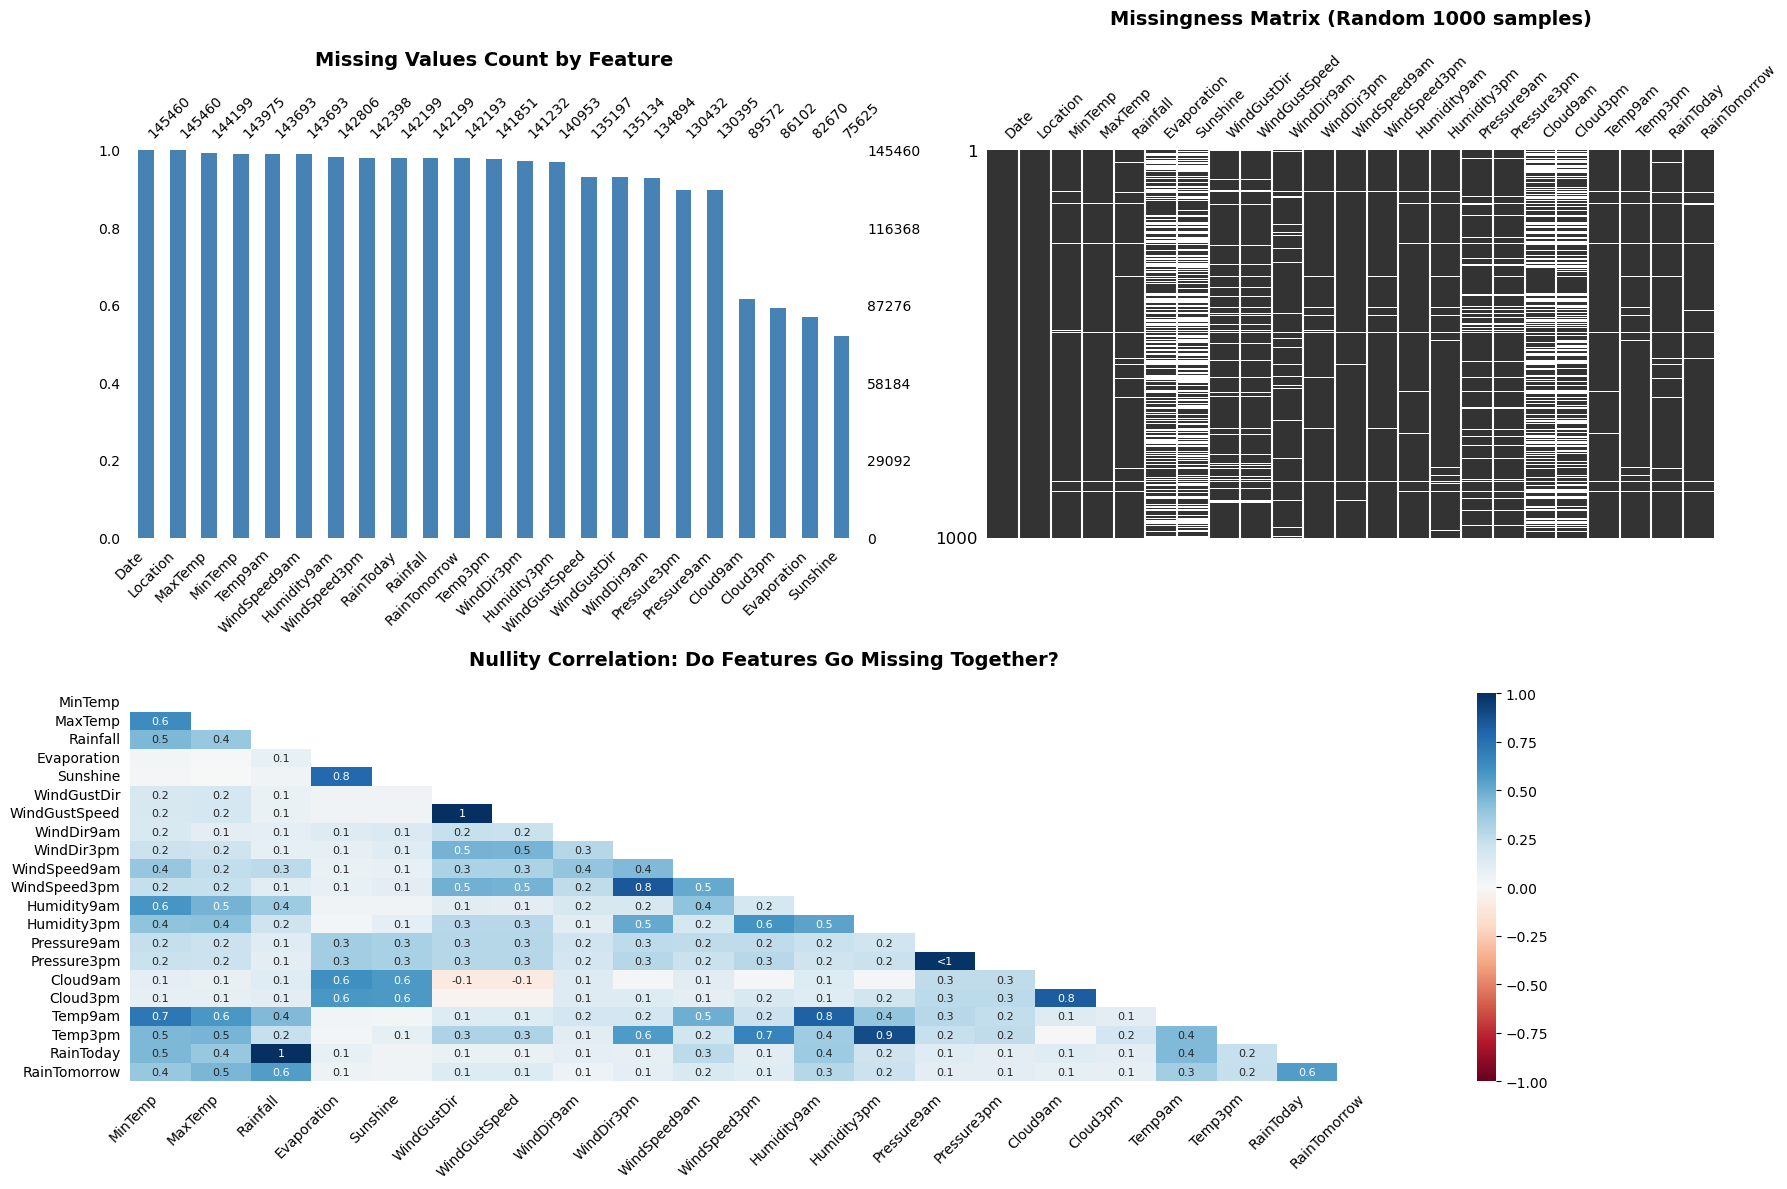

In [16]:
plot_missing_patterns(df_weather)

Trực quan hóa cấu trúc dữ liệu thiếu cho thấy các đặc điểm thiếu mang tính hệ thống thay vì ngẫu nhiên. 

**Biểu đồ cột cho thấy sự phân tầng rõ rệt giữa các nhóm biến**: các biến khí tượng cốt lõi (`Temperature`, `Humidity`, `WindSpeed`) có mức độ hoàn thiện gần như tuyệt đối, trong khi các biến phụ thuộc thiết bị chuyên dụng như `Evaporation`, `Sunshine`, `Cloud9am` và `Cloud3pm` lại thiếu dữ liệu ở mức cao, phản ánh sự không đồng nhất trong năng lực đo đạc giữa các trạm quan trắc.

**Biểu đồ ma trận làm rõ tính chất "structural missingness"**. Các khoảng trắng (đại diện cho dữ liệu thiếu) của `Evaporation` và `Sunshine` tập trung thành các khối liên tục theo thời gian, thay vì phân bố ngẫu nhiên, cho thấy khả năng một số trạm không được trang bị cảm biến tương ứng hoặc thiết bị ngừng hoạt động trong thời gian kéo dài. Điều này củng cố luận điểm rằng dữ liệu thiếu có tính hệ thống và liên quan đến đặc điểm của từng trạm.


**Biểu đồ heatmap tương quan nullity cho thấy sự phụ thuộc mạnh giữa các nhóm biến**. Các biến bốc hơi và bức xạ mặt trời (`Evaporation – Sunshine`) có tương quan thiếu cao, tương tự như cặp biến đo mây (`Cloud9am – Cloud3pm`) và cặp biến áp suất (`Pressure9am – Pressure3pm`). Các cặp này thường biến mất đồng thời, chỉ ra khả năng thiếu hụt liên quan đến cùng loại thiết bị hoặc điều kiện vận hành. Hiện tượng này chỉ ra rằng nếu một trạm thiếu thông tin về bốc hơi, xác suất rất cao trạm đó cũng không đo được giờ nắng, tương tự với việc quan sát mây.

$\rightarrow$ **Kết luận:** Cơ chế thiếu dữ liệu không phải là ngẫu nhiên hoàn toàn mà dữ liệu có dấu hiệu phụ thuộc vào định danh trạm đo.

#### **5.3.3 Spatio-Temporal and Mechanism Analysis**

Phân tích yếu tố không gian – thời gian và cơ chế thiếu dữ liệu để tìm hiểu sâu hơn về cơ chế và bản chất của sự thiếu trong bộ dữ liệu khí tượng.

/home/duyhoang/Downloads/LTKHDL/Submission/Prog4DS-Final-Project/src/visualization.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_missing = df_weather.set_index('Date').resample('M').apply(


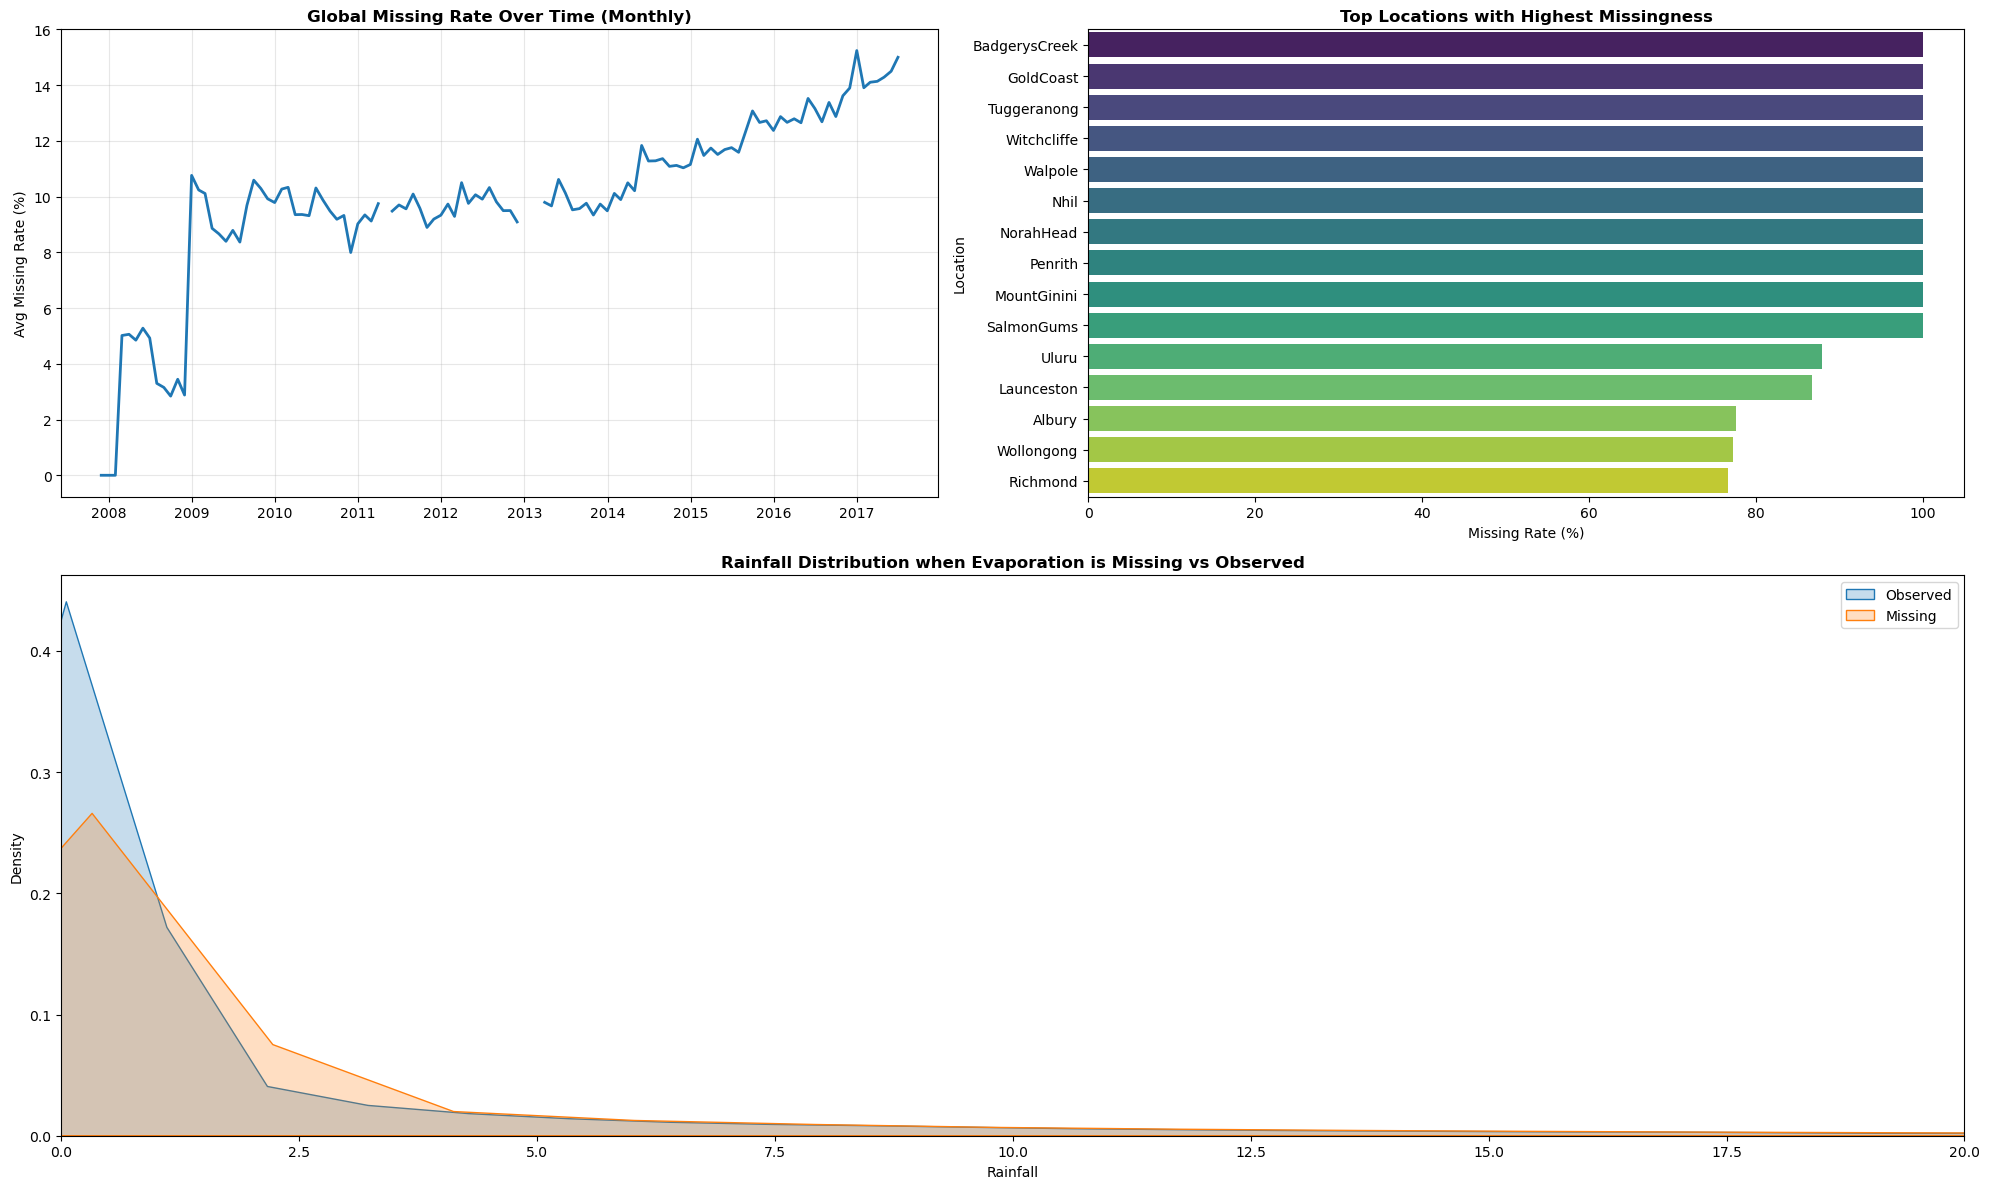

Avg Rainfall when Observed: 2.05 mm
Avg Rainfall when Missing:  2.78 mm
T-test p-value: 0.0000


In [17]:
stats_result = plot_missing_analysis(df_weather)
feature = stats_result["feature"]
obs_mean = stats_result["obs_mean"]
mis_mean = stats_result["mis_mean"]
p_val = stats_result["p_value"]

print(f"Avg Rainfall when Observed: {obs_mean:.2f} mm")
print(f"Avg Rainfall when Missing:  {mis_mean:.2f} mm")
print(f"T-test p-value: {p_val:.4f}")

Phân tích dữ liệu thiếu theo cả ba chiều không gian, thời gian và cơ chế thống kê cho thấy sự thiếu hụt trong bộ dữ liệu *Rain in Australia* không xuất hiện một cách ngẫu nhiên, mà mang tính cấu trúc và có điều kiện rõ rệt.

**Về không gian**, trực quan hóa theo trạm quan trắc (*Top Locations with Highest Missingness*) chỉ ra rằng một số địa điểm như *Mount Ginini, Salmon Gums* và *Albany* có tỷ lệ thiếu dữ liệu gần như tuyệt đối đối với các biến nhạy cảm, đặc biệt là `Evaporation`, `Sunshine` và nhóm `Cloud9am, Cloud3pm`. Hiện tượng này củng cố giả thuyết về "Structural Missingness", theo đó sự vắng mặt của dữ liệu chủ yếu bắt nguồn từ khác biệt trong cấu hình thiết bị giữa các trạm, cụ thể là việc không triển khai hoặc không duy trì các cảm biến đo bốc hơi và bức xạ mặt trời, thay vì do lỗi ghi nhận ngẫu nhiên hoặc gián đoạn ngắn hạn trong vận hành.

**Về thời gian**, biểu đồ *Global Missing Rate Over Time (Monthly)* cho thấy chất lượng dữ liệu không ổn định trong suốt giai đoạn quan trắc gần một thập kỷ (2008 – 2017). Trong giai đoạn sơ khởi (2007 – 2008), tỷ lệ thiếu dữ liệu gần như bằng không, phản ánh việc dữ liệu ban đầu được thu thập chủ yếu từ một nhóm nhỏ các trạm quan trắc cốt lõi với hệ thống đo lường đầy đủ. Tuy nhiên, vào khoảng năm 2009 xuất hiện một "điểm gãy cấu trúc" rõ rệt, khi tỷ lệ thiếu trung bình tăng đột ngột từ dưới 2% lên khoảng 8%. Hiện tượng này nhiều khả năng phản ánh quá trình mở rộng mạng lưới quan trắc trên phạm vi toàn quốc, trong đó các trạm phụ tại khu vực xa trung tâm được tích hợp vào hệ thống dữ liệu nhưng không được trang bị đầy đủ các cảm biến phức tạp. Trong giai đoạn tiếp theo (2013 – 2017), tỷ lệ thiếu tiếp tục xu hướng gia tăng nhẹ và đạt trên 12% vào cuối chuỗi thời gian, cho thấy nhiễu trong dữ liệu mang tính "không dừng", với các quan sát ở giai đoạn đầu có chất lượng cao hơn đáng kể so với giai đoạn sau.

$\rightarrow$ Sự kết hợp giữa hai chiều không gian và thời gian ủng hộ *giả thuyết mở rộng mạng lưới quan trắc*, theo đó sự gia tăng tỷ lệ missing không bắt nguồn từ sự suy giảm chất lượng tại các trạm cũ, mà chủ yếu do việc bổ sung ngày càng nhiều trạm mới có cấu hình phần cứng tối giản. Khi tỷ trọng các trạm chỉ đo các biến khí tượng cơ bản (như nhiệt độ và lượng mưa) tăng lên, tỷ lệ thiếu trung bình của toàn bộ mạng lưới cũng gia tăng tương ứng.

Để làm rõ **cơ chế gây thiếu**, nhóm tiến hành so sánh phân phối và kiểm định thống kê giữa hai nhóm ngày: có và không có dữ liệu `Evaporation`. Phân tích mật độ cho thấy phân phối lượng mưa trong các ngày thiếu dữ liệu bốc hơi bị dịch chuyển về phía các giá trị cao hơn. Kết quả kiểm định *t-test* xác nhận sự khác biệt này có ý nghĩa thống kê cao (p < 0.0001), với lượng mưa trung bình trong các ngày thiếu dữ liệu bốc hơi đạt 2.78 mm, cao hơn đáng kể so với 2.05 mm trong các ngày quan sát được. Phát hiện này bác bỏ giả thuyết MCAR (Missing Completely At Random) và gợi ý một cơ chế MAR (Missing At Random), trong đó điều kiện thời tiết bất lợi — đặc biệt là mưa lớn — ảnh hưởng trực tiếp đến khả năng ghi nhận của thiết bị đo bốc hơi.

**Tổng hợp các kết quả** cho thấy dữ liệu thiếu trong bộ dữ liệu mang tính *cấu trúc, phụ thuộc không gian và chịu tác động của điều kiện khí tượng*, xuất phát từ sự không đồng nhất về trang thiết bị giữa các trạm và ảnh hưởng của thời tiết khắc nghiệt. Do đó, các chiến lược xử lý missing values cần tránh các phương pháp đơn giản như điền trung bình toàn cục, vốn có nguy cơ làm sai lệch mối quan hệ vật lý giữa các biến. Thay vào đó, nên ưu tiên các phương pháp suy diễn đa biến hoặc imputation có điều kiện theo trạm và theo ngữ cảnh khí tượng. Ngoài ra, việc chia tập huấn luyện và kiểm thử theo trục thời gian (ví dụ: huấn luyện trên giai đoạn 2008–2015 và đánh giá trên giai đoạn 2016–2017) đặt ra thách thức lớn về sự không tương thích chất lượng dữ liệu, đòi hỏi một quy trình tiền xử lý mạnh mẽ và thích nghi để đảm bảo hiệu năng mô hình không suy giảm khi áp dụng cho dữ liệu mới có mức độ nhiễu cao hơn.

#### **5.3.4 Proposed Treatment Strategy**

Chiến lược xử lý được đề xuất dựa trên mục tiêu mô hình hóa (classification RainTomorrow) và cơ chế missing:

##### **1. Nguyên tắc đối với Giá trị ngoại lai (Outliers)**
- **Chiến lược:** **Giữ nguyên toàn bộ Outliers**, tuyệt đối không áp dụng Clipping (Cắt) hay Winsorization.
- **Lý do:** Các giá trị cực đoan trong nhiệt độ, gió và lượng mưa không phải lỗi đo đạc mà là các hiện tượng thời tiết đặc biệt (bão, hạn hán). Việc giữ lại giúp mô hình học được toàn bộ phổ biến thiên và các trạng thái khí quyển hiếm nhưng quan trọng cho dự báo mưa.



##### **2. Xử lý Biến mục tiêu và Biến phân loại**
- **RainTomorrow (Mục tiêu):** Loại bỏ các dòng bị thiếu (Drop NA) để đảm bảo độ chính xác cho nhãn huấn luyện.
- **RainToday:** Mã hóa Yes/No thành 1/0. Các giá trị thiếu được điền bằng mã riêng (**giá trị 2**) để đại diện cho trạng thái "Không xác định".
- **Biến phân loại khác (Vị trí, hướng gió):** Sử dụng Mode Imputation (Giá trị phổ biến nhất).

##### **3. Xử lý Biến số liên tục (Numeric Imputation)**
Đây là nhóm đòi hỏi chiến lược thận trọng nhất để tránh làm mất thông tin vật lý:

| Nhóm biến | Tình trạng | Chiến lược xử lý |
| :--- | :--- | :--- |
| **Nhóm có tỷ lệ thiếu cao** (Evaporation, Sunshine, Cloud) | Thiếu nhiều, dữ liệu có ý nghĩa vật lý quan trọng. | **Missing Indicator Flags:** Tạo thêm cột nhị phân để đánh dấu vị trí bị thiếu, giúp mô hình nhận biết trạng thái "không quan trắc được". |
| **Toàn bộ biến số** (Nhiệt độ, Áp suất, Độ ẩm,...) | Cần tính nhất quán giữa các chỉ số. | **Iterative Imputer (MICE):** Tuyệt đối tránh Mean Imputation. Sử dụng MICE để dự đoán giá trị thiếu dựa trên các biến tương quan mạnh (ví dụ: dùng Nhiệt độ và Áp suất để dự đoán Độ ẩm). |



#### **4. Hàm ý vật lý của chiến lược**
Việc kết hợp giữa **MICE** và **Missing Indicator Flags** cho phép mô hình:
1. Có đủ dữ liệu liên tục để thực hiện các phép toán.
2. Hiểu được mối quan hệ phi tuyến giữa các biến (như gió mạnh và khả năng mưa).
3. Không bị sai lệch do việc điền các giá trị trung bình "ảo" vào các nhóm biến nhạy cảm như Sunshine hay Evaporation.

## **6. Univariate Analysis (Numerical & Categorical)**

### **6.1 Numerical Features**

Mục tiêu của phân tích đơn biến (univariate analysis) đối với các biến số là làm rõ đặc tính phân phối thống kê, mức độ lệch (skewness), độ nhọn (kurtosis) và sự hiện diện của các giá trị ngoại lai (outliers). Đây là bước tiền đề bắt buộc nhằm đưa ra các quyết định có cơ sở khoa học cho các bước tiền xử lý tiếp theo, bao gồm chuẩn hóa dữ liệu (scaling), biến đổi phân phối (transformation) và điền khuyết (imputation).

Khác với cách tiếp cận "one-size-fits-all", bài làm này nhấn mạnh rằng mỗi nhóm biến khí tượng đại diện cho các quá trình vật lý khác nhau, do đó cần được đánh giá và xử lý theo những giả định thống kê và ngữ cảnh vật lý riêng biệt.

In [18]:
all_stats_summary = []

#### **6.1.1 Identification of Numerical Variables**

Bước đầu tiên của phân tích là xác định toàn bộ các biến số (numerical features) trong tập dữ liệu và thực hiện kiểm tra tổng quát. Mục tiêu của bước này là đánh giá nhanh mức độ đầy đủ dữ liệu, kiểu dữ liệu, độ đa dạng giá trị và các đặc tính đặc biệt như hiện tượng zero-inflation.

Bảng tổng hợp được xây dựng nhằm cung cấp các thông tin chẩn đoán sau cho từng biến số:
- Kiểu dữ liệu (data type)
- Số lượng và tỷ lệ giá trị thiếu
- Số lượng giá trị duy nhất
- Số lượng giá trị bằng 0

Bảng này đóng vai trò như một công cụ sàng lọc, giúp nhanh chóng xác định các biến tiềm ẩn rủi ro về mặt thống kê hoặc yêu cầu chiến lược xử lý riêng biệt.

In [19]:
num_cols = df_weather.select_dtypes(include=[np.number]).columns.tolist()
num_summary = pd.DataFrame({
    'Type': df_weather[num_cols].dtypes,
    'Missing_Count': df_weather[num_cols].isnull().sum(),
    'Missing_Rate_%': (df_weather[num_cols].isnull().mean() * 100).round(2),
    'Unique_Values': df_weather[num_cols].nunique(),
    'Zero_Values': (df_weather[num_cols] == 0).sum()
})

print(f"Total numerical features: {len(num_cols)}")
display(num_summary.sort_values('Missing_Rate_%', ascending=False)
                   .style.background_gradient(cmap='Blues', subset=['Missing_Rate_%']))

Total numerical features: 16


,Type,Missing_Count,Missing_Rate_%,Unique_Values,Zero_Values
Sunshine,float64,69835,48.010000,145,2359
Evaporation,float64,62790,43.170000,358,244
Cloud3pm,float64,59358,40.810000,10,4974
Cloud9am,float64,55888,38.420000,10,8642
Pressure9am,float64,15065,10.360000,546,0
Pressure3pm,float64,15028,10.330000,549,0
WindGustSpeed,float64,10263,7.060000,67,0
Humidity3pm,float64,4507,3.100000,101,4
Temp3pm,float64,3609,2.480000,502,17
Rainfall,float64,3261,2.240000,681,91080


Kết quả cho thấy sự không đồng nhất rõ rệt về chất lượng dữ liệu giữa các biến số. Các biến như `Sunshine`, `Evaporation` và `Cloud` nổi bật với tỷ lệ thiếu cao, phù hợp với các phân tích "structural missingness" đã được trình bày ở các phần trước. Ngược lại, các biến nền tảng như nhiệt độ, độ ẩm và gió có mức độ hoàn thiện rất cao.

Đặc biệt, cột `Zero_Values` cung cấp thông tin quan trọng cho biến `Rainfall`. Số lượng lớn giá trị bằng 0 phản ánh đặc tính *zero-inflated distribution*, vốn rất phổ biến trong dữ liệu lượng mưa (nhiều ngày không mưa xen kẽ với một số ít ngày mưa lớn). Quan sát này hàm ý rằng `Rainfall` không tuân theo phân phối chuẩn và cần được xử lý bằng các phương pháp phù hợp hơn (ví dụ: biến đổi log hoặc mô hình hai pha).

Dựa trên bản chất vật lý và hành vi thống kê, các biến số được nhóm lại thành các nhóm đồng nhất nhằm phục vụ cho phân tích chi tiết ở các tiểu mục tiếp theo:

* Temperature
* Rainfall & Evaporation
* Wind Speed
* Humidity
* Pressure
* Cloud Cover

In [20]:
variable_groups = {
    "Temperature": ["MinTemp", "MaxTemp", "Temp9am", "Temp3pm"],
    "Rainfall & Evaporation": ["Rainfall", "Evaporation", "Sunshine"],
    "Wind Speed": ["WindGustSpeed", "WindSpeed9am", "WindSpeed3pm"],
    "Humidity": ["Humidity9am", "Humidity3pm"],
    "Pressure": ["Pressure9am", "Pressure3pm"],
    "Cloud Cover": ["Cloud9am", "Cloud3pm"],
}

#### **6.1.2 Group 1: Temperature**
`(MinTemp, MaxTemp, Temp9am, Temp3pm)`

Nhiệt độ là biến nền tảng trong khí tượng học, phản ánh trạng thái năng lượng của hệ thống khí quyển. Do đặc tính vật lý của quá trình truyền nhiệt, các biến nhiệt độ thường được kỳ vọng tuân theo phân phối chuẩn hoặc gần chuẩn, đặc biệt khi được tổng hợp theo ngày.

FEATURE GROUP ANALYSIS: TEMPERATURE

DETAILED NUMERICAL ANALYSIS: MinTemp
DESCRIPTIVE STATISTICS


,Feature,Count,Mean,Median,Std,Min,Q1,Q3,Max,IQR,Skewness,Kurtosis,Missing_Rate_%
Value,MinTemp,143975,12.194,12.0,6.3985,-8.5,7.6,16.9,33.9,9.3,0.0212,-0.484,1.0209


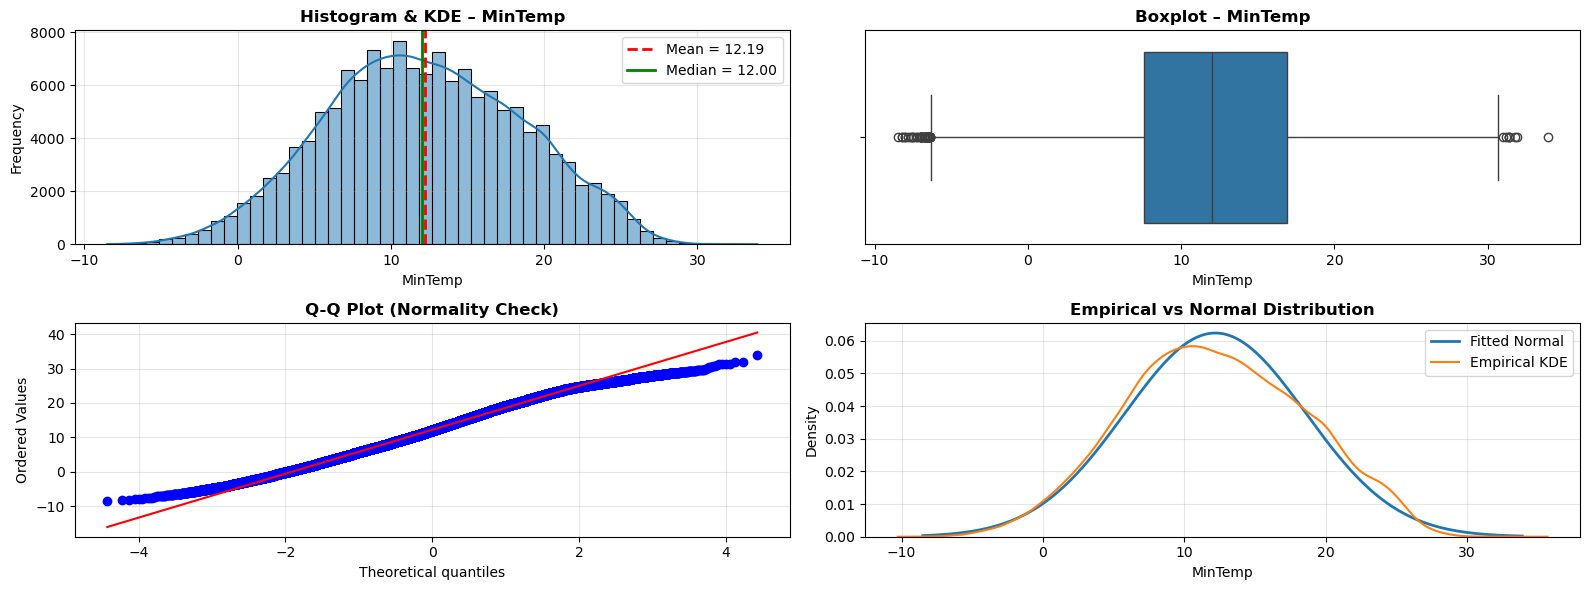

OUTLIER ANALYSIS (IQR METHOD)


,Lower_Bound,Q1,Median,Q3,Upper_Bound,Outlier_Count,Outlier_Rate_%,Observed_Min,Observed_Max
Value,-6.35,7.6,12.0,16.9,30.85,54,0.0375,-8.5,33.9


Outliers detected: 54 observations (0.04% of non-missing values).
 • Smallest outlier value: -8.5000
 • Largest outlier value: 33.9000

DETAILED NUMERICAL ANALYSIS: MaxTemp
DESCRIPTIVE STATISTICS


,Feature,Count,Mean,Median,Std,Min,Q1,Q3,Max,IQR,Skewness,Kurtosis,Missing_Rate_%
Value,MaxTemp,144199,23.2213,22.6,7.119,-4.8,17.9,28.2,48.1,10.3,0.2208,-0.2246,0.8669


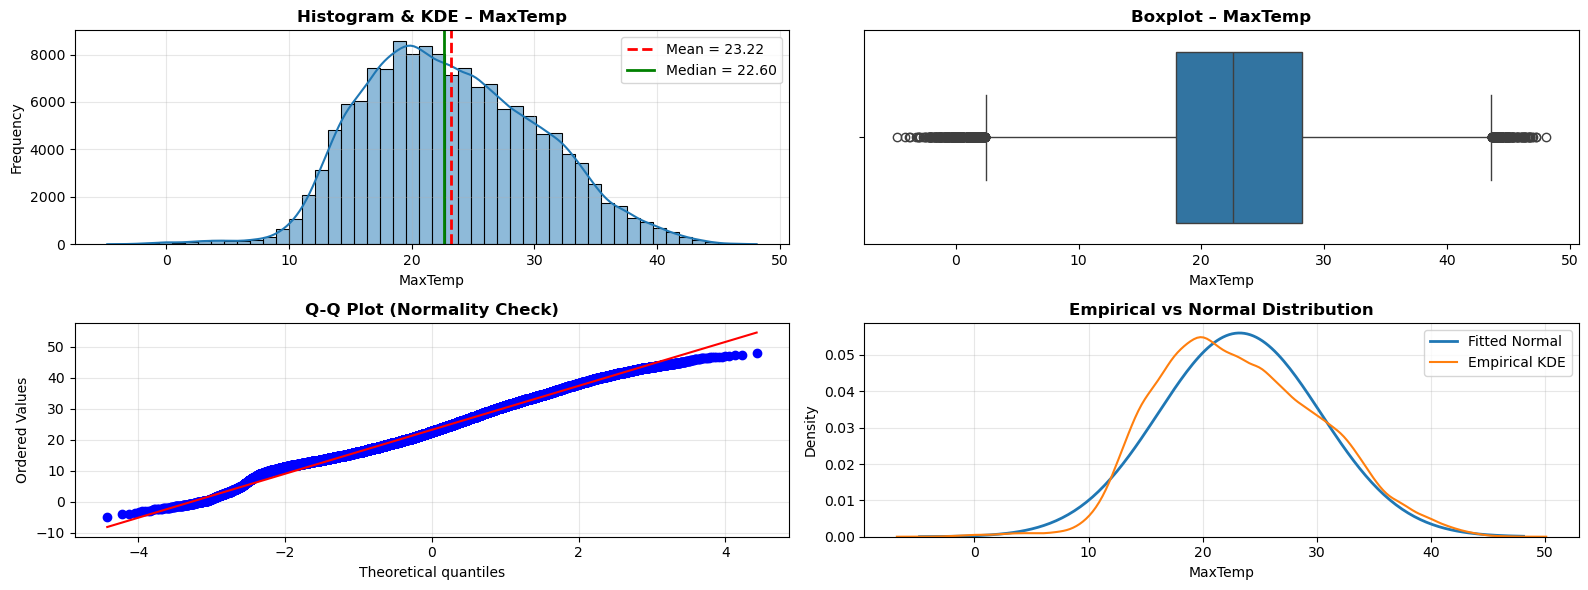

OUTLIER ANALYSIS (IQR METHOD)


,Lower_Bound,Q1,Median,Q3,Upper_Bound,Outlier_Count,Outlier_Rate_%,Observed_Min,Observed_Max
Value,2.45,17.9,22.6,28.2,43.65,489,0.3391,-4.8,48.1


Outliers detected: 489 observations (0.34% of non-missing values).
 • Smallest outlier value: -4.8000
 • Largest outlier value: 48.1000

DETAILED NUMERICAL ANALYSIS: Temp9am
DESCRIPTIVE STATISTICS


,Feature,Count,Mean,Median,Std,Min,Q1,Q3,Max,IQR,Skewness,Kurtosis,Missing_Rate_%
Value,Temp9am,143693,16.9906,16.7,6.4888,-7.2,12.3,21.6,40.2,9.3,0.0885,-0.3405,1.2148


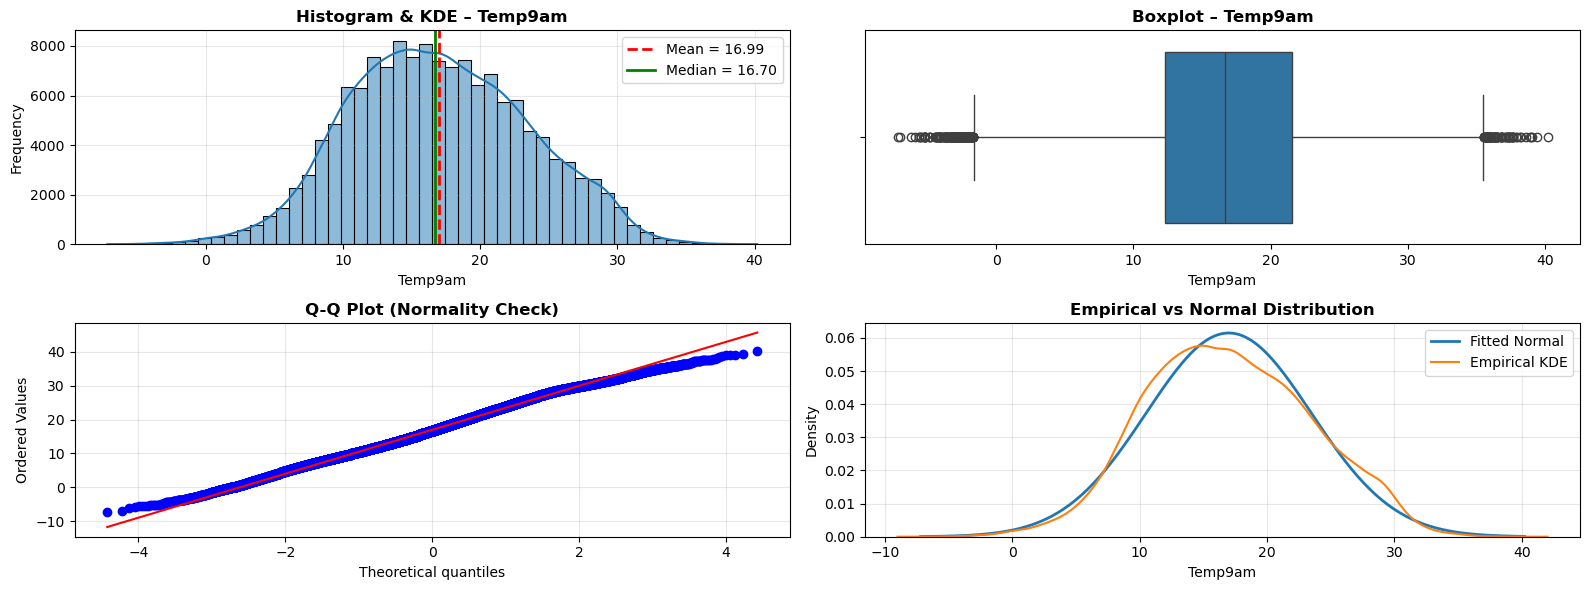

OUTLIER ANALYSIS (IQR METHOD)


,Lower_Bound,Q1,Median,Q3,Upper_Bound,Outlier_Count,Outlier_Rate_%,Observed_Min,Observed_Max
Value,-1.65,12.3,16.7,21.6,35.55,262,0.1823,-7.2,40.2


Outliers detected: 262 observations (0.18% of non-missing values).
 • Smallest outlier value: -7.2000
 • Largest outlier value: 40.2000

DETAILED NUMERICAL ANALYSIS: Temp3pm
DESCRIPTIVE STATISTICS


,Feature,Count,Mean,Median,Std,Min,Q1,Q3,Max,IQR,Skewness,Kurtosis,Missing_Rate_%
Value,Temp3pm,141851,21.6834,21.1,6.9367,-5.4,16.6,26.4,46.7,9.8,0.238,-0.1363,2.4811


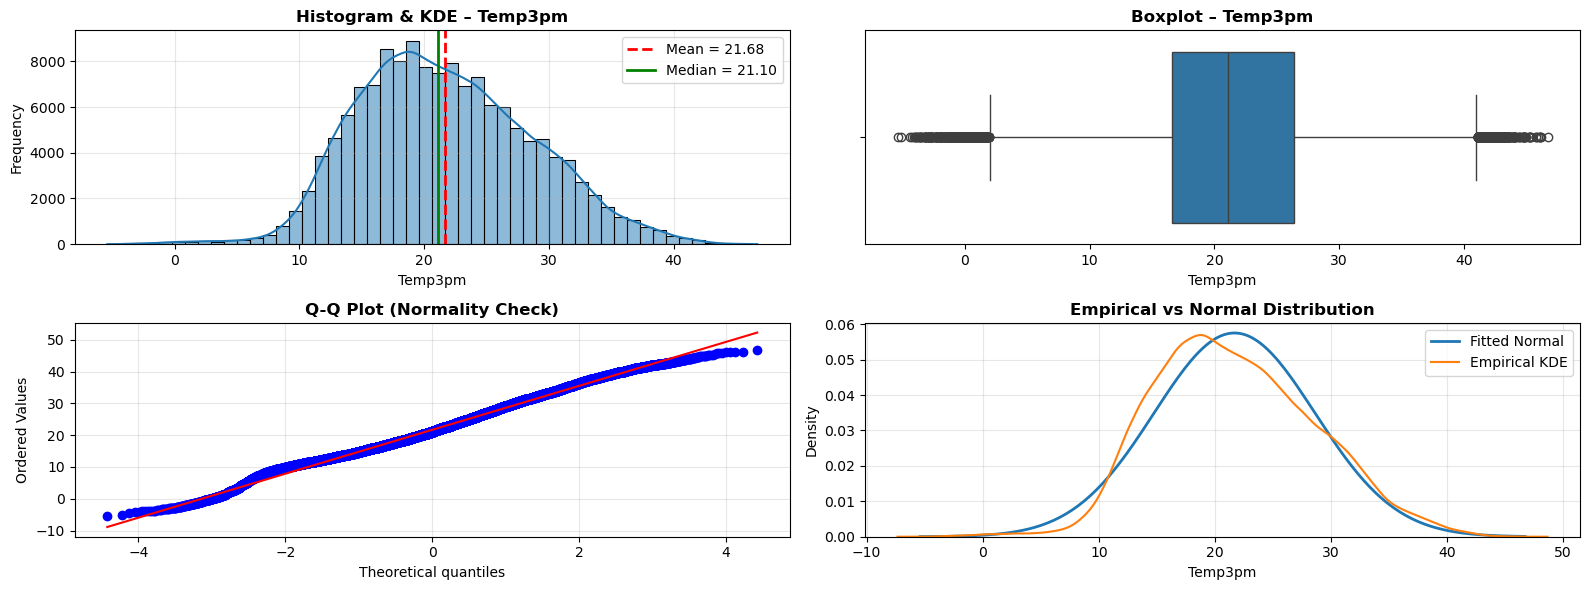

OUTLIER ANALYSIS (IQR METHOD)


,Lower_Bound,Q1,Median,Q3,Upper_Bound,Outlier_Count,Outlier_Rate_%,Observed_Min,Observed_Max
Value,1.9,16.6,21.1,26.4,41.1,764,0.5386,-5.4,46.7


Outliers detected: 764 observations (0.54% of non-missing values).
 • Smallest outlier value: -5.4000
 • Largest outlier value: 46.7000


In [21]:
temp_results = analyze_feature_group(
    df=df_weather,
    group_name="Temperature",
    features=variable_groups["Temperature"]
)
all_stats_summary.extend(temp_results)

**(1) Đặc điểm phân phối**

Phân tích đơn biến cho thấy tất cả các biến nhiệt độ đều có phân phối gần đối xứng và tiệm cận với phân phối Gaussian. Hệ số bất đối xứng (skewness) rất thấp, dao động trong khoảng từ 0.02 (*MinTemp*) đến 0.24 (*Temp3pm*), cho thấy không tồn tại sự lệch đáng kể về phía các giá trị cực đoan nóng hay lạnh, mà tập trung quanh giá trị trung bình.

Hệ số nhọn (kurtosis) của các biến này đều âm nhẹ (từ −0.48 đến −0.13), cho thấy phân phối hơi bẹt so với phân phối chuẩn lý tưởng. Điều này hàm ý rằng các đuôi phân phối mỏng hơn, với xác suất xuất hiện giá trị cực đoan thấp hơn so với kỳ vọng của phân phối chuẩn.

**Hàm ý mô hình hóa:**
Đặc tính phân phối gần chuẩn là một lợi thế quan trọng, cho phép áp dụng hiệu quả các kỹ thuật chuẩn hóa tuyến tính như *Z-score normalization* và đáp ứng tốt các giả định của nhiều mô hình thống kê tham số (ví dụ: Logistic Regression, Linear Discriminant Analysis).

**(2) Chu kỳ nhiệt nhật**

Thống kê mô tả phản ánh rõ nét chu kỳ nhiệt trong ngày – một quy luật vật lý cơ bản của khí hậu.

Nhiệt độ trung bình tăng từ khoảng **16.99 °C** vào lúc 9 giờ sáng (*Temp9am*) lên **21.68 °C** vào lúc 3 giờ chiều (*Temp3pm*), phù hợp với sự gia tăng bức xạ mặt trời trong ngày. Đồng thời, độ biến thiên của nhiệt độ ban ngày (*MaxTemp*, Std $\approx$ 7.12) cao hơn so với nhiệt độ ban đêm (*MinTemp*, Std $\approx$ 6.40).

Sự khác biệt này phản ánh thực tế rằng nhiệt độ ban ngày chịu ảnh hưởng mạnh của các yếu tố biến động như mây che phủ, cường độ bức xạ và hoàn lưu gió, trong khi nhiệt độ ban đêm ổn định hơn do quá trình bức xạ nhiệt từ bề mặt Trái Đất.

**(3) Đánh giá giá trị ngoại lai**

Phương pháp IQR chỉ phát hiện một tỷ lệ rất nhỏ các điểm ngoại lai (từ 0.04% đến 0.54%), cho thấy dữ liệu nhiệt độ có độ ổn định cao. Phạm vi nhiệt độ quan sát được trải dài từ **−8.5 °C** đến **48.1 °C**.

Khi đối chiếu với bối cảnh khí hậu Úc, các giá trị này hoàn toàn hợp lý về mặt vật lý: từ nhiệt độ băng giá tại các vùng núi cao (ví dụ *Mount Ginini*) đến các đợt nắng nóng cực đoan tại khu vực nội địa và sa mạc.

**Kết luận:**
Các giá trị ngoại lai được xác định không phải là nhiễu hay lỗi đo đạc, mà đại diện cho các hiện tượng thời tiết cực đoan có thật. Do đó, chiến lược xử lý phù hợp là *giữ nguyên các giá trị này*, cho phép mô hình học được toàn bộ phổ biến thiên của nhiệt độ, thay vì loại bỏ hoặc làm phẳng các hiện tượng khí hậu quan trọng.

#### **6.1.3 Group 2: Moisture Dynamics**
`(Rainfall, Evaporation, Sunshine)`

Nhóm biến *Moisture Dynamics* bao gồm lượng mưa (`Rainfall`), lượng bốc hơi (`Evaporation`) và số giờ nắng (`Sunshine`), đại diện cho các quá trình khí tượng mang tính ngẫu nhiên cao và chịu ảnh hưởng mạnh của các hiện tượng thời tiết cực đoan. Khác với nhóm nhiệt độ, các biến này không tuân theo giả định phân phối chuẩn, mà thể hiện các đặc trưng phân phối phức tạp như *zero-inflation, heavy-tailed distribution, multimodality*, cùng với *tỷ lệ dữ liệu thiếu đáng kể*. Do đó, việc phân tích cẩn trọng nhóm biến này là bước then chốt nhằm thiết kế chiến lược tiền xử lý phù hợp và tránh các sai lệch nghiêm trọng trong mô hình hóa.

FEATURE GROUP ANALYSIS: RAINFALL & EVAPORATION

DETAILED NUMERICAL ANALYSIS: Rainfall
DESCRIPTIVE STATISTICS


,Feature,Count,Mean,Median,Std,Min,Q1,Q3,Max,IQR,Skewness,Kurtosis,Missing_Rate_%
Value,Rainfall,142199,2.3609,0.0,8.4781,0.0,0.0,0.8,371.0,0.8,9.8362,178.1521,2.2419


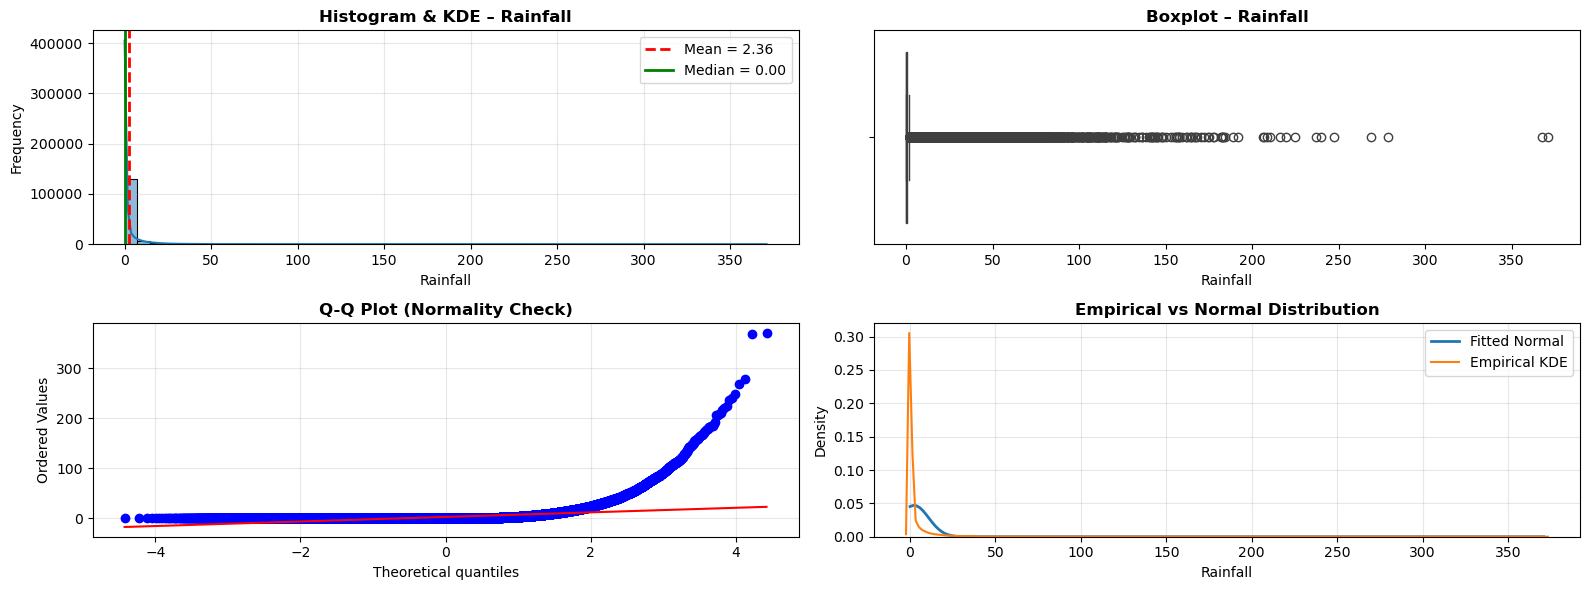

OUTLIER ANALYSIS (IQR METHOD)


,Lower_Bound,Q1,Median,Q3,Upper_Bound,Outlier_Count,Outlier_Rate_%,Observed_Min,Observed_Max
Value,-1.2,0.0,0.0,0.8,2.0,25578,17.9875,0.0,371.0


Outliers detected: 25578 observations (17.99% of non-missing values).
 • Smallest outlier value: 2.1000
 • Largest outlier value: 371.0000

DETAILED NUMERICAL ANALYSIS: Evaporation
DESCRIPTIVE STATISTICS


,Feature,Count,Mean,Median,Std,Min,Q1,Q3,Max,IQR,Skewness,Kurtosis,Missing_Rate_%
Value,Evaporation,82670,5.4682,4.8,4.1937,0.0,2.6,7.4,145.0,4.8,3.7613,45.0433,43.1665


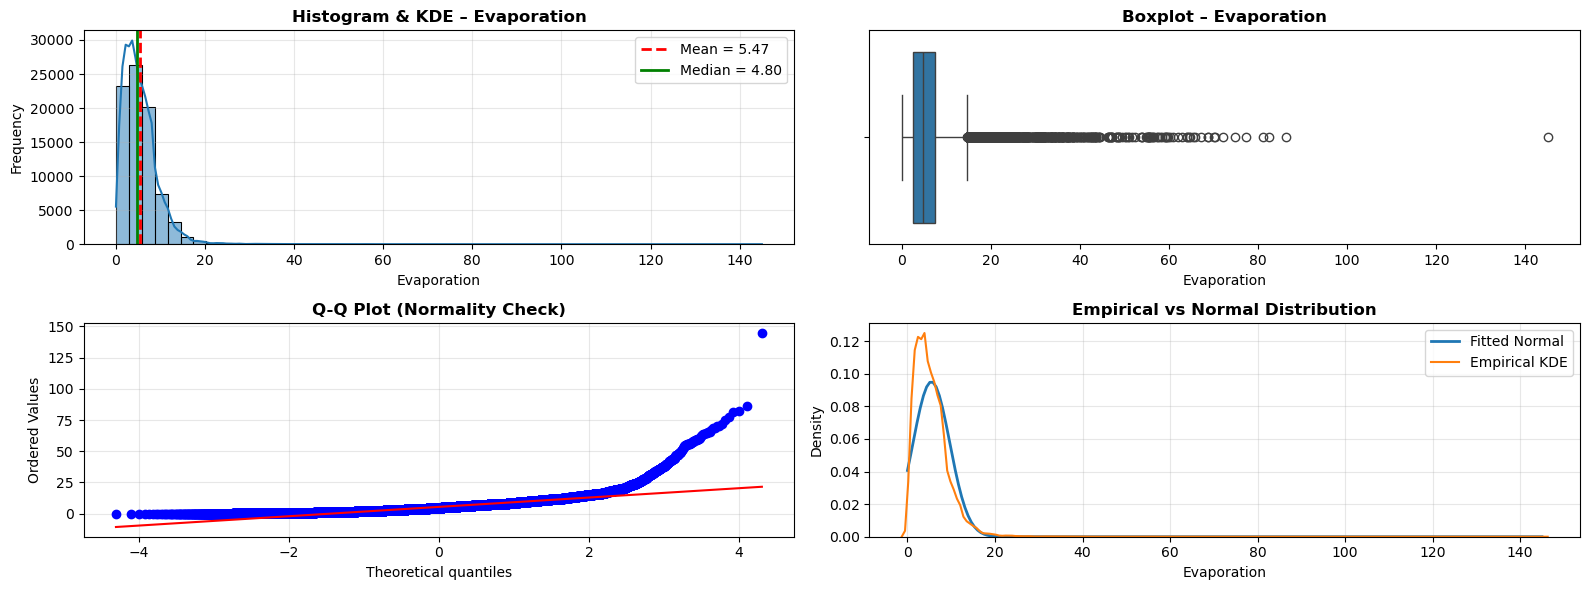

OUTLIER ANALYSIS (IQR METHOD)


,Lower_Bound,Q1,Median,Q3,Upper_Bound,Outlier_Count,Outlier_Rate_%,Observed_Min,Observed_Max
Value,-4.6,2.6,4.8,7.4,14.6,1995,2.4132,0.0,145.0


Outliers detected: 1995 observations (2.41% of non-missing values).
 • Smallest outlier value: 14.7000
 • Largest outlier value: 145.0000

DETAILED NUMERICAL ANALYSIS: Sunshine
DESCRIPTIVE STATISTICS


,Feature,Count,Mean,Median,Std,Min,Q1,Q3,Max,IQR,Skewness,Kurtosis,Missing_Rate_%
Value,Sunshine,75625,7.6112,8.4,3.7855,0.0,4.8,10.6,14.5,5.8,-0.4965,-0.8295,48.0098


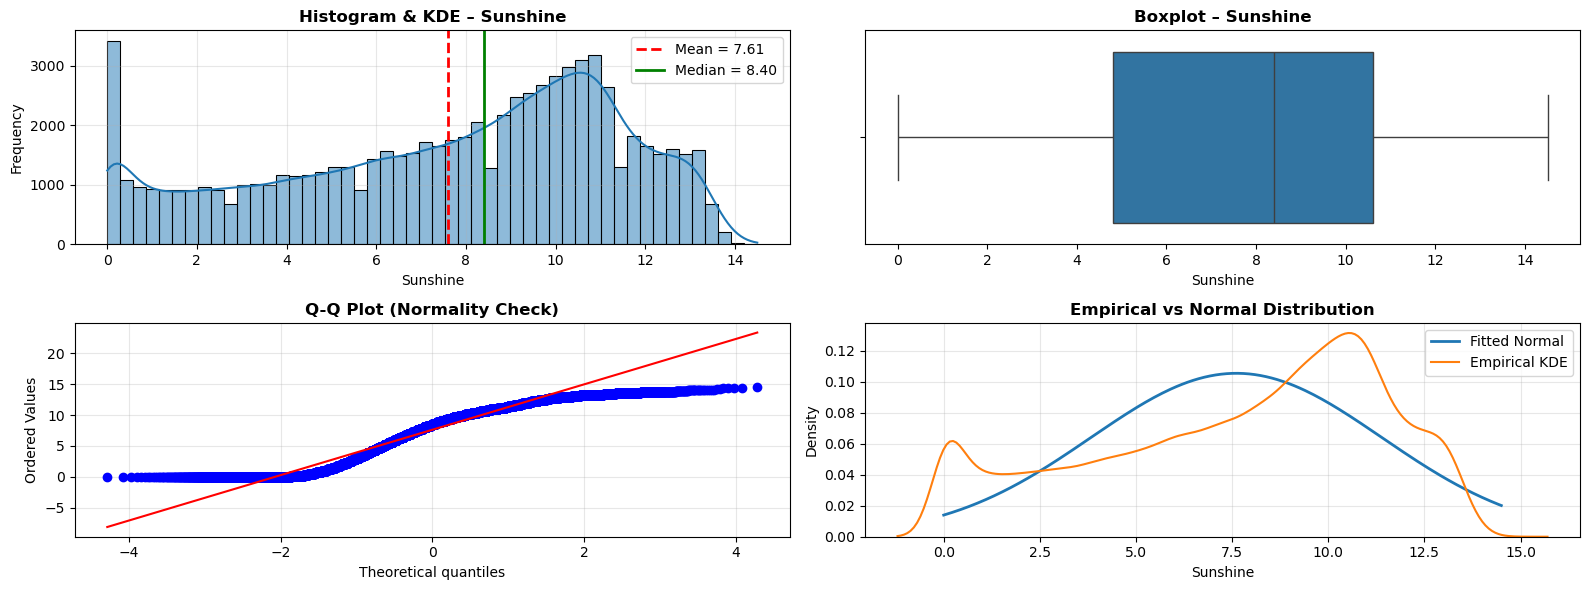

OUTLIER ANALYSIS (IQR METHOD)


,Lower_Bound,Q1,Median,Q3,Upper_Bound,Outlier_Count,Outlier_Rate_%,Observed_Min,Observed_Max
Value,-3.9,4.8,8.4,10.6,19.3,0,0.0,0.0,14.5


No significant outliers detected using the IQR criterion.


In [22]:
rain_results = analyze_feature_group(
    df=df_weather,
    group_name="Rainfall & Evaporation",
    features=variable_groups["Rainfall & Evaporation"]
)
all_stats_summary.extend(rain_results)

**(1) Rainfall**

Biến *Rainfall* thể hiện một dạng phân phối đặc trưng của dữ liệu khí tượng: *zero-inflated distribution* kết hợp với đuôi phải rất dài. Trung vị bằng 0.00 mm cho thấy hơn một nửa số ngày quan trắc hoàn toàn không có mưa, dẫn đến độ lệch phải cực lớn với hệ số Skewness $\approx$ 9.84.

Hệ số nhọn (Kurtosis $\approx$ 178.15) đặc biệt cao phản ánh sự tồn tại của một số ít các sự kiện mưa cực lớn, nhưng có cường độ vượt trội so với phần lớn các quan sát còn lại. Phương pháp phát hiện ngoại lai dựa trên IQR đánh dấu gần 18% số quan sát là outlier. Tuy nhiên, đây là một nghịch lý thống kê: do IQR rất nhỏ ($\approx$ 0.8 mm), nên bất kỳ lượng mưa nào lớn hơn khoảng 2 mm đều bị coi là ngoại lai.

Về mặt vật lý khí tượng, các giá trị mưa lớn (lên đến *371 mm/ngày*) là hoàn toàn hợp lý trong bối cảnh các hiện tượng như bão nhiệt đới hoặc mưa dông cường độ cao tại Úc. Do đó, các "outlier" này không phải là nhiễu đo đạc, mà chính là những sự kiện quan trọng nhất mà mô hình cần học để dự báo.

**Hàm ý mô hình hóa:**

* Tuyệt đối không loại bỏ outlier của Rainfall.
* Cần áp dụng log-transformation dạng `log(1 + x)` để giảm độ lệch và ổn định phương sai.
* Khai thác thông tin vật lý quan trọng từ các sự kiện mưa lớn bằng cách mã hóa cường độ mưa (rain intensity).

**(2) Evaporation**

Biến *Evaporation* cũng tuân theo phân phối lệch phải rõ rệt (Skewness $\approx$ 3.76), với giới hạn dưới vật lý là 0 mm. Trung bình (5.47 mm) cao hơn trung vị (4.80 mm), phản ánh sự tồn tại của một số ngày có mức bốc hơi rất cao.

Đuôi phải của phân phối kéo dài đến 145 mm, thường tương ứng với các điều kiện khí tượng khắc nghiệt như nhiệt độ cao, gió mạnh và bức xạ mặt trời lớn. Các giá trị này phù hợp về mặt vật lý và không nên bị coi là nhiễu.

Tuy nhiên, thách thức lớn nhất của biến này nằm ở tỷ lệ thiếu dữ liệu rất cao ($\approx$ 43%), chủ yếu do hạn chế thiết bị đo tại nhiều trạm quan trắc. Điều này khiến việc sử dụng trực tiếp Evaporation trong mô hình trở nên rủi ro nếu không có chiến lược điền khuyết phù hợp.

**Hàm ý mô hình hóa:**

* Áp dụng log-transformation tương tự Rainfall.
* Không sử dụng các phương pháp điền khuyết đơn giản (mean/median imputation).
* Ưu tiên imputation có điều kiện theo trạm và theo mùa, hoặc mô hình hóa Evaporation như một biến phụ thuộc trong bước tiền xử lý.

**(3) Sunshine**

Khác với Rainfall và Evaporation, biến *Sunshine* có phân phối tương đối đối xứng (Skewness $\approx$ −0.50) nhưng không tuân theo phân phối chuẩn. Dữ liệu bị ràng buộc trong khoảng *[0, 14.5] giờ*, tương ứng với độ dài ban ngày tối đa.

Biểu đồ tần suất cho thấy xu hướng đa chế độ rõ rệt: mật độ tập trung cao tại hai cực — gần 0 giờ (trời âm u hoàn toàn) và gần mức tối đa (trời nắng kéo dài). Điều này phản ánh bản chất nhị phân của hiện tượng thời tiết: ngày nhiều mây so với ngày quang đãng.

Không phát hiện outlier theo tiêu chuẩn IQR, cho thấy Sunshine có hành vi ổn định hơn so với Rainfall. Tuy nhiên, tỷ lệ missing vẫn ở mức cao, gắn liền với sự thiếu hụt cảm biến đo bức xạ tại nhiều trạm.

**Hàm ý mô hình hóa:**

* Không cần biến đổi log.
* Cần imputation có điều kiện, tận dụng các biến liên quan như Cloud, Humidity và Rainfall.
* Sunshine đóng vai trò quan trọng trong việc phân biệt các chế độ thời tiết (weather regimes).

**Kết luận Và Chiến lược Tiền xử lý**

Nhóm biến *Moisture Dynamics* chứa đựng thông tin dự báo cốt lõi cho bài toán thời tiết, nhưng đồng thời cũng là nhóm có *phân phối "xấu" nhất* và *mức độ thiếu dữ liệu cao nhất*. Do đó, chiến lược tiền xử lý bắt buộc phải vượt ra ngoài các kỹ thuật chuẩn hóa thông thường:

* **Log-transformation:** áp dụng cho *Rainfall* và *Evaporation* để giảm skewness và heavy-tail.
* **Imputation:** sử dụng phương pháp đa biến, theo trạm và theo mùa cho *Evaporation* và *Sunshine*.

Việc xử lý không phù hợp nhóm biến này (ví dụ: loại bỏ outlier hoặc điền trung bình toàn cục) sẽ dẫn đến *mất thông tin vật lý quan trọng* và làm suy giảm nghiêm trọng hiệu năng dự báo trong các điều kiện thời tiết cực đoan.

#### **6.1.4 Group 3: Aerodynamic Dynamics**
`(WindGustSpeed, WindSpeed9am, WindSpeed3pm)`

Nhóm biến *Aerodynamic Dynamics* mô tả động lực học khí quyển thông qua các thước đo tốc độ gió tại các thời điểm và trạng thái khác nhau trong ngày. Tốc độ gió không chỉ phản ánh cường độ hoàn lưu khí quyển mà còn đóng vai trò trung gian quan trọng trong các quá trình vật lý như vận chuyển hơi ẩm, hình thành đối lưu và phát triển các hệ thống thời tiết mang mưa. Do đó, việc phân tích đặc trưng thống kê của các biến này là cần thiết để đảm bảo mô hình hóa phù hợp cả về mặt toán học lẫn ý nghĩa vật lý.

FEATURE GROUP ANALYSIS: WIND SPEED

DETAILED NUMERICAL ANALYSIS: WindGustSpeed
DESCRIPTIVE STATISTICS


,Feature,Count,Mean,Median,Std,Min,Q1,Q3,Max,IQR,Skewness,Kurtosis,Missing_Rate_%
Value,WindGustSpeed,135197,40.0352,39.0,13.6071,6.0,31.0,48.0,135.0,17.0,0.8749,1.4186,7.0555


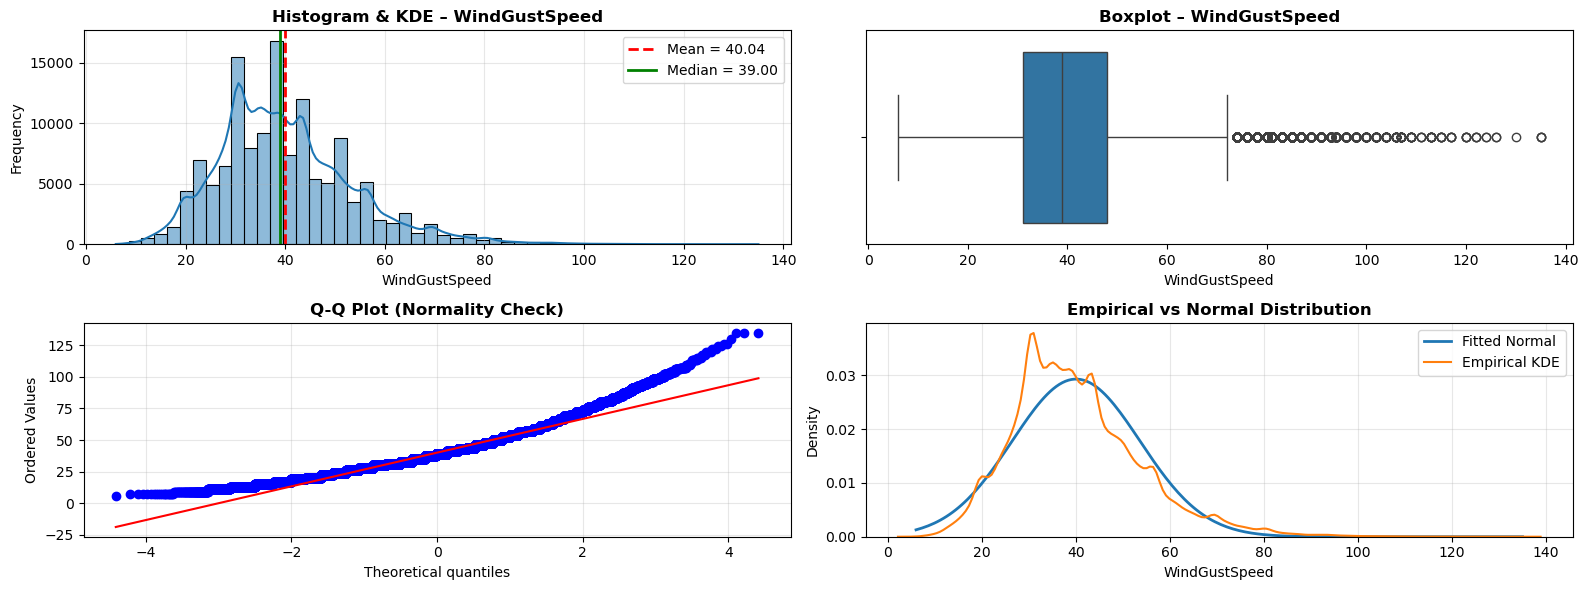

OUTLIER ANALYSIS (IQR METHOD)


,Lower_Bound,Q1,Median,Q3,Upper_Bound,Outlier_Count,Outlier_Rate_%,Observed_Min,Observed_Max
Value,5.5,31.0,39.0,48.0,73.5,3092,2.287,6.0,135.0


Outliers detected: 3092 observations (2.29% of non-missing values).
 • Smallest outlier value: 74.0000
 • Largest outlier value: 135.0000

DETAILED NUMERICAL ANALYSIS: WindSpeed9am
DESCRIPTIVE STATISTICS


,Feature,Count,Mean,Median,Std,Min,Q1,Q3,Max,IQR,Skewness,Kurtosis,Missing_Rate_%
Value,WindSpeed9am,143693,14.0434,13.0,8.9154,0.0,7.0,19.0,130.0,12.0,0.7776,1.227,1.2148


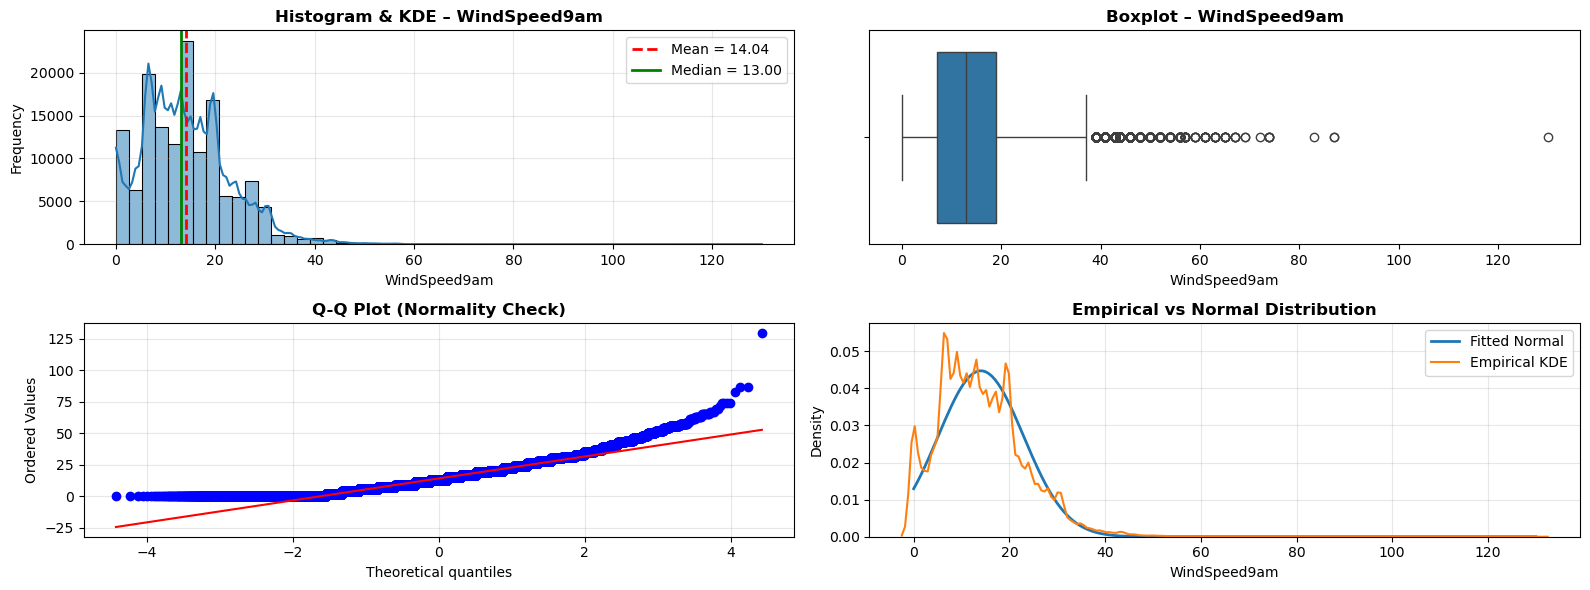

OUTLIER ANALYSIS (IQR METHOD)


,Lower_Bound,Q1,Median,Q3,Upper_Bound,Outlier_Count,Outlier_Rate_%,Observed_Min,Observed_Max
Value,-11.0,7.0,13.0,19.0,37.0,1817,1.2645,0.0,130.0


Outliers detected: 1817 observations (1.26% of non-missing values).
 • Smallest outlier value: 39.0000
 • Largest outlier value: 130.0000

DETAILED NUMERICAL ANALYSIS: WindSpeed3pm
DESCRIPTIVE STATISTICS


,Feature,Count,Mean,Median,Std,Min,Q1,Q3,Max,IQR,Skewness,Kurtosis,Missing_Rate_%
Value,WindSpeed3pm,142398,18.6627,19.0,8.8098,0.0,13.0,24.0,87.0,11.0,0.6282,0.7639,2.105


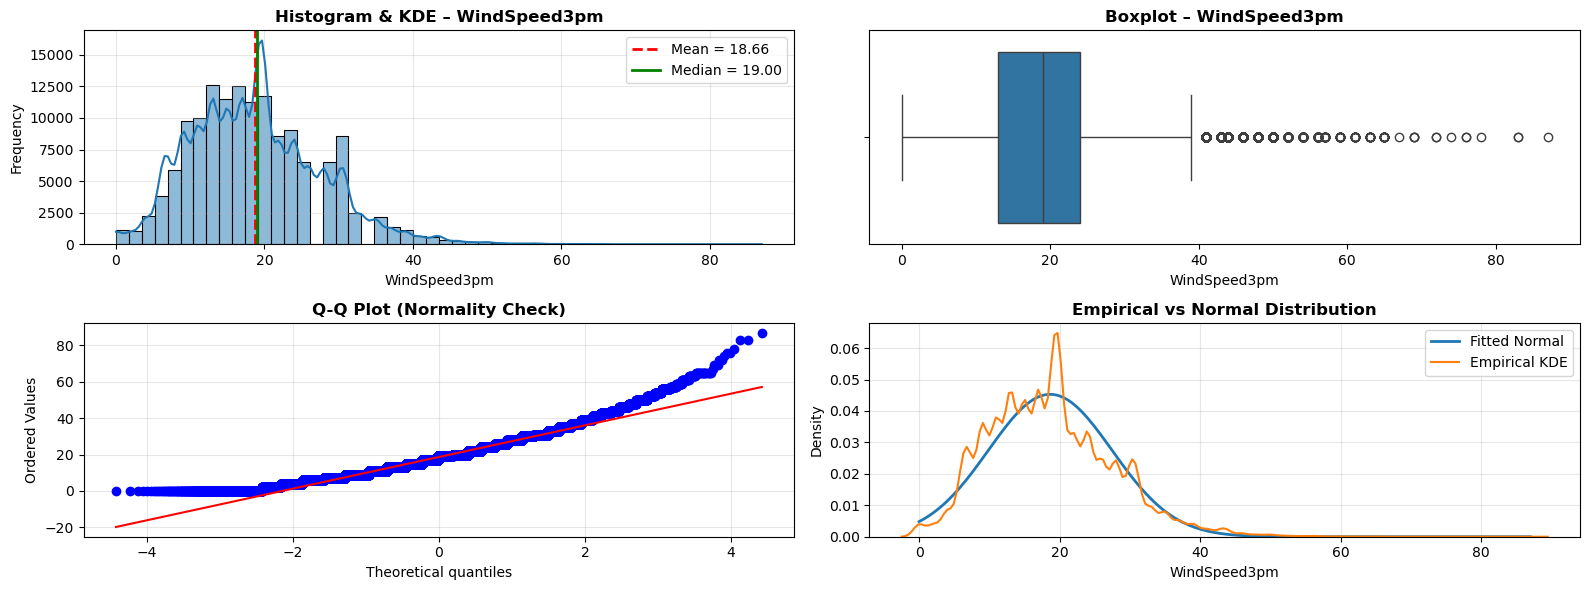

OUTLIER ANALYSIS (IQR METHOD)


,Lower_Bound,Q1,Median,Q3,Upper_Bound,Outlier_Count,Outlier_Rate_%,Observed_Min,Observed_Max
Value,-3.5,13.0,19.0,24.0,40.5,2523,1.7718,0.0,87.0


Outliers detected: 2523 observations (1.77% of non-missing values).
 • Smallest outlier value: 41.0000
 • Largest outlier value: 87.0000


In [23]:
wind_results = analyze_feature_group(
    df=df_weather,
    group_name="Wind Speed",
    features=variable_groups["Wind Speed"]
)
all_stats_summary.extend(wind_results)

**(1) Đặc điểm Phân phối**

Cả ba biến *WindGustSpeed*, *WindSpeed9am* và *WindSpeed3pm* đều thể hiện phân phối lệch phải ở mức trung bình (*moderate right-skew*), với hệ số Skewness dao động trong khoảng 0.63 – 0.87. Đặc điểm này phù hợp với bản chất vật lý của tốc độ gió: giá trị bị chặn dưới tại 0 km/h (trạng thái lặng gió), trong khi đuôi phải kéo dài phản ánh sự xuất hiện không thường xuyên nhưng có ý nghĩa của các sự kiện gió mạnh.

Hệ số nhọn (Kurtosis) cho thấy sự khác biệt rõ rệt giữa các biến. *WindGustSpeed* có Kurtosis dương ($\approx$ 1.42), biểu thị phân phối leptokurtic với đỉnh nhọn và đuôi dày hơn so với phân phối chuẩn. Điều này ngụ ý rằng các sự kiện gió giật mạnh xảy ra với tần suất cao hơn mức dự đoán của mô hình Gaussian thuần túy, phản ánh đúng bản chất không tuyến tính của các hiện tượng nhiễu động khí quyển.

**Hàm ý mô hình hóa:**

* Phân phối gần chuẩn hơn so với Rainfall, nhưng vẫn *không hoàn toàn Gaussian*.
* Các phương pháp chuẩn hóa như *StandardScaler* hoặc *RobustScaler* đều khả thi, trong đó *RobustScaler* tỏ ra phù hợp hơn nếu mô hình nhạy cảm với giá trị cực đoan.

**(2) Biến thiên Nhật triều**

Thống kê mô tả xác nhận rõ ràng sự tồn tại của chu kỳ nhiệt nhật trong động lực học gió. Tốc độ gió trung bình quan trắc lúc 3 giờ chiều (WindSpeed3pm $\approx$ 18.66 km/h) cao hơn đáng kể so với 9 giờ sáng (WindSpeed9am $\approx$ 14.04 km/h).

Hiện tượng này có thể được giải thích thông qua *cơ chế đối lưu nhiệt*. Khi mặt đất nóng lên trong ngày, lớp biên khí quyển trở nên bất ổn định hơn, tạo điều kiện cho sự trộn động lượng từ các tầng không khí cao xuống bề mặt. Kết quả là tốc độ gió quan trắc được vào buổi chiều thường lớn hơn so với buổi sáng, khi lớp biên còn ổn định và bị phân tầng nhiệt.

**Ý nghĩa vật lý:**

* Sự khác biệt giữa *WindSpeed9am* và *WindSpeed3pm* cung cấp thông tin gián tiếp về mức độ phát triển đối lưu trong ngày.
* Các biến này không dư thừa mà bổ sung lẫn nhau trong việc mô tả trạng thái khí quyển.

**(3) Đánh giá giá trị ngoại lai**

Phương pháp phát hiện ngoại lai dựa trên IQR xác định một tỷ lệ nhỏ các giá trị cực đoan, dao động từ 1.26% đến 2.29%. Tuy nhiên, tương tự như các biến Rainfall và Evaporation, đây là các outlier mang tính thông tin chứ không phải nhiễu đo lường.

Đặc biệt, *WindGustSpeed* ghi nhận giá trị cực đại lên tới 135 km/h, tương đương với cấp bão theo thang Beaufort. Các giá trị cực đại của *WindSpeed9am* ($\approx$ 130 km/h) và *WindSpeed3pm* ($\approx$ 87 km/h) cũng phản ánh những điều kiện khí tượng khắc nghiệt, phù hợp với các sự kiện như bão nhiệt đới, front lạnh mạnh hoặc lốc xoáy từng xảy ra tại Úc.

Trong bối cảnh bài toán dự báo `RainTomorrow`, các sự kiện gió mạnh này thường đóng vai trò tiền đề động lực học cho sự hình thành và di chuyển của các hệ thống áp thấp mang mưa. Việc loại bỏ hoặc làm "phẳng" các giá trị này sẽ làm suy giảm khả năng của mô hình trong việc nhận diện các điều kiện thời tiết nguy hiểm.

**Hàm ý xử lý dữ liệu:**

* Tránh áp dụng các kỹ thuật xử lý outlier mạnh tay như *Winsorization* hoặc *Clipping* trên các biến gió.
* Ưu tiên giữ nguyên các giá trị cực đoan và để mô hình học trực tiếp mối quan hệ phi tuyến giữa gió mạnh và khả năng mưa.

**Kết luận**

Nhóm biến *Aerodynamic Dynamics* thể hiện sự cân bằng tương đối giữa tính ổn định thống kê và sự hiện diện của các sự kiện cực đoan mang ý nghĩa vật lý. Phân phối lệch phải vừa phải, chu kỳ nhật rõ ràng và các outlier mang tính thông tin khiến nhóm biến này đặc biệt quan trọng trong việc mô hình hóa các quá trình tiền mưa. Do đó, chiến lược tiền xử lý cần hướng đến bảo toàn tín hiệu vật lý thay vì làm mượt dữ liệu một cách cơ học, nhằm đảm bảo mô hình dự báo có khả năng phản ứng nhạy với các điều kiện khí quyển khắc nghiệt.

#### **6.1.5 Group 4: Atmospheric Moisture Content**
`(Humidity9am, Humidity3pm)`

Nhóm biến *Atmospheric Moisture Content* mô tả trạng thái ẩm của không khí thông qua độ ẩm tương đối (*Relative Humidity*), một đại lượng chịu chi phối trực tiếp bởi các nguyên lý nhiệt động lực học khí quyển và đóng vai trò then chốt trong quá trình hình thành mây, sương mù và mưa. Phân tích hai thời điểm quan trắc (9h sáng và 3h chiều) cho phép đánh giá đồng thời ảnh hưởng của chu kỳ nhiệt nhật và các giới hạn bão hòa vật lý lên cấu trúc phân phối của dữ liệu.

FEATURE GROUP ANALYSIS: HUMIDITY

DETAILED NUMERICAL ANALYSIS: Humidity9am
DESCRIPTIVE STATISTICS


,Feature,Count,Mean,Median,Std,Min,Q1,Q3,Max,IQR,Skewness,Kurtosis,Missing_Rate_%
Value,Humidity9am,142806,68.8808,70.0,19.0292,0.0,57.0,83.0,100.0,26.0,-0.484,-0.0376,1.8246


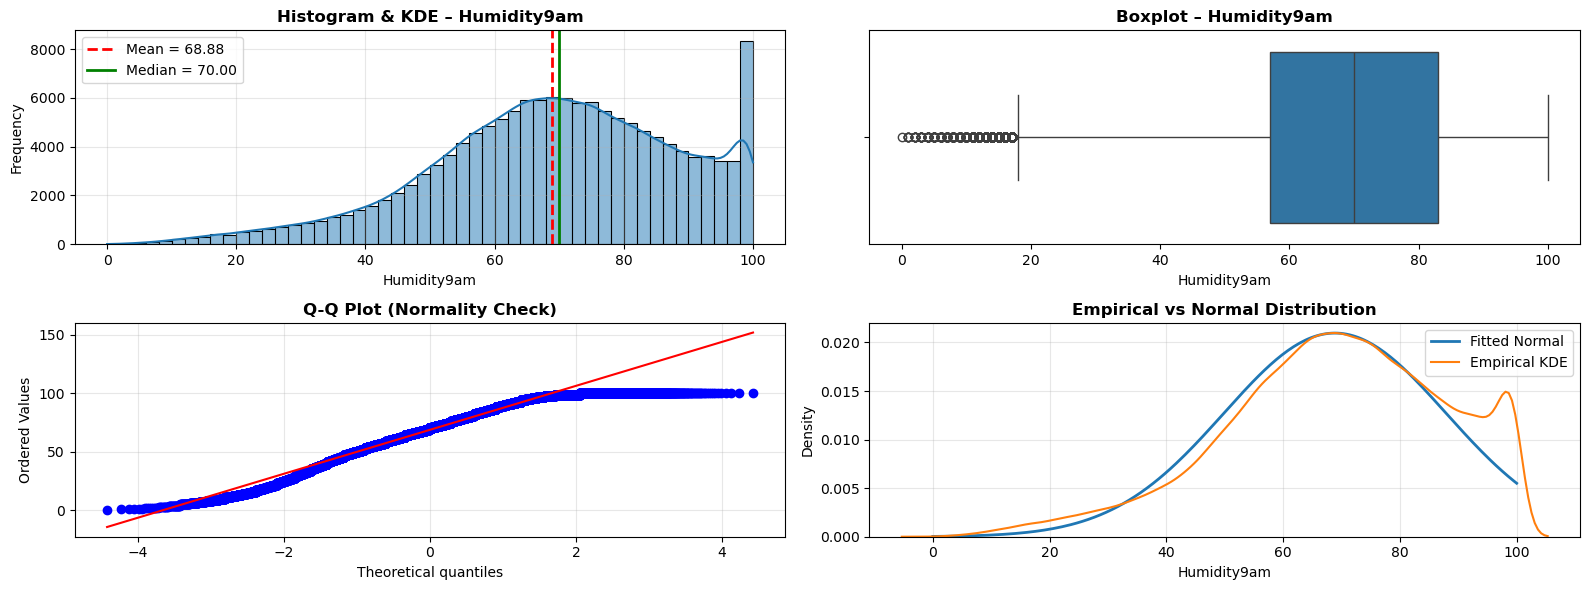

OUTLIER ANALYSIS (IQR METHOD)


,Lower_Bound,Q1,Median,Q3,Upper_Bound,Outlier_Count,Outlier_Rate_%,Observed_Min,Observed_Max
Value,18.0,57.0,70.0,83.0,122.0,1425,0.9979,0.0,100.0


Outliers detected: 1425 observations (1.00% of non-missing values).
 • Smallest outlier value: 0.0000
 • Largest outlier value: 17.0000

DETAILED NUMERICAL ANALYSIS: Humidity3pm
DESCRIPTIVE STATISTICS


,Feature,Count,Mean,Median,Std,Min,Q1,Q3,Max,IQR,Skewness,Kurtosis,Missing_Rate_%
Value,Humidity3pm,140953,51.5391,52.0,20.7959,0.0,37.0,66.0,100.0,29.0,0.0336,-0.5114,3.0984


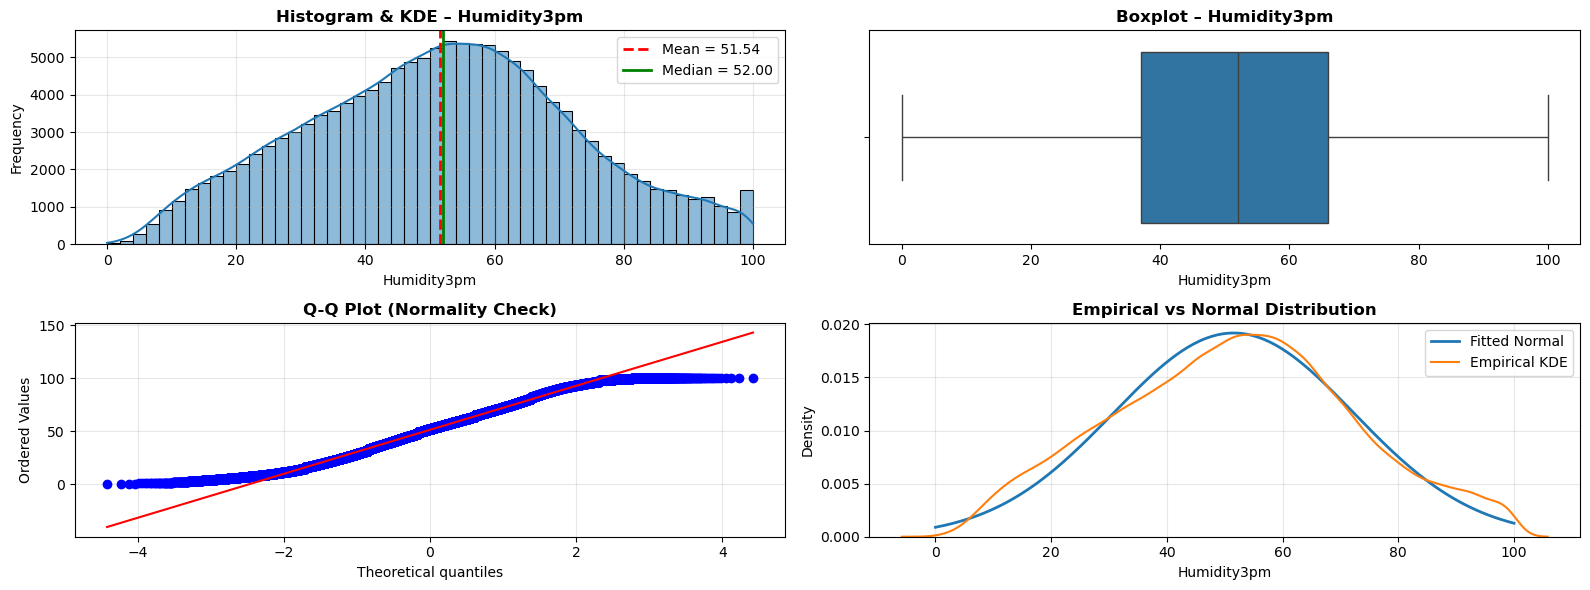

OUTLIER ANALYSIS (IQR METHOD)


,Lower_Bound,Q1,Median,Q3,Upper_Bound,Outlier_Count,Outlier_Rate_%,Observed_Min,Observed_Max
Value,-6.5,37.0,52.0,66.0,109.5,0,0.0,0.0,100.0


No significant outliers detected using the IQR criterion.


In [24]:
humidity_results = analyze_feature_group(
    df=df_weather,
    group_name="Humidity",
    features=variable_groups["Humidity"]
)
all_stats_summary.extend(humidity_results)

**(1) Đặc điểm Phân phối**

Khác với hầu hết các biến khí tượng khác, độ ẩm tương đối bị ràng buộc bởi *giới hạn vật lý cứng trong khoảng $[0, 100]$%*, dẫn đến các đặc trưng phân phối phi Gaussian rõ rệt.

* **Humidity9am** thể hiện phân phối *lệch trái nhẹ* (Skewness = −0.48), với mode tập trung tại mức 100%. Hiện tượng này phản ánh việc không khí vào buổi sáng thường xuyên đạt hoặc tiệm cận trạng thái bão hòa do nhiệt độ thấp ban đêm, tạo điều kiện cho sự hình thành sương mù hoặc sương đọng.
* **Humidity3pm** có phân phối *đối xứng hơn* (Skewness $\approx$ 0.03) và phẳng hơn (Platykurtic, Kurtosis = −0.51). Sự trải rộng của phân phối buổi chiều phản ánh sự đa dạng mạnh mẽ của điều kiện khí hậu tại Úc, từ các vùng nội địa khô hạn đến các khu vực ven biển và nhiệt đới có độ ẩm cao.

**Hàm ý mô hình hóa:**
Sự hiện diện của giới hạn trên (100%) và hiện tượng "dồn trần" ở *Humidity9am* khiến các mô hình tuyến tính thuần túy dễ vi phạm giả định phân phối chuẩn của sai số. Trong bối cảnh này, các mô hình tree-based (Random Forest, Gradient Boosting) hoặc các mô hình có khả năng học quan hệ phi tuyến sẽ khai thác dữ liệu hiệu quả hơn, trừ khi áp dụng các phép biến đổi phù hợp cho mô hình tuyến tính.

**(2) Biến thiên Nhật triều và Nhiệt động lực học**

So sánh thống kê giữa hai thời điểm trong ngày cho thấy sự suy giảm rõ rệt của độ ẩm trung bình từ *68.88% vào buổi sáng (Humidity9am)* xuống còn *51.54% vào buổi chiều (Humidity3pm)*. Sự chênh lệch này phản ánh trực tiếp quy luật nhiệt động lực học cơ bản: khi nhiệt độ không khí tăng lên trong ngày, áp suất hơi bão hòa tăng theo, làm giảm độ ẩm tương đối ngay cả khi hàm lượng hơi nước tuyệt đối trong không khí không thay đổi.

Về mặt khí tượng, hiện tượng này là dấu hiệu đặc trưng của các ngày thời tiết ổn định. Ngược lại, trong những ngày mà độ ẩm buổi chiều không giảm đáng kể so với buổi sáng, không khí thường ở trạng thái gần bão hòa, gợi ý sự hiện diện của khối khí ẩm hoặc quá trình đối lưu mạnh – những điều kiện thuận lợi cho mưa.

**Hàm ý mô hình hóa:**
Sự khác biệt giữa *Humidity9am* và *Humidity3pm* không chỉ mang ý nghĩa mô tả mà còn là tín hiệu phân biệt mạnh giữa các trạng thái thời tiết khô ráo và tiền mưa. Do đó, việc giữ nguyên cả hai biến (thay vì chỉ sử dụng một) là cần thiết để mô hình học được động học ẩm trong ngày.

**(3) Đánh giá giá trị ngoại lai**

Phân tích ngoại lai dựa trên tiêu chuẩn IQR cho thấy:

* **Humidity9am** xuất hiện một tỷ lệ nhỏ ($\approx$1%) các giá trị rất thấp (dưới 18%). Đây không phải là lỗi đo đạc, mà đại diện cho các hiện tượng khí tượng đặc biệt, chẳng hạn như sự xâm nhập của khối khí khô và nóng từ vùng nội địa hoặc sa mạc vào buổi sáng.
* **Humidity3pm** không phát hiện giá trị ngoại lai theo IQR. Với độ lệch chuẩn lớn ($\approx$ 20.8%), dải biến thiên tự nhiên của độ ẩm buổi chiều đã bao phủ gần như toàn bộ miền giá trị khả dĩ, khiến các giá trị cực đoan trở nên thống kê "bình thường".

**Hàm ý xử lý dữ liệu:**
Các giá trị ngoại lai quan sát được đều mang ý nghĩa vật lý và cần được **giữ nguyên**. Việc loại bỏ hoặc làm trơn các điểm này có nguy cơ làm mất đi những trạng thái khí quyển hiếm nhưng quan trọng đối với dự báo mưa.

**Kết luận**

Nhóm biến *Atmospheric Moisture Content* thể hiện chất lượng dữ liệu cao và tuân thủ chặt chẽ các quy luật nhiệt động lực học khí quyển. Sự khác biệt rõ rệt giữa độ ẩm buổi sáng và buổi chiều, cùng với giới hạn bão hòa vật lý, tạo nên các phân phối phi Gaussian có ý nghĩa vật lý sâu sắc. Trong bối cảnh mô hình hóa dự báo mưa, các biến độ ẩm đóng vai trò là chỉ báo trực tiếp của trạng thái bão hòa và tiềm năng đối lưu, và do đó cần được xử lý cẩn trọng với trọng tâm là bảo toàn cấu trúc phân phối và tín hiệu vật lý, thay vì ép buộc dữ liệu tuân theo các giả định thống kê đơn giản.

#### **6.1.6 Group 5 & 6: Atmospheric State & Sky Conditions**
`(Pressure9am, Pressure3pm, Cloud9am, Cloud3pm)`

Nhóm biến *Atmospheric State & Sky Conditions* phản ánh hai khía cạnh khác biệt của hệ thống khí quyển: (i) *trạng thái động lực nền* được mô tả bởi áp suất khí quyển – một đại lượng liên tục, ổn định và được đo lường chính xác cao; và (ii) *điều kiện bầu trời* được mô tả thông qua độ che phủ mây – một biến rời rạc, mang tính quan trắc và chịu ảnh hưởng mạnh bởi giới hạn thang đo. Sự đối lập này tạo ra hai cấu trúc phân phối thống kê gần như trái ngược trong cùng một bộ dữ liệu.

FEATURE GROUP ANALYSIS: PRESSURE

DETAILED NUMERICAL ANALYSIS: Pressure9am
DESCRIPTIVE STATISTICS


,Feature,Count,Mean,Median,Std,Min,Q1,Q3,Max,IQR,Skewness,Kurtosis,Missing_Rate_%
Value,Pressure9am,130395,1017.6499,1017.6,7.1065,980.5,1012.9,1022.4,1041.0,9.5,-0.0955,0.2316,10.3568


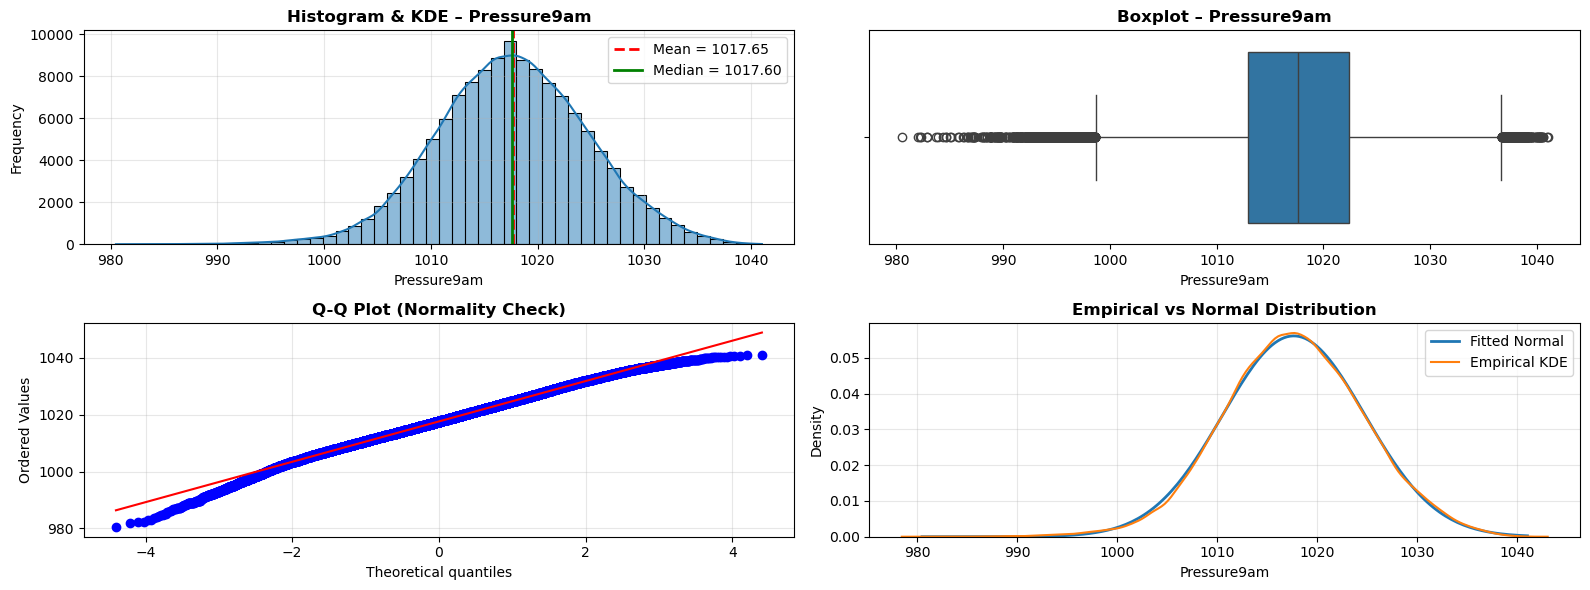

OUTLIER ANALYSIS (IQR METHOD)


,Lower_Bound,Q1,Median,Q3,Upper_Bound,Outlier_Count,Outlier_Rate_%,Observed_Min,Observed_Max
Value,998.65,1012.9,1017.6,1022.4,1036.65,1191,0.9134,980.5,1041.0


Outliers detected: 1191 observations (0.91% of non-missing values).
 • Smallest outlier value: 980.5000
 • Largest outlier value: 1041.0000

DETAILED NUMERICAL ANALYSIS: Pressure3pm
DESCRIPTIVE STATISTICS


,Feature,Count,Mean,Median,Std,Min,Q1,Q3,Max,IQR,Skewness,Kurtosis,Missing_Rate_%
Value,Pressure3pm,130432,1015.2559,1015.2,7.0374,977.1,1010.4,1020.0,1039.6,9.6,-0.0456,0.1292,10.3314


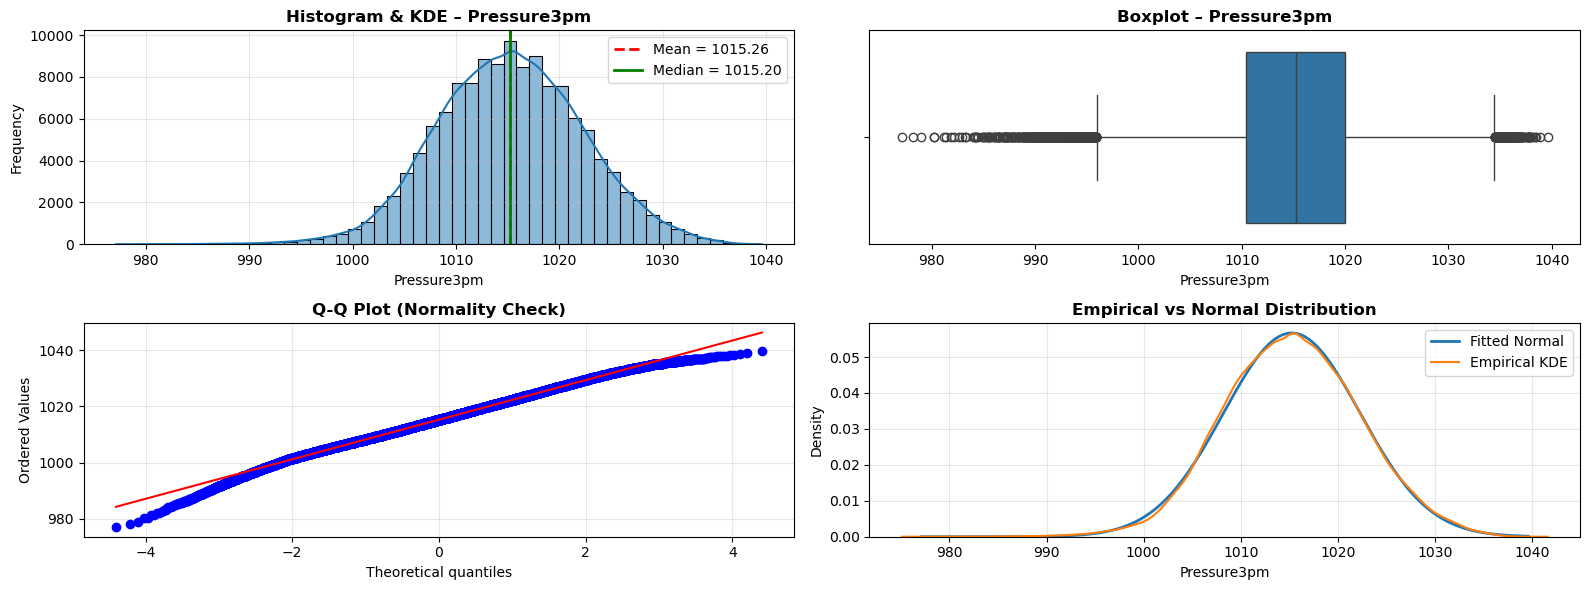

OUTLIER ANALYSIS (IQR METHOD)


,Lower_Bound,Q1,Median,Q3,Upper_Bound,Outlier_Count,Outlier_Rate_%,Observed_Min,Observed_Max
Value,996.0,1010.4,1015.2,1020.0,1034.4,919,0.7046,977.1,1039.6


Outliers detected: 919 observations (0.70% of non-missing values).
 • Smallest outlier value: 977.1000
 • Largest outlier value: 1039.6000
FEATURE GROUP ANALYSIS: CLOUD COVER

DETAILED NUMERICAL ANALYSIS: Cloud9am
DESCRIPTIVE STATISTICS


,Feature,Count,Mean,Median,Std,Min,Q1,Q3,Max,IQR,Skewness,Kurtosis,Missing_Rate_%
Value,Cloud9am,89572,4.4475,5.0,2.8872,0.0,1.0,7.0,9.0,6.0,-0.2291,-1.5388,38.4216


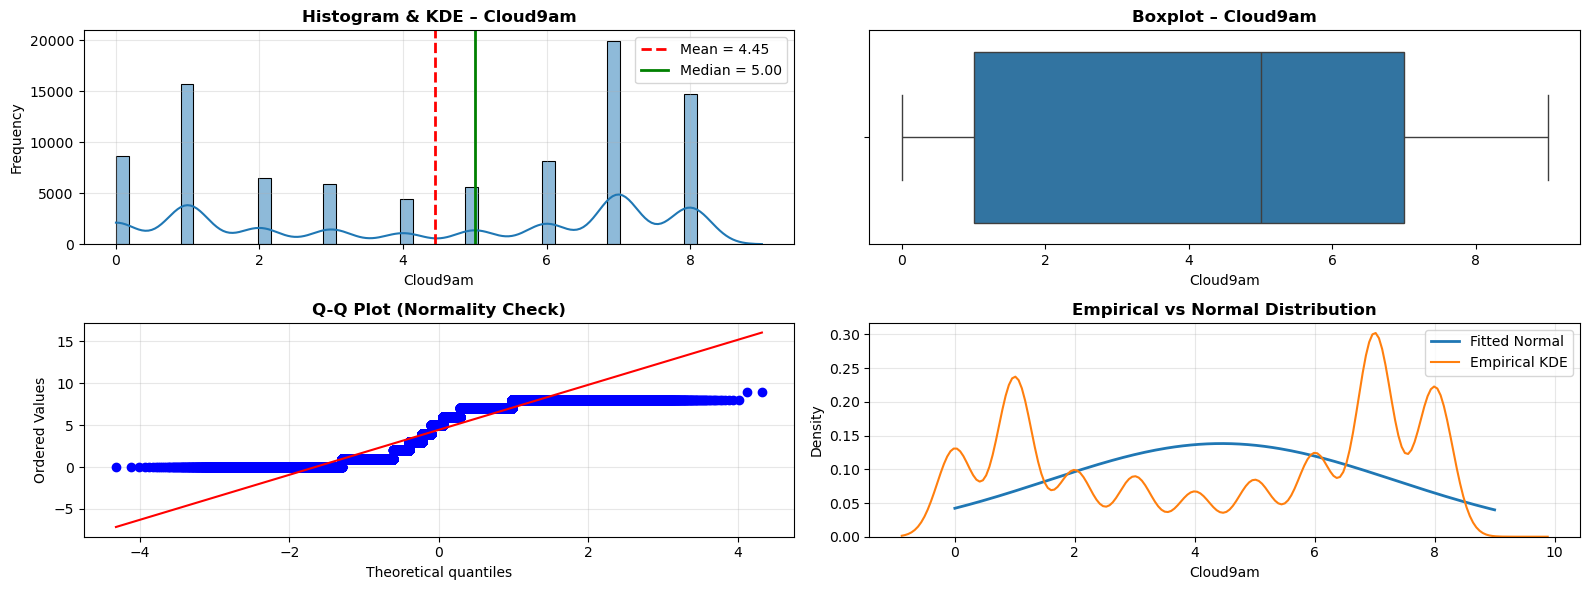

OUTLIER ANALYSIS (IQR METHOD)


,Lower_Bound,Q1,Median,Q3,Upper_Bound,Outlier_Count,Outlier_Rate_%,Observed_Min,Observed_Max
Value,-8.0,1.0,5.0,7.0,16.0,0,0.0,0.0,9.0


No significant outliers detected using the IQR criterion.

DETAILED NUMERICAL ANALYSIS: Cloud3pm
DESCRIPTIVE STATISTICS


,Feature,Count,Mean,Median,Std,Min,Q1,Q3,Max,IQR,Skewness,Kurtosis,Missing_Rate_%
Value,Cloud3pm,86102,4.5099,5.0,2.7204,0.0,2.0,7.0,9.0,5.0,-0.2264,-1.4565,40.8071


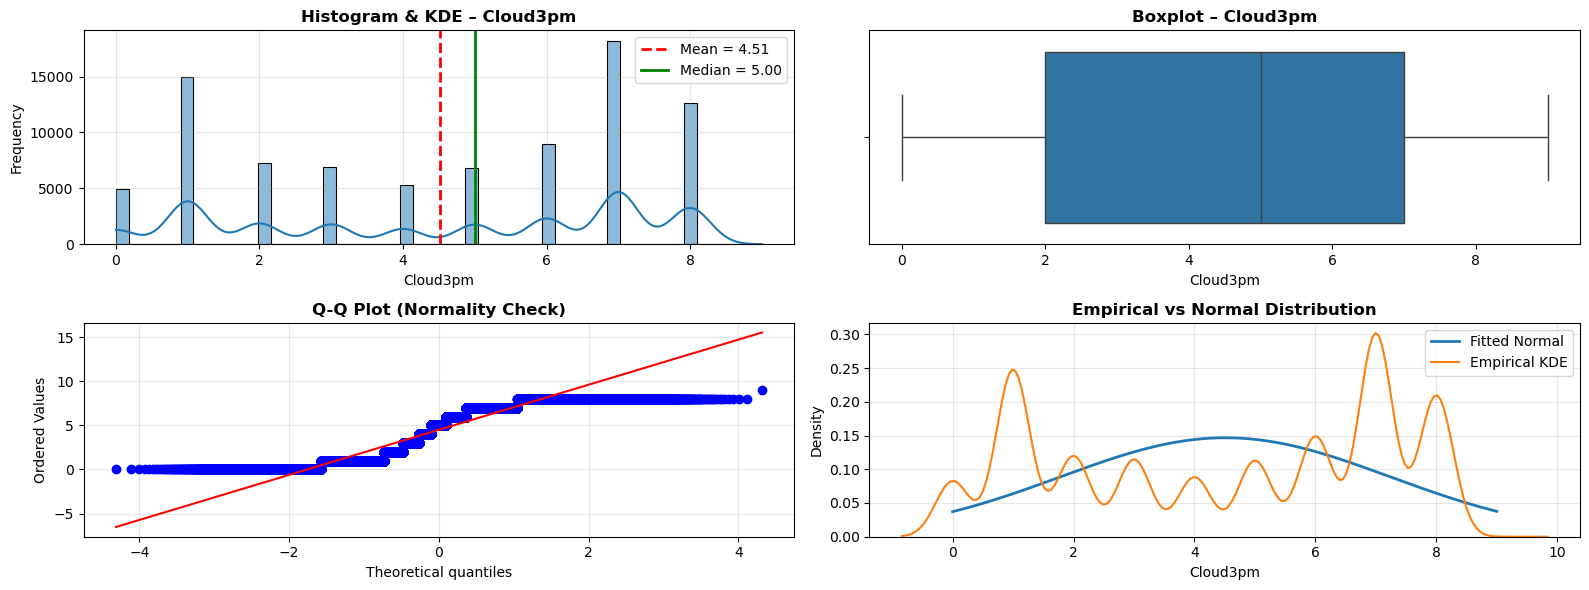

OUTLIER ANALYSIS (IQR METHOD)


,Lower_Bound,Q1,Median,Q3,Upper_Bound,Outlier_Count,Outlier_Rate_%,Observed_Min,Observed_Max
Value,-5.5,2.0,5.0,7.0,14.5,0,0.0,0.0,9.0


No significant outliers detected using the IQR criterion.


In [25]:
pressure_results = analyze_feature_group(df=df_weather, group_name="Pressure", features=variable_groups["Pressure"])
cloud_results = analyze_feature_group(df=df_weather, group_name="Cloud Cover", features=variable_groups["Cloud Cover"])
all_stats_summary.extend(pressure_results)
all_stats_summary.extend(cloud_results)

**(1) Áp suất Khí quyển**

`(Pressure9am, Pressure3pm)`

Trong toàn bộ tập biến số, áp suất khí quyển là nhóm biến thể hiện những đặc tính thống kê "lý tưởng" nhất.

* **Tính chuẩn (Normality):**
  Cả *Pressure9am* và *Pressure3pm* đều có phân phối xấp xỉ Gaussian, với hệ số lệch gần bằng 0 (*Skewness = −0.09* và *−0.04*) và hệ số nhọn thấp. Điều này cho thấy biến động áp suất tuân theo các dao động ngẫu nhiên ổn định quanh giá trị trung bình, không bị chi phối bởi các đuôi phân phối dài hay hiện tượng lệch cực đoan.

* **Mức nền khí quyển và thủy triều khí quyển:**
  Giá trị trung bình dao động quanh 1015 – 1017 hPa, phù hợp với áp suất mực nước biển tiêu chuẩn. Sự giảm nhẹ từ 1017.6 hPa (sáng) xuống 1015.3 hPa (chiều) phản ánh hiện tượng *thermal low* quy mô nhỏ – một dạng "thủy triều khí quyển" gây ra bởi sự nóng lên của bề mặt đất vào ban ngày, dẫn đến giãn nở không khí và suy giảm áp suất bề mặt.

* **Giá trị cực đoan và ý nghĩa vật lý:**
  Một tỷ lệ rất nhỏ các điểm ngoại lai (< 1%) với giá trị thấp nhất khoảng *977 hPa* và cao nhất *1041 hPa* hoàn toàn phù hợp về mặt khí tượng. Chúng tương ứng với sự đi qua của các hệ thống áp thấp sâu (bão nhiệt đới, xoáy thuận) hoặc các khối áp cao mạnh (anticyclones). Đây là những tín hiệu synoptic quan trọng, có mối liên hệ trực tiếp với mưa và gió mạnh.

**Hàm ý mô hình hóa:**
Tính chất Gaussian và mức nhiễu thấp khiến áp suất trở thành biến lý tưởng cho các mô hình thống kê tham số và các mô hình tuyến tính. Việc chuẩn hóa bằng *StandardScaler* là đủ, không cần áp dụng biến đổi phi tuyến.

**(2) Độ che phủ mây**

`(Cloud9am, Cloud3pm)`

Ngược lại hoàn toàn với áp suất, các biến *Cloud Cover* thể hiện cấu trúc phân phối phức tạp và kém "thân thiện" về mặt thống kê.

* **Thang đo rời rạc:**
  Dữ liệu mây được đo trên thang Okta (0 – 8), phản ánh mức độ che phủ từ trời quang đến âm u hoàn toàn. Bản chất rời rạc này khiến việc áp dụng các giả định liên tục (continuous distribution) trở nên không phù hợp.

* **Phân phối Platykurtic & Polarized:**
  Hệ số Kurtosis âm sâu (*−1.54* cho *Cloud9am*, *−1.46* cho *Cloud3pm*) cho thấy phân phối "bẹt" và dàn trải, không tập trung quanh một giá trị trung tâm. Trên thực tế, dữ liệu có xu hướng phân cực: nhiều quan sát tập trung ở hai thái cực – *trời quang (0–1 okta)* và *trời nhiều mây/âm u (7–8 okta)*. Điều này phản ánh bản chất thời tiết: bầu trời thường rõ ràng hoặc bị che phủ đáng kể, thay vì ở trạng thái trung gian ổn định.

* **Giá trị đặc biệt – mã 9:**
  Giá trị cực đại quan sát được là 9, tương ứng với mã *"Sky obscured"* trong bảng mã WMO (Code Table 2700), biểu thị bầu trời bị che khuất hoàn toàn bởi sương mù, mưa lớn hoặc hiện tượng khác. Đây không phải là lỗi dữ liệu mà là một trạng thái khí quyển đặc biệt, cần được xử lý tách biệt khi mã hóa.

* **Vấn đề dữ liệu thiếu:**
  Với tỷ lệ missing xấp xỉ 40%, Cloud Cover là nhóm biến có độ hoàn chỉnh thấp nhất. Khi kết hợp với thang đo rời rạc, việc điền khuyết bằng *giá trị trung bình* là không có ý nghĩa vật lý (ví dụ, giá trị trung bình ~4.5 okta không đại diện cho trạng thái bầu trời cụ thể).

**Chiến lược tiền xử lý đề xuất:**
Các phương pháp như Mode Imputation, KNN Imputation hoặc thậm chí coarsening (gom nhóm mây thấp/trung bình/cao) sẽ phù hợp hơn, giúp bảo toàn ý nghĩa khí tượng và giảm nhiễu do quan trắc.

**Kết luận**

Nhóm *Atmospheric State & Sky Conditions* minh họa rõ ràng hai cực đối lập trong dữ liệu khí tượng:

* **Áp suất** là biến liên tục, ổn định, tuân theo phân phối chuẩn và mang tín hiệu synoptic mạnh mẽ.
* **Độ che phủ mây** là biến rời rạc, phân tán, thiếu dữ liệu nhiều và chịu ảnh hưởng của thang đo quan trắc.

Sự khác biệt này nhấn mạnh rằng không tồn tại một chiến lược tiền xử lý "one-size-fits-all" cho toàn bộ các biến số. Trong các bước tiếp theo (Feature Engineering & Transformation), áp suất có thể được xử lý bằng các kỹ thuật chuẩn hóa tiêu chuẩn, trong khi dữ liệu mây cần các chiến lược mã hóa và điền khuyết mang tính ngữ nghĩa và vật lý nhiều hơn để tránh làm mất thông tin khí tượng quan trọng.

#### **6.1.7 Comprehensive Numerical Summary**

Sau khi tiến hành phân tích đơn biến chi tiết cho từng nhóm đặc trưng số, bảng **Comprehensive Numerical Feature Summary** cung cấp một cái nhìn tổng quan và có hệ thống về toàn bộ cấu trúc thống kê của tập dữ liệu khí tượng. Việc đặt các chỉ số trung tâm (mean, median), độ phân tán (standard deviation), hình dạng phân phối (skewness), cùng các thước đo chất lượng dữ liệu (tỷ lệ missing và outliers) cạnh nhau cho phép so sánh trực tiếp giữa các nhóm biến vốn có bản chất vật lý và cơ chế sinh dữ liệu rất khác nhau.

In [26]:
summary_df = pd.DataFrame(all_stats_summary)
display_cols = [
    'Group', 'Feature', 
    'Mean', 'Median', 'Std', 
    'Skewness', 
    'Missing_Rate_%', 'Outliers_%', 
    'Min', 'Max'
]
final_summary = summary_df[display_cols]
styled_summary = (final_summary.style
    # Highlight distribution asymmetry
    .background_gradient(cmap='RdBu_r', subset=['Skewness'], vmin=-3, vmax=3)
    # Highlight outlier-heavy features
    .background_gradient(cmap='YlOrRd', subset=['Outliers_%'])
    # Highlight missing data severity
    .background_gradient(cmap='Blues', subset=['Missing_Rate_%'])
    .format({
        'Mean': '{:.2f}', 'Median': '{:.2f}', 'Std': '{:.2f}', 'Skewness': '{:.2f}',
        'Min': '{:.1f}', 'Max': '{:.1f}',
        'Missing_Rate_%': '{:.1f}%', 'Outliers_%': '{:.1f}%'
    })
    .set_caption("Comprehensive Summary of Numerical Features")
)
print("FINAL NUMERICAL FEATURE SUMMARY")
display(styled_summary)

FINAL NUMERICAL FEATURE SUMMARY


,Group,Feature,Mean,Median,Std,Skewness,Missing_Rate_%,Outliers_%,Min,Max
0,Temperature,MinTemp,12.19,12.00,6.40,0.02,1.0%,0.0%,-8.5,33.9
1,Temperature,MaxTemp,23.22,22.60,7.12,0.22,0.9%,0.3%,-4.8,48.1
2,Temperature,Temp9am,16.99,16.70,6.49,0.09,1.2%,0.2%,-7.2,40.2
3,Temperature,Temp3pm,21.68,21.10,6.94,0.24,2.5%,0.5%,-5.4,46.7
4,Rainfall & Evaporation,Rainfall,2.36,0.00,8.48,9.84,2.2%,18.0%,0.0,371.0
5,Rainfall & Evaporation,Evaporation,5.47,4.80,4.19,3.76,43.2%,2.4%,0.0,145.0
6,Rainfall & Evaporation,Sunshine,7.61,8.40,3.79,-0.50,48.0%,0.0%,0.0,14.5
7,Wind Speed,WindGustSpeed,40.04,39.00,13.61,0.87,7.1%,2.3%,6.0,135.0
8,Wind Speed,WindSpeed9am,14.04,13.00,8.92,0.78,1.2%,1.3%,0.0,130.0
9,Wind Speed,WindSpeed3pm,18.66,19.00,8.81,0.63,2.1%,1.8%,0.0,87.0


**Thống kê toàn cục**

Phân tích tổng hợp cho thấy các biến số trong bộ dữ liệu không tạo thành một tập đồng nhất về mặt phân phối hay chất lượng, mà phân hóa rõ rệt thành nhiều *lớp thống kê*:

* Một nhóm biến có *phân phối ổn định, gần Gaussian*, với mức nhiễu thấp và tỷ lệ thiếu không đáng kể.
* Một nhóm biến có *phân phối lệch phải mạnh*, chứa nhiều giá trị cực đoan nhưng mang ý nghĩa vật lý thực tế.
* Một nhóm biến có *rủi ro chất lượng cao*, đặc trưng bởi tỷ lệ missing lớn và phân phối rời rạc hoặc đa đỉnh.

Sự phân hóa này phản ánh trực tiếp sự khác biệt về cơ chế đo đạc và điều kiện vật lý chi phối từng đại lượng khí tượng.

**Phân loại biến theo chiến lược tiền xử lý**

Dựa trên bảng tổng hợp, các biến số được phân loại thành ba nhóm chức năng chính nhằm phục vụ cho thiết kế pipeline tiền xử lý ở các bước tiếp theo.

**Nhóm 1 – Ổn định & Gần Gaussian**

**Biến:** `MinTemp, MaxTemp, Temp9am, Temp3pm, Pressure9am, Pressure3pm`

**Đặc điểm thống kê:**

* Phân phối xấp xỉ chuẩn với $|\text{Skewness}| < 0.5$.
* Độ biến thiên vừa phải, ít giá trị ngoại lai.
* Tỷ lệ missing thấp, gần như không ảnh hưởng đến cấu trúc phân phối.

**Hàm ý xử lý:**
Các biến này đáp ứng tốt các giả định của mô hình thống kê tham số và là “xương sống” của tập đặc trưng.

* **Imputation:** Mean imputation hoặc nội suy tuyến tính theo thời gian là phù hợp.
* **Scaling:** *StandardScaler (Z-score normalization)* là lựa chọn tối ưu.

Nhóm này có thể được xem là baseline features, đóng vai trò ổn định mô hình và giảm phương sai ước lượng.


**Nhóm 2 – Lệch & Biến động mạnh**

**Biến:** `Rainfall, WindGustSpeed, WindSpeed9am, WindSpeed3pm`

**Đặc điểm thống kê:**

* Phân phối lệch phải rõ rệt $(\text{Skewness} > 0.5)$.
* Chứa nhiều giá trị cực đoan (outliers), tuy nhiên đây là natural outliers gắn liền với các sự kiện thời tiết khắc nghiệt.
* Riêng *Rainfall* có đặc tính *zero-inflated* rõ ràng (Median = 0, Mean lớn hơn nhiều).

**Hàm ý xử lý:**
Việc áp dụng các kỹ thuật làm "phẳng" dữ liệu là cần thiết, nhưng phải đảm bảo không triệt tiêu tín hiệu vật lý quan trọng.

* **Transformation:** Log-transform $\log(1+x)$ hoặc Box–Cox để giảm độ lệch.
* **Scaling:** *RobustScaler* (dựa trên median và IQR) hoặc *MinMaxScaler* sau biến đổi log.
* **Outliers:** Không loại bỏ cơ học; cần được giữ lại để mô hình học được các điều kiện cực đoan.

**Nhóm 3 – Rủi ro Chất lượng cao**

**Biến:** `Evaporation, Sunshine, Cloud9am, Cloud3pm`

**Đặc điểm thống kê:**

* Tỷ lệ missing rất cao (30% – 48%).
* Phân phối phức tạp: lệch mạnh, đa đỉnh hoặc rời rạc theo thang đo quan trắc.
* Nhạy cảm với phương pháp điền khuyết.

**Hàm ý xử lý:**
Đây là nhóm biến đòi hỏi chiến lược xử lý thận trọng nhất.

* **Imputation:**

  * Tuyệt đối tránh *Mean Imputation*.
  * Ưu tiên Iterative Imputer (MICE) dựa trên các biến tương quan mạnh (nhiệt độ, áp suất, lượng mưa).
  * Kết hợp missing indicator flags để mô hình nhận biết trạng thái "không quan trắc được".
* **Feature Selection:**

  * Cần được đánh giá lại thông qua *feature importance* hoặc *ablation study* ở giai đoạn modeling.
  * Có thể bị loại bỏ nếu đóng góp thấp hoặc gây nhiễu.

### **6.2 Categorical Features**

Mục tiêu của phần này là đánh giá một cách có hệ thống cấu trúc thông tin và rủi ro mô hình hóa của các biến phân loại trong tập dữ liệu khí tượng. Khác với các biến số liên tục, biến phân loại tác động đến hiệu năng mô hình không chỉ thông qua nội dung thông tin mà còn thông qua *chiến lược mã hóa (encoding strategy)*, vốn có thể làm thay đổi đáng kể không gian đặc trưng.

Do đó, phân tích này tập trung vào ba đặc tính kỹ thuật cốt lõi có ảnh hưởng trực tiếp đến mô hình học máy:

* **Cardinality (Độ đa dạng):** số lượng giá trị duy nhất, quyết định mức độ bùng nổ chiều khi mã hóa.
* **Entropy (Độ hỗn loạn thông tin):** đo lường lượng thông tin thực sự mà biến đóng góp.
* **Imbalance (Mất cân bằng):** mức độ chi phối của nhóm đa số, ảnh hưởng mạnh đến các bài toán phân loại.

#### **6.2.1  Identification of Categorical Variables**

Bước đầu tiên của phân tích là xác định toàn bộ các biến phân loại và xây dựng một bảng chuẩn đoán cho từng biến. Mục tiêu không chỉ là liệt kê các biến dạng *object/category*, mà còn đánh giá nhanh:

* Mức độ đầy đủ dữ liệu (missing rate),
* Độ đa dạng giá trị (cardinality),
* Cấu trúc phân phối (mode và entropy),
* Và các rủi ro tiềm ẩn đối với quá trình mã hóa.

Bảng tổng hợp này đóng vai trò như một *công cụ sàng lọc tiền mô hình (pre-modeling screening tool)*, giúp định hướng chiến lược xử lý phù hợp ngay từ đầu.

In [27]:
categorical_cols = df_weather.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"Total categorical features: {len(categorical_cols)}")
print(f"  {categorical_cols}\n")

cat_summary = pd.DataFrame(index=categorical_cols, columns=[
    'Cardinality', 'Missing_Rate_%', 'Mode', 'Mode_Frequency_%', 
    'Entropy', 'Cardinality_Level'
])

# Compute metrics for each categorical feature
for col in categorical_cols:
    series = df_weather[col]
    cardinality = series.nunique(dropna=True)
    missing_rate = series.isna().mean() * 100
    value_dist = series.value_counts(normalize=True, dropna=True)
    if not value_dist.empty:
        mode_value = value_dist.index[0]
        mode_freq = value_dist.iloc[0] * 100
        ent_value = entropy(value_dist)
    else:
        mode_value = "N/A"
        mode_freq = 0.0
        ent_value = 0.0
    if cardinality > 50:
        cardinality_level = 'High (>50)'
    elif cardinality > 10:
        cardinality_level = 'Medium (10–50)'
    else:
        cardinality_level = 'Low (<10)'
    cat_summary.loc[col] = [
        cardinality, missing_rate, mode_value,
        mode_freq, ent_value, cardinality_level
    ]

styled_cat_summary = (
    cat_summary.style
    # Highlight missingness severity
    .background_gradient(cmap='Reds', subset=['Missing_Rate_%'])
    # Highlight high-cardinality variables
    .background_gradient(cmap='Purples', subset=['Cardinality'])
    # Highlight information richness
    .background_gradient(cmap='Greens', subset=['Entropy'])
    # Formatting
    .format({
        'Missing_Rate_%': '{:.2f}%',
        'Mode_Frequency_%': '{:.1f}%',
        'Entropy': '{:.2f}'
    })
    .set_properties(**{'text-align': 'center'})
    .set_caption("Categorical Feature Summary"))
display(styled_cat_summary)

Total categorical features: 6
  ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']



,Cardinality,Missing_Rate_%,Mode,Mode_Frequency_%,Entropy,Cardinality_Level
Location,49,0.00%,Canberra,2.4%,3.88,Medium (10–50)
WindGustDir,16,7.10%,W,7.3%,2.77,Medium (10–50)
WindDir9am,16,7.26%,N,8.7%,2.76,Medium (10–50)
WindDir3pm,16,2.91%,SE,7.7%,2.77,Medium (10–50)
RainToday,2,2.24%,No,77.6%,0.53,Low (<10)
RainTomorrow,2,2.25%,No,77.6%,0.53,Low (<10)


Phân tích cho thấy tập dữ liệu chứa *6 biến phân loại*, bao gồm các biến định danh không gian, biến hướng gió và biến nhị phân liên quan đến mưa:

* *Location*
* *WindGustDir, WindDir9am, WindDir3pm*
* *RainToday, RainTomorrow*

Các chỉ số cardinality, entropy và missing rate cho thấy các biến này *không đồng nhất về bản chất thống kê*, mà phân hóa rõ rệt thành ba nhóm chiến lược.

In [28]:
categorical_features = [
    'Location',
    'WindGustDir',
    'WindDir9am',
    'WindDir3pm',
    'RainToday',
    'RainTomorrow'
]

#### **6.2.2  Spatio-Nominal Feature: Location**
*High-Cardinality Nominal Variable*

Biến `Location` đóng vai trò là một đặc trưng định danh không gian (*spatial identifier*), đại diện cho **49 trạm quan trắc khí tượng** được phân bố trên toàn bộ lục địa Úc. Mặc dù không mang ý nghĩa thứ tự hay định lượng, biến này gián tiếp mã hóa các đặc điểm khí hậu vĩ mô (vùng ven biển, nội địa khô hạn, khu vực nhiệt đới, v.v.), do đó có tiềm năng dự báo đáng kể đối với bài toán mưa.


Analyzing categorical feature: Location


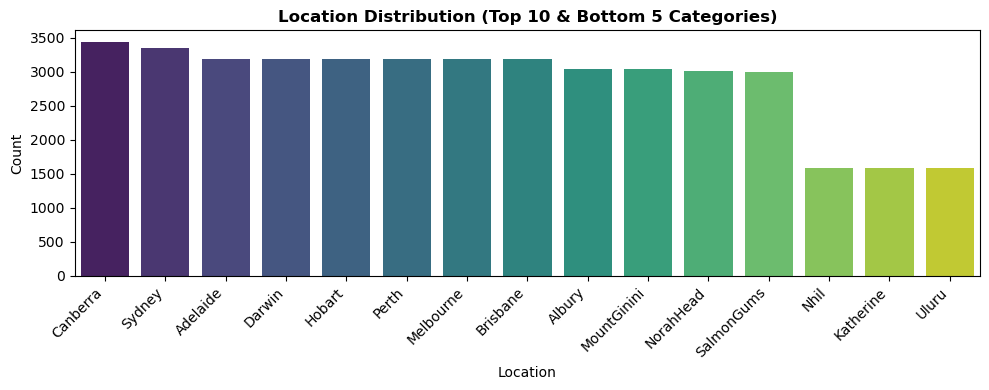

In [29]:
analyze_categorical_features(
    df=df_weather,
    categorical_columns=['Location']
)

**(1) Đặc điểm Phân phối**

Trước khi xem xét chiến lược mã hóa, cần đánh giá mức độ đại diện và độ tin cậy thống kê của biến.

* **Tính toàn vẹn dữ liệu:**
  `Location` là biến có chất lượng cao nhất trong nhóm categorical, với tỷ lệ thiếu dữ liệu bằng 0.00%, loại bỏ hoàn toàn rủi ro sai lệch do thiếu dữ liệu.

* **Độ cân bằng phân phối:**
  Chỉ số *Entropy cao (H ≈ 3.88)* cho thấy phân phối mẫu giữa các trạm là tương đối đồng đều.
  Trạm có tần suất cao nhất (*Canberra*) chỉ chiếm khoảng 2.4% tổng số quan sát, trong khi các trạm có tần suất thấp nhất (*Uluru, Nhil, Katherine*) vẫn sở hữu số lượng mẫu > 1,500, vượt xa ngưỡng của các *rare categories*.

* **Hàm ý thống kê:**
  Cấu trúc phân phối này cho thấy chiến lược thu thập dữ liệu của Bureau of Meteorology (BOM) mang tính đại diện không gian cao, tránh được thiên lệch tập trung vào các đô thị lớn. Đây là điều kiện thuận lợi để mô hình học được các quy luật khí hậu mang tính vùng miền và tổng quát hóa tốt trên toàn quốc.

**(2) Phân tích Rủi ro Đa dạng**

Với *49 giá trị duy nhất*, `Location` được xếp vào nhóm medium-to-high cardinality nominal features.

* **Rủi ro chính:**
  Việc áp dụng *One-Hot Encoding* sẽ mở rộng không gian đặc trưng thêm 49 chiều thưa. Điều này dẫn đến:

  * Gia tăng chi phí tính toán và bộ nhớ,
  * Hiện tượng *feature space fragmentation*,
  * Và đặc biệt là *sự pha loãng độ quan trọng của biến* trong các mô hình dựa trên cây, nơi mỗi split chỉ sử dụng một chiều đại diện cho một trạm cụ thể.

* **Tác động mô hình:**
  Thay vì học được các khuynh hướng khí hậu có tính hệ thống, mô hình có nguy cơ học các quy luật cục bộ gắn chặt với từng trạm, làm giảm khả năng khái quát hóa.

**(3) Chiến lược Tiền xử lý**

Dựa trên các phân tích trên, chiến lược xử lý `Location` cần thỏa mãn hai mục tiêu:
(1) Nén chiều không gian đặc trưng, và
(2) Bảo toàn thông tin dự báo liên quan đến khí hậu vùng.

Các phương pháp được đề xuất theo thứ tự ưu tiên như sau:

1. **Target Encoding (Mean Encoding)**

   * Thay thế mỗi trạm bằng *xác suất trung bình của biến mục tiêu `RainTomorrow`* tại trạm đó.
   * Phương pháp này nén toàn bộ thông tin không gian vào *một chiều duy nhất*, đồng thời giữ lại mối liên hệ trực tiếp giữa vị trí và khả năng mưa.
   * Cần triển khai *cross-validated target encoding* để tránh target leakage.

2. **Binary Encoding**

   * Mã hóa `Location` thành $\lceil \log_2(49) \rceil = 6$ chiều nhị phân.
   * Là một giải pháp cân bằng giữa việc giảm chiều và không sử dụng trực tiếp thông tin mục tiêu.

3. **Frequency Encoding**

   * Thay thế mỗi trạm bằng tần suất xuất hiện của nó.
   * Tuy nhiên, do entropy cao và phân phối khá đều, phương pháp này có *khả năng phân biệt thấp* và chỉ nên xem là phương án phụ.

4. **Domain-Based Grouping (Climate-Aware Aggregation)**

   * Gom các trạm thành các vùng khí hậu lớn (ví dụ: *Coastal, Inland, Tropical, Arid*).
   * Cách tiếp cận này làm giảm cardinality xuống <10 và cho phép áp dụng One-Hot Encoding một cách an toàn hơn, đồng thời tăng khả năng diễn giải.

**Kết luận**

`Location` là một biến có chất lượng dữ liệu cao và giá trị dự báo tiềm năng lớn, nhưng cũng đi kèm rủi ro mô hình hóa đáng kể do cardinality cao. Việc xử lý biến này đòi hỏi các kỹ thuật mã hóa nâng cao nhằm tránh bùng nổ chiều và bảo toàn cấu trúc thông tin khí hậu vùng.

#### **6.2.3  Cyclical Features: Wind Directions**
*Medium Cardinality Directional Features*

Nhóm biến hướng gió (`WindGustDir`, `WindDir9am`, `WindDir3pm`) đại diện cho trạng thái động lực học của khí quyển và đóng vai trò quan trọng trong việc mô tả quá trình vận chuyển ẩm và hình thành mưa. Mặc dù được lưu trữ dưới dạng biến phân loại (categorical), các biến này sở hữu *bản chất hình học chu kỳ (cyclical geometry)*, đòi hỏi cách tiếp cận xử lý chuyên biệt thay vì các kỹ thuật mã hóa định danh truyền thống.


Analyzing categorical feature: WindGustDir


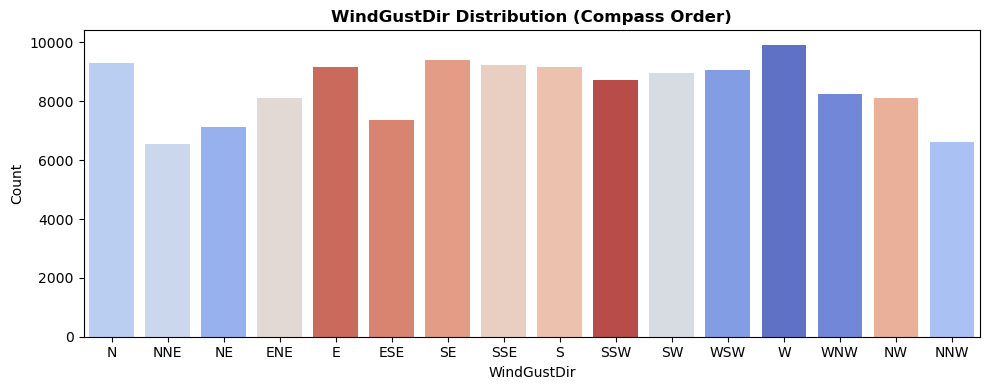


Analyzing categorical feature: WindDir9am


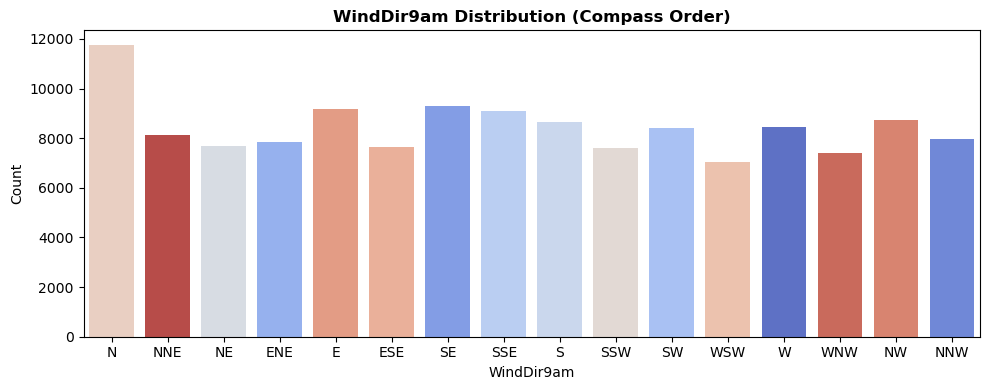


Analyzing categorical feature: WindDir3pm


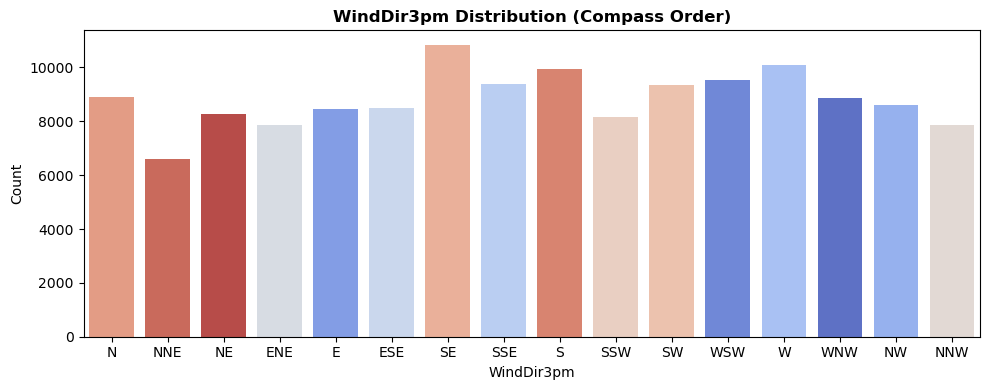

In [30]:
analyze_categorical_features(
    df=df_weather,
    categorical_columns=[
        'WindGustDir',
        'WindDir9am',
        'WindDir3pm'
    ]
)

**(1) Đặc điểm Phân phối**

Phân tích phân phối theo *thứ tự la bàn* cho phép quan sát rõ ràng sự biến thiên nhật triều của chế độ gió:

* **Buổi sáng (WindDir9am):**
  Phân phối cho thấy sự chiếm ưu thế tương đối của các hướng Bắc (N, NNE). Hiện tượng này phù hợp với điều kiện khí quyển ổn định vào đầu ngày, khi lớp biên khí quyển còn nông, và các cơ chế như gió đất (land breeze) hoặc hoàn lưu quy mô địa phương chi phối hướng gió bề mặt.

* **Buổi chiều (WindDir3pm):**
  Phân phối trở nên đồng đều hơn (higher entropy) và có xu hướng dịch chuyển về các hướng Nam và Tây (S, SE, W, WSW). Sự thay đổi này phản ánh quá trình đối lưu nhiệt tăng cường trong ngày, làm sâu lớp biên khí quyển và cho phép động lượng từ các luồng gió quy mô lớn (đặc biệt là Westerlies) truyền xuống bề mặt. Ở các khu vực ven biển, hiện tượng gió biển (sea breeze) cũng góp phần vào sự dịch chuyển này.

* **Độ cân bằng tổng thể:**
  Không có hướng gió nào chiếm ưu thế tuyệt đối (*dominant category < 20%*), cho thấy dữ liệu có độ phủ tốt trên toàn bộ không gian 360°, tránh được rủi ro thiên lệch hướng.

**(2) Bản chất hình học và những thách thức**

Mặc dù được biểu diễn dưới dạng nhãn rời rạc, hướng gió thực chất là *biến liên tục trên không gian hình tròn (unit circle)*. Điều này tạo ra các thách thức tô-pô đáng kể nếu xử lý không đúng cách:

* **Vấn đề liên tục (Discontinuity Problem):**
  Trên la bàn, hướng Bắc (0°) và Tây Bắc (315°) là hai hướng lân cận về mặt vật lý. Tuy nhiên, với *Label Encoding* (ví dụ: N=0, …, NW=15), khoảng cách số học giữa chúng trở thành cực đại, gây sai lệch nghiêm trọng cho các mô hình dựa trên khoảng cách (KNN, SVM) hoặc tối ưu gradient.

* **Vấn đề mất cấu trúc lân cận (Loss of Neighborhood Structure):**
  One-Hot Encoding tạo ra 16 chiều trực giao, trong đó mọi hướng đều "xa" nhau như nhau. Cách biểu diễn này phá vỡ hoàn toàn khái niệm *directional proximity* (ví dụ: NE gần NNE hơn là SW), làm suy giảm khả năng học các quy luật vật lý liên tục của mô hình.

**(3) Chiến lược Tiền xử lý**

Để bảo toàn cấu trúc hình học nội tại của hướng gió và khắc phục các vấn đề tô-pô đã nêu ở Mục (2), nhóm đề xuất áp dụng *phép phân rã vector thông qua biến đổi lượng giác (sin–cos encoding)* — một kỹ thuật chuẩn cho dữ liệu chu kỳ.

Cụ thể, tập dữ liệu sử dụng *16 hướng gió rời rạc theo la bàn*. Mỗi hướng được ánh xạ trước tiên thành một chỉ số thứ tự
$k \in {0,1,\dots,15}$ theo chiều kim đồng hồ, tương ứng với một góc trên đường tròn đơn vị:

$$[
\theta_k = \frac{2\pi \cdot k}{16}
]$$

Sau đó, mỗi quan sát hướng gió được biểu diễn trong không gian hai chiều thông qua phép biến đổi:

$$[
\begin{aligned}
\text{Wind}*{\sin} &= \sin\left(\frac{2\pi \cdot k}{16}\right), \
\text{Wind}*{\cos} = \cos\left(\frac{2\pi \cdot k}{16}\right).
\end{aligned}
]$$

**Giải thích hình học**

Phép biến đổi này ánh xạ mỗi hướng gió thành một điểm trên đường tròn đơn vị, trong đó:

* Hai hướng lân cận trên la bàn có khoảng cách Euclid nhỏ trong không gian $\text{Wind}*{\sin}, \text{Wind}*{\cos})$,
* Hai hướng đối diện (ví dụ: Bắc–Nam) được đặt ở hai phía đối xứng qua gốc tọa độ,
* Quan hệ chu kỳ được bảo toàn tự nhiên:
  $$[
  0^\circ \equiv 360^\circ
  ]$$

Do đó, cấu trúc liên tục của không gian hướng gió được giữ nguyên, thay vì bị phá vỡ như trong Label Encoding hoặc One-Hot Encoding.

**Ưu điểm phương pháp**

Phép phân rã vector lượng giác mang lại nhiều lợi ích quan trọng:

* **Bảo toàn tính chu kỳ và quan hệ lân cận hình học**, cho phép mô hình học các quy luật vật lý liên tục của khí quyển.
* **Giảm số chiều** từ 16 (One-Hot Encoding) xuống 2, hạn chế hiện tượng curse of dimensionality và giảm chi phí tính toán.
* **Tương thích phổ quát** với:

  * Mô hình tuyến tính (Logistic Regression, GLM),
  * Mô hình dựa trên khoảng cách (KNN, SVM),
  * Mô hình phi tuyến (Tree-based, Neural Networks).
* Tạo ra *ranh giới quyết định mượt*, đặc biệt quan trọng trong các bài toán dự báo hiện tượng khí tượng liên tục.

Việc mã hóa hướng gió bằng sin–cos không chỉ là một thủ thuật kỹ thuật, mà là một bước *feature engineering có cơ sở hình học và vật lý rõ ràng*. Cách biểu diễn này đảm bảo rằng thông tin phương hướng được truyền đạt một cách nhất quán và không méo mó tới mô hình học máy, từ đó cải thiện độ ổn định và khả năng tổng quát hóa của hệ thống dự báo.

**Kết luận**

Các biến hướng gió là ví dụ điển hình cho những đặc trưng có bản chất vật lý liên tục nhưng được lưu trữ dưới dạng phân loại. Việc xử lý chúng như biến nominal thông thường sẽ gây mất mát thông tin nghiêm trọng. Ngược lại, mã hóa chu kỳ bằng sin–cos cho phép mô hình khai thác trọn vẹn cấu trúc động lực học khí quyển, qua đó nâng cao khả năng dự báo mưa.

#### **6.2.4 Binary Features: RainToday & RainTomorrow**
*Low Cardinality Binary Features*

Hai biến nhị phân trọng yếu `RainToday` và `RainTomorrow` đóng vai trò trung tâm trong bài toán dự báo mưa, đồng thời thể hiện một cấu trúc phân phối bất đối xứng điển hình. Đặc điểm này không chỉ ảnh hưởng đến cách mã hóa dữ liệu mà còn tác động trực tiếp đến chiến lược huấn luyện và đánh giá mô hình.


Analyzing categorical feature: RainToday


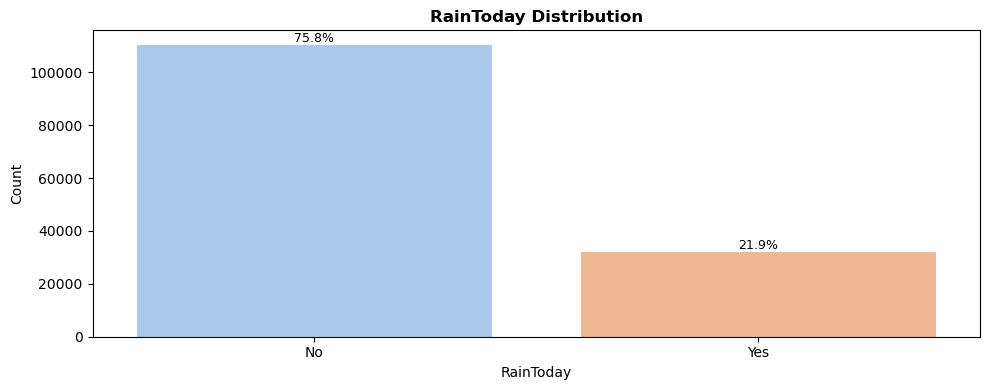


Analyzing categorical feature: RainTomorrow


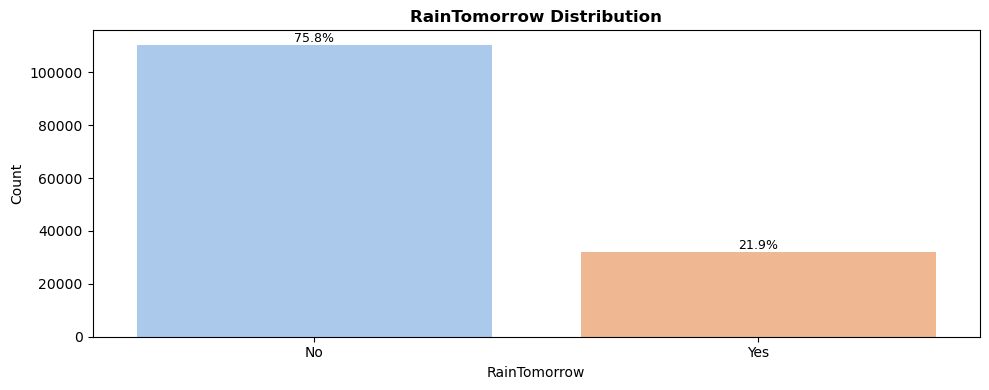

In [31]:
analyze_categorical_features(
    df=df_weather,
    categorical_columns=[
        'RainToday',
        'RainTomorrow'
    ]
)

**(1) Đánh giá Mất cân bằng Lớp**

Phân tích phân phối tần suất cho thấy cả hai biến đều tồn tại hiện tượng mất cân bằng lớp rõ rệt:

Nhóm *không mưa* ("No") chiếm khoảng 77.6% tổng số quan sát (xấp xỉ 110,000 mẫu), trong khi nhóm *có mưa* ("Yes") chỉ chiếm 22.4% (khoảng 30,000 mẫu). Tỷ lệ mất cân bằng tương ứng vào khoảng 3.5:1.

Mặc dù mức độ này chưa đạt ngưỡng cực đoan như trong các bài toán phát hiện gian lận hay sự kiện hiếm, nó đủ lớn để gây ra *thiên kiến mô hình (model bias)* nếu áp dụng các thuật toán học máy tiêu chuẩn mà không có điều chỉnh phù hợp. Cụ thể, mô hình có xu hướng ưu tiên dự đoán lớp đa số nhằm tối đa hóa độ chính xác tổng thể, dẫn đến hiệu năng kém trên lớp thiểu số — vốn là lớp có ý nghĩa thực tiễn cao hơn trong bối cảnh dự báo thời tiết.

**(2) Đặc điểm Phân phối**

Một đặc điểm đáng chú ý là sự *tương đồng gần như tuyệt đối* trong phân phối của `RainToday` và `RainTomorrow`, với cùng tỷ lệ khoảng 77.6% cho lớp "No". Hiện tượng này phản ánh mức độ *ổn định khí hậu (climatic stability)* trong giai đoạn và khu vực nghiên cứu, đồng thời gợi ý rằng xác suất mưa nền tại Úc vào khoảng *22%*.

Từ góc độ mô hình hóa, điều này có hai hàm ý quan trọng:
(i) xác suất mưa ngày hôm nay là một chỉ báo mạnh cho xác suất mưa ngày hôm sau, và
(ii) mô hình cần học được các sai lệch tinh tế thay vì chỉ dựa vào xác suất nền để đạt hiệu năng dự báo có ý nghĩa.

**(3) Chiến lược Mô hình hóa**

Sự mất cân bằng lớp được xác định ở trên dẫn đến một số định hướng phương pháp luận mang tính bắt buộc:

**Thứ nhất, về thước đo đánh giá**, độ chính xác (Accuracy) không còn là chỉ số đáng tin cậy. Một mô hình đơn giản luôn dự đoán "không mưa" vẫn có thể đạt Accuracy xấp xỉ 77.6% nhưng hoàn toàn không có giá trị ứng dụng. Do đó, các chỉ số tập trung vào lớp thiểu số cần được ưu tiên, bao gồm *Precision*, *Recall*, *F1-score*, và đặc biệt là *ROC-AUC* hoặc *Precision–Recall AUC*, trong đó PR-AUC thường phản ánh tốt hơn hiệu năng mô hình trong bối cảnh dữ liệu mất cân bằng.

**Thứ hai, về chiến lược huấn luyện**, cần áp dụng các kỹ thuật giảm thiểu thiên kiến lớp, chẳng hạn như: *Class Weighting*: gán trọng số lớn hơn cho lớp "Yes" trong hàm mất mát nhằm tăng chi phí sai phân loại trên lớp thiểu số.

**Cuối cùng, về mã hóa đặc trưng**, do bản chất nhị phân và không tồn tại cấu trúc thứ tự hay hình học nội tại, việc áp dụng Label Encoding với ánh xạ ${\text{No} \rightarrow 0, \text{Yes} \rightarrow 1}$ là lựa chọn tối ưu, đơn giản và phù hợp với hầu hết các thuật toán học máy.

**Kết luận**

Nhìn chung, `RainToday` và `RainTomorrow` là các biến có độ phức tạp biểu diễn thấp nhưng hàm ý mô hình hóa cao. Việc nhận diện đúng mức độ mất cân bằng lớp và điều chỉnh tương ứng trong cả giai đoạn huấn luyện lẫn đánh giá là yếu tố then chốt để đảm bảo rằng mô hình dự báo mưa không chỉ đạt hiệu năng thống kê tốt mà còn có giá trị thực tiễn trong ứng dụng khí tượng.

#### **6.2.5 Synthesis & Preprocessing Strategy**

Kết thúc quá trình phân tích các biến phân loại, có thể khẳng định rằng chiến lược mã hóa đặc trưng không thể áp dụng theo một khuôn mẫu duy nhất. Thay vào đó, một pipeline tiền xử lý hiệu quả cần được thiết kế dựa trên sự kết hợp có chủ đích giữa đặc tính thống kê của dữ liệu (cardinality, phân phối, mức độ mất cân bằng) và *ý nghĩa vật lý–ngữ nghĩa* mà mỗi biến đại diện (không gian, chu kỳ, trạng thái nhị phân).

Phân tích ở các tiểu mục trước cho thấy việc lựa chọn phương pháp mã hóa không chỉ ảnh hưởng đến số chiều đặc trưng, mà còn quyết định khả năng của mô hình trong việc học các quy luật khí tượng liên tục và có ý nghĩa vật lý. Do đó, chiến lược Feature Engineering trong nghiên cứu này được xây dựng theo nguyên tắc *bảo toàn thông tin tối đa với chi phí biểu diễn tối thiểu*.

**Kế hoạch Hành động**

| Feature Group       | Đặc điểm Dữ liệu                       | Phương pháp Mã hóa Đề xuất                            | Biện giải Kỹ thuật                                                                                                                                                                                                                                           |
| ------------------- | -------------------------------------- | ----------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| **Location**        | Nominal, High Cardinality<br>(49 trạm) | **Target Encoding**<br>(hoặc *Binary Encoding*)       | One-Hot Encoding sẽ tạo ra 49 chiều thưa, làm loãng không gian đặc trưng và gia tăng nguy cơ quá khớp. Target Encoding nén thông tin không gian vào một chiều duy nhất thông qua xác suất mưa có điều kiện theo trạm, đặc biệt hiệu quả đối với các mô hình cây (Tree-based models). |
| **Wind Directions** | Cyclical<br>(16 hướng)                 | **Trigonometric Encoding**<br>(Sine/Cosine Transform) | Bảo toàn cấu trúc tô pô của không gian hướng gió, duy trì tính liên tục chu kỳ (360° ≡ 0°) và giảm số chiều từ 16 xuống 2. Cách biểu diễn này phù hợp với cả mô hình tuyến tính và phi tuyến.                                                                                        |
| **RainToday**       | Binary<br>(Imbalanced)                 | **Label Encoding**<br>{0, 1}                          | Biến nhị phân không mang cấu trúc thứ tự phức tạp, do đó Label Encoding là đủ và tối ưu. Cách mã hóa này tránh tạo chiều dư thừa không cần thiết.                                                                                                                                    |
| **RainTomorrow**    | Binary Target<br>(Imbalanced ≈ 1:4)    | **Label Encoding**<br>{0, 1}                          | Chuẩn hóa biến mục tiêu để phục vụ huấn luyện mô hình. Sự mất cân bằng lớp yêu cầu áp dụng Stratified Sampling và các metric nhạy với lớp thiểu số (F1, ROC-AUC, PR-AUC).                                                                                                            |

**Kết luận Định hướng**

Từ phân tích tổng hợp, ba nguyên tắc chiến lược chính được rút ra:

**(i) Kiểm soát số chiều (Dimensionality Containment).**
Việc hạn chế sự bùng nổ số chiều từ các biến có cardinality cao, đặc biệt là `Location`, là điều kiện tiên quyết để đảm bảo hiệu năng tính toán và tính ổn định của mô hình trong giai đoạn huấn luyện.

**(ii) Bảo toàn ngữ nghĩa vật lý.**
Các biến mang bản chất không gian và chu kỳ, như hướng gió, cần được biểu diễn theo cách phản ánh đúng cấu trúc hình học nội tại. Việc ánh xạ sang không gian vector sin–cos cho phép mô hình học được các quy luật khí tượng liên tục mà các kỹ thuật mã hóa định danh truyền thống không thể nắm bắt.

**(iii) Nhận thức và kiểm soát thiên kiến.**
Sự mất cân bằng lớp của biến mục tiêu không chỉ là vấn đề thống kê mà còn là rủi ro phương pháp luận. Do đó, các kỹ thuật xử lý imbalance cần được tích hợp xuyên suốt pipeline, từ chia tập dữ liệu, lựa chọn metric, cho đến thiết kế hàm mất mát.

---

## **7. Bivariate & Multivariate Analysis (Correlation)**

### **7.1. Preliminary Patterns: Correlation Matrix**

Trước tiên, nhóm tiến hành tính toán ma trận tương quan cho các biến số để xem xét mức độ liên kết tuyến tính giữa chúng.

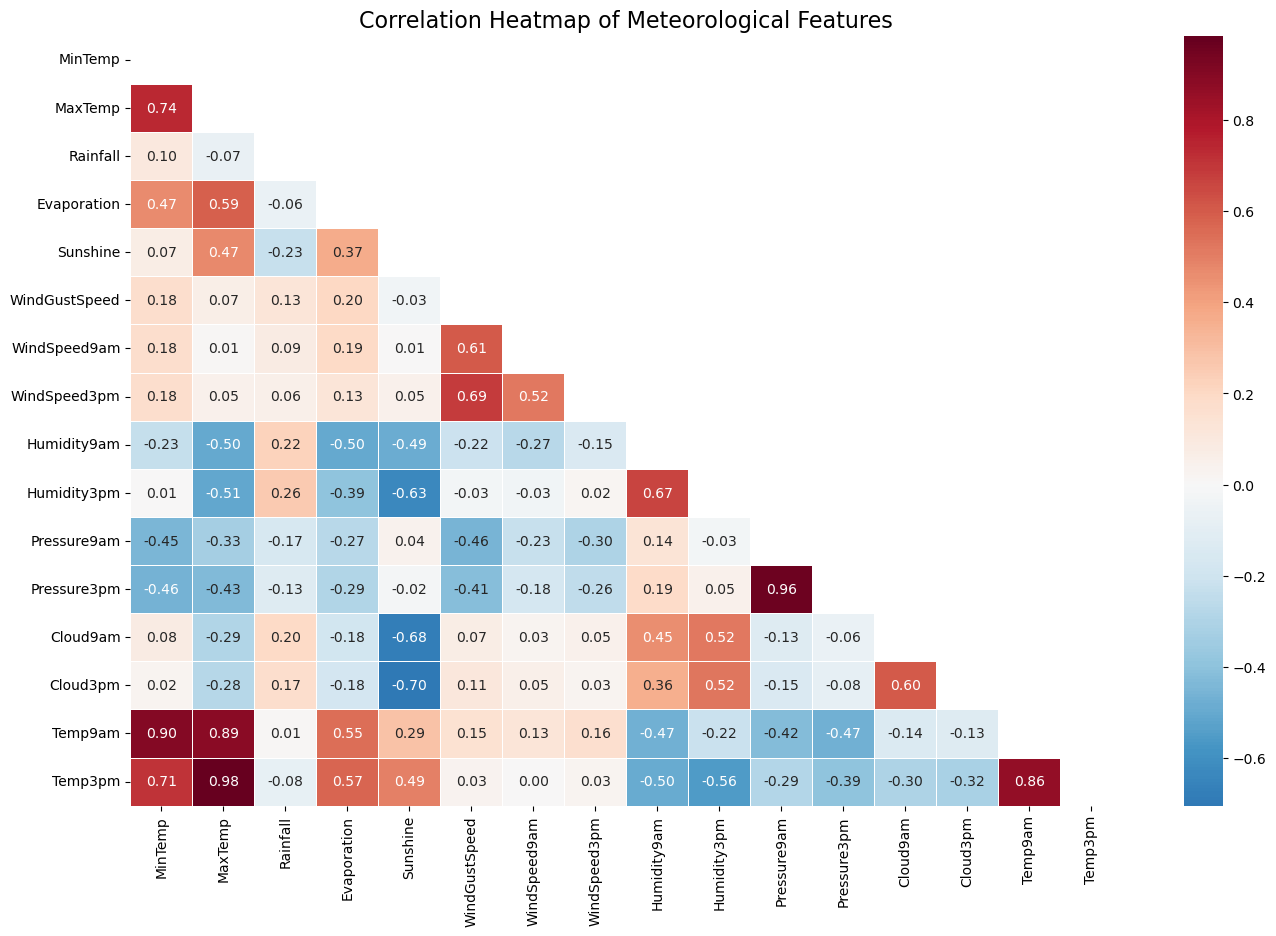

In [32]:
correlation_matrix_heatmap(df_weather)

Ma trận tương quan Pearson này giúp chúng ta định lượng mối quan hệ tuyến tính giữa các biến số. Từ Heatmap, nhóm chia các biến thành các "cụm thông tin" (information clusters) có tác động qua lại mạnh mẽ.

#### **7.1.1. Cụm Đa cộng tuyến cực mạnh (High Multicollinearity)**
Đây là các nhóm biến chứa thông tin gần như trùng lặp, cần lưu ý khi xây dựng các mô hình nhạy cảm với đa cộng tuyến như Logistic Regression.
* Nhóm Nhiệt độ (`MinTemp`, `MaxTemp`, `Temp9am`, `Temp3pm`):
  * Các biến này có hệ số tương quan thuận từ 0.70 đến 0.98.
  * Đáng chú ý nằm ở 2 biến `MaxTemp` và `Temp3pm` có tương quan gần như tuyệt đối ($\approx 0.98$). Điều này hợp lý vì nhiệt độ cao nhất trong ngày thường rơi vào khoảng xế chiều.
  * Nhóm hướng đến việc xử lí bằng cách trong các bước Feature Selection, chỉ cần giữ lại `MaxTemp` hoặc tính toán biến `TempRange = MaxTemp - MinTemp` để nắm bắt sự biến động nhiệt độ thay vì dùng cả 4 biến.
* Nhóm Áp suất (`Pressure9am`, `Pressure3pm`):
  * Có hệ số tương quan thuận cực mạnh (0.96). Điều này cho thấy áp suất khí quyển thường thay đổi rất chậm trong ngày.
  * Hướng xử lí: Có thể sử dụng giá trị trung bình hoặc chỉ giữ lại một biến vì chúng cung cấp thông tin dự báo tương đương nhau.

#### **7.1.2. Mối quan hệ nghịch biến giữa Sunshine, Cloud và Humidity**
Đây là nhóm biến chứa thông tin quan trọng để dự báo khả năng có mưa.
* **Sunshine với Cloud3pm/Cloud9am**:
  * Hệ số tương quan nghịch mạnh (khoảng -0.67 đến -0.71).
  * Lý do là vì lượng mây che phủ càng lớn thì số giờ nắng càng thấp. Mối quan hệ này rất chặt chẽ và nhất quán, cho thấy độ tin cậy của dữ liệu thu thập.
* **Sunshine với Humidity3pm**:
  * Hệ số tương quan nghịch khoảng -0.62.
  * Nhận xét: Khi độ ẩm buổi chiều cao, thường đi kèm với việc hình thành mây, dẫn đến giảm số giờ nắng. Đây là dấu hiệu tiền đề của các cơn mưa vào ngày hôm sau.

#### **7.1.3. Sự khác biệt giữa các mốc thời gian (9am và 3pm)**
* **Humidity**: `Humidity3pm` thường có tương quan với khả năng mưa cao hơn so với `Humidity9am`.
* **Wind Speed**: `WindGustSpeed` (tốc độ gió giật cao nhất) có tương quan thuận với cả `WindSpeed9am` và `WindSpeed3pm`, nhưng thường mạnh hơn ở mốc 3pm. Điều này gợi ý rằng các biến số đo lường vào buổi chiều mang nhiều tín hiệu dự báo cho ngày mai hơn là các biến buổi sáng.

#### **7.1.4. Những mối tương quan yếu gây bất ngờ**
* **Rainfall với các biến khác**: Lượng mưa của ngày hôm nay (`Rainfall`) có tương quan khá thấp ($< 0.3$) với các biến số khác như Áp suất hay Nhiệt độ. Điều này có thể lí giải bởi trường hợp mưa là một hiện tượng phi tuyến tính phức tạp. Việc hôm nay mưa bao nhiêu không phụ thuộc tuyến tính đơn giản vào việc hôm nay nóng bao nhiêu. Điều này cho thấy việc sử dụng các mô hình học máy phi tuyến (như Random Forest hoặc XGBoost) sẽ hiệu quả hơn các mô hình tuyến tính đơn giản.
* **WindGustSpeed với Pressure**: Có hệ số tương quan nghịch nhẹ, cho thấy rằng khi áp suất giảm đột ngột (rãnh thấp), tốc độ gió thường có xu hướng tăng lên.

### **7.2. Numerical × Categorical Analysis**

Trong phần này, nhóm sẽ tập trung so sánh các biến số giữa hai nhóm: Ngày mai có mưa (`RainTomorrow = Yes`) và Ngày mai không mưa (`RainTomorrow = No`). Mục tiêu là tìm ra những biến số có sự phân hóa mạnh nhất, vì đó chính là những tín hiệu quan trọng nhất để mô hình học máy đưa ra dự báo chính xác.

#### **7.2.1. Thống kê mô tả**
Đầu tiên là tập trung vào các biến có khả năng dự báo cao nhất đã được xác định sơ bộ qua ma trận tương quan.

In [33]:
core_features = ['Humidity3pm', 'Sunshine', 'Cloud3pm', 'Pressure3pm', 'WindGustSpeed', 'MaxTemp']

grouped_summary = df_weather.groupby('RainTomorrow')[core_features].agg(['mean', 'median', 'std']).round(2)

print("Detailed statistical comparison table:")
display(grouped_summary)

Detailed statistical comparison table:


Humidity3pm               Sunshine              Cloud3pm         \
                    mean median    std     mean median   std     mean median   
RainTomorrow                                                                   
No                 46.51   47.0  18.49     8.55    9.4  3.38     3.92    4.0   
Yes                68.80   70.0  19.04     4.47    4.3  3.36     6.36    7.0   

                   Pressure3pm               WindGustSpeed                \
               std        mean  median   std          mean median    std   
RainTomorrow                                                               
No            2.67     1016.11  1016.0  6.71         38.29   37.0  12.41   
Yes           1.95     1012.30  1012.2  7.33         45.95   44.0  15.72   

             MaxTemp               
                mean median   std  
RainTomorrow                       
No             23.84   23.3  7.06  
Yes            21.12   20.2  6.91

#### **7.2.2. Phân tích chi tiết các đặc trưng quan trọng**
Dựa trên bảng thống kê, nhóm nhận thấy sự khác biệt rõ rệt ở các chỉ số sau:
* **A. Độ ẩm lúc 3h chiều (`Humidity3pm`) - Chỉ số dự báo mạnh nhất**
  * **Kết quả**: Những ngày mà hôm sau có mưa thường có độ ẩm trung bình vào buổi chiều khoảng **68% - 70%**, trong khi những ngày không mưa chỉ khoảng **47% - 49%**.
  * **Ý nghĩa**: Khoảng cách giữa hai nhóm lên tới hơn 20%. Điều này cho thấy `Humidity3pm` là biến phân loại quan trọng nhất. Nếu độ ẩm 3pm vượt quá một ngưỡng nhất định, xác suất mưa ngày mai sẽ tăng vọt.
  * Trực quan: Boxplot sẽ cho thấy dải IQR (Interquartile Range) của hai nhóm gần như tách biệt nhau, rất ít phần chồng lấn.
* **B. Số giờ nắng (`Sunshine`) & Lượng mây buổi chiều (`Cloud3pm`)**
  * **Sunshine**: Ngày không mưa có số giờ nắng trung bình rất cao (~9.5 giờ), trong khi ngày sắp có mưa chỉ có khoảng 5.5 - 6 giờ nắng.
  * **Cloud3pm**: Ngược lại, lượng mây che phủ (đo bằng oktas - 1/8 bầu trời) ở nhóm sắp mưa cao hơn hẳn (thường $> 6$ oktas).
  * **Nhận xét**: Đây là cặp biến bù trừ. Sự sụt giảm giờ nắng đột ngột kèm theo mây tăng nhanh vào buổi chiều là tín hiệu tích tụ hơi nước và thay đổi áp suất để hình thành mưa.
* C. **Áp suất khí quyển (`Pressure3pm`)**
  * **Kết quả**: Áp suất trung bình của nhóm có mưa thường thấp hơn nhóm không mưa khoảng 3 - 5 hPa.
  * **Ý nghĩa**: Trong khí tượng, vùng áp suất thấp luôn gắn liền với sự hội tụ không khí và bốc hơi mạnh, tạo điều kiện cho mây và mưa phát triển. Dù sự chênh lệch về con số tuyệt đối có vẻ nhỏ, nhưng về mặt khí quyển, đây là sự khác biệt cực kỳ có ý nghĩa.

#### **7.2.3. Trực quan hóa sự phân hóa**
Nhóm sử dụng biểu đồ **Boxplot kết hợp Violin Plot** để quan sát đồng thời cả các giá trị ngoại lệ (outliers) và mật độ phân phối.

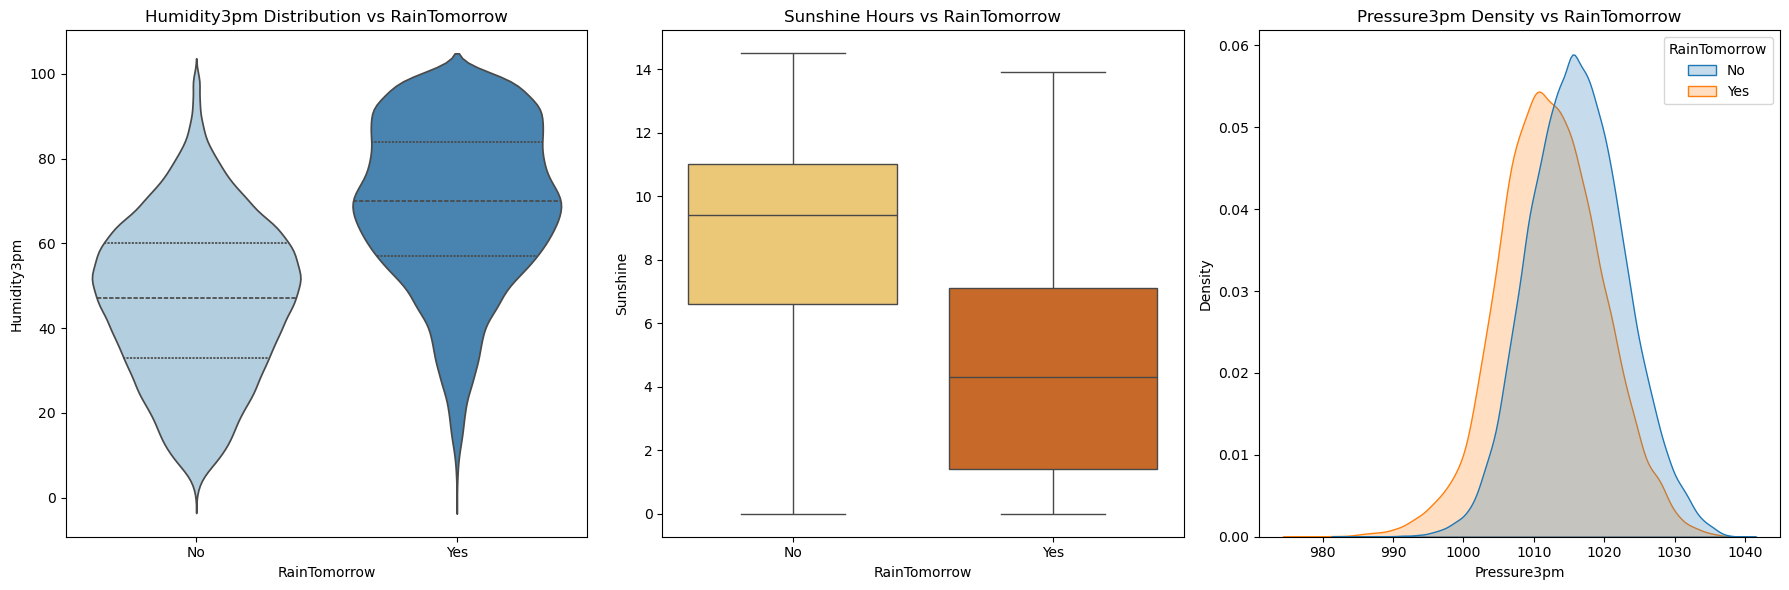

In [34]:
numerical_categorical_cross_tabulation(df_weather)

#### **7.2.4. Kết luận rút ra cho việc lựa chọn mô hình**
* **Tính tách biệt (Separability)**: `Humidity3pm` và `Sunshine` thể hiện tính tách biệt cao nhất giữa hai lớp (Yes/No). Các mô hình dựa trên cây (Decision Tree, Random Forest) sẽ dễ dàng khai thác các biến này để tạo ra các điểm cắt (splits) hiệu quả.
* **Xử lý Outliers**: Ở biến `WindGustSpeed`, nhóm Yes thường xuất hiện nhiều giá trị ngoại lệ cực cao hơn. Điều này phản ánh các cơn giông bão mạnh. Vì vậy nhóm nhận định không nên loại bỏ hoàn toàn các outliers này vì chúng mang thông tin quan trọng về các sự kiện thời tiết cực đoan.
* **Tương tác biến**: Sự kết hợp giữa **Áp suất giảm, Độ ẩm tăng và Số giờ nắng giảm** là điều kiện hoàn hảo để dự báo khả năng có mưa. 

### **7.3. Categorical × Categorical Analysis**
Trong phần này, nhóm sẽ thực hiện phân tích mối liên quan giữa các biến phân loại (categorical variables) với biến mục tiêu. Trọng tâm là kiểm tra xem các yếu tố như hướng gió hay tình trạng mưa của ngày hôm nay có làm thay đổi đáng kể xác suất mưa của ngày mai hay không.

#### **7.3.1. Mối liên hệ giữa RainToday và RainTomorrow**
Đây là cặp biến quan trọng nhất để hiểu về tính liên tục của thời tiết (Weather Persistence).

Conditional probability table:


RainTomorrow,No,Yes
RainToday,,
No,0.848132,0.151868
Yes,0.535940,0.464060


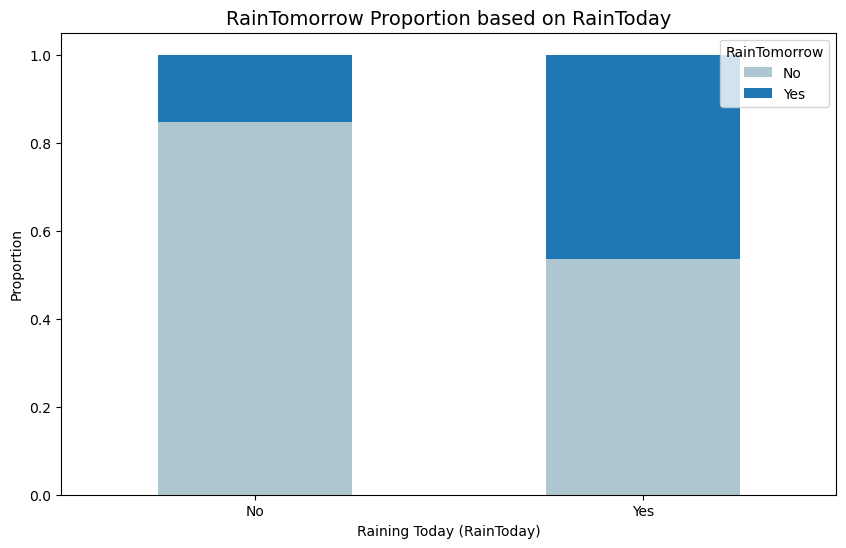

In [35]:
raintoday_and_raintomorrow_conditional_probability_and_stacked_bar_chart(df_weather)

* Theo Xác suất chuyển đổi (Transition probability):
    * Nếu hôm nay không mưa (RainToday = No), xác suất ngày mai có mưa chỉ rơi vào khoảng 15%.
    * Nếu hôm nay có mưa (RainToday = Yes), xác suất ngày mai tiếp tục có mưa tăng lên đến gần 46%.
* Kết quả này cho thấy có một sự chuyển dịch xác suất rất lớn (gấp khoảng 3 lần). Nói cách khác, việc biết thông tin hôm nay có mưa đã làm tăng khả năng dự báo ngày mai có mưa lên gấp 3 lần so với khi hôm nay không có mưa. Điều này khẳng định `RainToday` là một biến chỉ báo (strong predictor) cực kỳ mạnh mẽ. Ngoài ra, thời tiết cũng có tính chất kéo dài theo cụm (clusters).

#### **7.3.2. Ảnh hưởng của WindGustDir đến khả năng mưa**

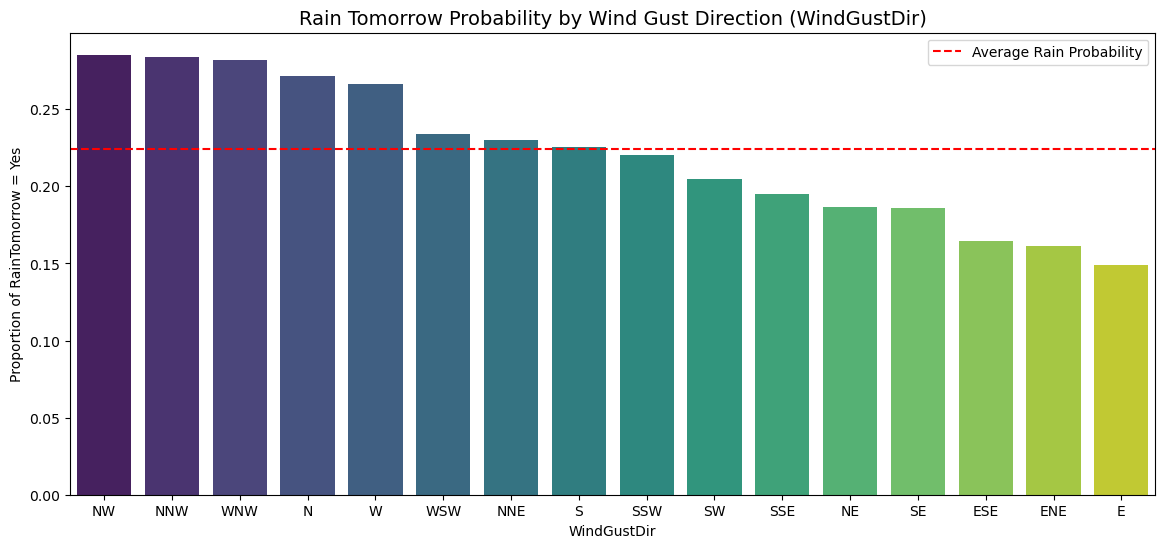

In [36]:
wind_gust_direction_analysis(df_weather)

Một số phân tích và nhận xét rút ra như sau:
* **Hướng gió mang mưa**: Các hướng gió như **W (Tây), WNW (Tây Tây Bắc), và SSW (Nam Tây Nam)** thường có tỷ lệ dẫn đến mưa cao hơn mức trung bình toàn quốc (đường đỏ). Điều này phản ánh đặc điểm địa lý của Úc, nơi gió từ phía Tây và Nam thường mang theo hơi ẩm từ đại dương.
* **Hướng gió khô**: Các hướng gió từ phía Đông (E, ENE, ESE) thường có tỷ lệ mưa thấp hơn, do không khí đã mất độ ẩm khi đi qua đất liền hoặc mang tính chất lục địa khô.

#### **7.3.3. Kiểm định Chi-square ($\chi^2$) về tính độc lập**
Bên cạnh đó, để xác định xem mối quan hệ giữa các biến phân loại có thực sự có ý nghĩa thống kê hay chỉ là do ngẫu nhiên, nhóm thực hiện kiểm định Chi-square.

In [39]:
def check_categorical_dependency(df, col1, col2):
    contingency_table = pd.crosstab(df[col1], df[col2])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    return p

In [40]:
categorical_cols = ['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm']

for col in categorical_cols:
    p_val = check_categorical_dependency(df_weather.dropna(subset=[col, 'RainTomorrow']), col, 'RainTomorrow')
    if p_val < 0.05:
        status = "Significant"  
    else:
        status = "Not Significant"
    print(f"Relationship between {col} and RainTomorrow: p-value = {p_val:.4e} ({status})")

Relationship between RainToday and RainTomorrow: p-value = 0.0000e+00 (Significant)
Relationship between WindGustDir and RainTomorrow: p-value = 0.0000e+00 (Significant)
Relationship between WindDir9am and RainTomorrow: p-value = 0.0000e+00 (Significant)
Relationship between WindDir3pm and RainTomorrow: p-value = 5.6457e-264 (Significant)


Từ các kết quả kiểm định, nhóm kết luận như sau:
* Hầu hết các biến phân loại trong tập dữ liệu này đều có p-value cực nhỏ ($< 0.05$), điều này chứng minh rằng chúng đều có mối liên hệ mật thiết với biến mục tiêu.
* Tuy nhiên, độ mạnh của mối liên hệ (Cramer's V) sẽ khác nhau: `RainToday` thường có lực dự báo mạnh hơn nhiều so với các biến về hướng gió buổi sáng (`WindDir9am`).

#### **7.3.4. Tổng kết cho giai đoạn tiền xử lí về sau**
* **RainToday**: Bắt buộc phải giữ lại và thực hiện Encoding (vì đây là biến nhị phân rất mạnh).
* **Wind Directions**: Do có nhiều nhãn (16 hướng), nên cân nhắc:
  * Sử dụng One-Hot Encoding nếu mô hình là Linear.
  * Sử dụng Target Encoding hoặc gom nhóm thành 4 hướng chính (Bắc, Nam, Đông, Tây) nếu muốn giảm chiều dữ liệu.
* **Missing Values**: Các biến hướng gió thường có dữ liệu trống. Dựa trên phân tích này, chúng ta không nên điền giá trị "Unknown" một cách tùy tiện mà nên cân nhắc dùng giá trị xuất hiện nhiều nhất (Mode) theo từng địa điểm (Location).

## **8. Initial Observations & Insights**
Sau khi kết thúc quá trình khám phá dữ liệu (EDA), nhóm đã thu thập được những hiểu biết quan trọng về cấu trúc dữ liệu và các yếu tố khí tượng ảnh hưởng đến khả năng có mưa tại Úc.
### **8.1. Summary**
#### **8.1.1. Key Observations**
* **Chỉ số dự báo vàng**: `Humidity3pm` (Độ ẩm buổi chiều) và `Sunshine` (Số giờ nắng) là hai biến có khả năng phân loại mạnh nhất. Độ ẩm cao (>60%) và số giờ nắng thấp (<5h) là dấu hiệu rõ rệt nhất cho việc ngày mai có mưa.
* **Persistence**: Biến `RainToday` đóng vai trò là một biến chỉ báo cực mạnh. Nếu hôm nay có mưa, xác suất ngày mai tiếp tục mưa tăng vọt gấp 3 lần (từ ~15% lên ~46%).
* **Hiện tượng đa cộng tuyến**: Các biến nhiệt độ (`MinTemp`, `MaxTemp`, `Temp9am`, `Temp3pm`) và áp suất (`Pressure9am`, `Pressure3pm`) có tương quan cực kỳ cao (r > 0.9). Điều này cho thấy sự dư thừa thông tin và cần được tinh lọc.
* **Tác động của hướng gió**: Các luồng gió từ phía Tây (W, WNW) và phía Nam thường mang theo hơi ẩm đại dương, dẫn đến tỷ lệ mưa ngày mai cao hơn hẳn so với gió từ phía Đông.
#### **8.1.2. Data Quality Issues**
* **Dữ liệu thiếu (Missing Values)**: Một số biến quan trọng như `Evaporation` (Lượng bốc hơi) và `Sunshine` (Số giờ nắng) có tỷ lệ thiếu rất cao (lên tới 40-45%).
* **Dữ liệu ngoại lệ (Outliers)**: Biến `Rainfall` và `WindGustSpeed` có phân phối lệch phải cực đại với nhiều giá trị ngoại lệ rất lớn, phản ánh các hiện tượng thời tiết cực đoan như bão.
* **Mất cân bằng lớp (Class Imbalance)**: Biến mục tiêu `RainTomorrow` bị mất cân bằng (tỷ lệ No:Yes khoảng 78:22), điều này có thể làm mô hình thiên kiến về lớp "No".
#### **8.1.3. Preprocessing Steps**
* **Imputation**: Sử dụng chiến lược điền khuyết dựa trên đặc thù (ví dụ: dùng Median cho các biến có outliers, dùng KNN Imputer cho các biến quan trọng như `Sunshine`).
* **Feature Selection**: Loại bỏ bớt các biến bị đa cộng tuyến (như giữ lại `MaxTemp` và `Pressure3pm`) để giảm độ phức tạp của mô hình.
* **Encoding**: Chuyển đổi các biến định danh như `Location`, `WindGustDir` sang dạng số (Target Encoding hoặc One-Hot Encoding).
* **Scaling**: Thực hiện RobustScaling hoặc Log-transform cho các biến có outliers mạnh như `Rainfall`.
#### **8.1.4. Interesting Patterns & Research Questions**
* Sự sụt giảm áp suất đồng thời với tăng độ ẩm vào buổi chiều dường như là sự kết hợp hoàn hảo để báo hiệu mưa. Điều này dẫn đến một số câu hỏi đáng để nghiên cứu, ví dụ như "Liệu chúng ta có thể xây dựng một mô hình dự báo chính xác mà không cần các biến có tỷ lệ thiếu cao như `Sunshine` và `Evaporation` không?" hay "Sự khác biệt về địa lý (`Location`) ảnh hưởng thế nào đến trọng số của các biến dự báo?"
### **8.2. Red Flags**
#### **8.2.1. Serious Data Quality Concerns**
* Một số trạm đo có tỷ lệ dữ liệu trống quá lớn ở gần như tất cả các cột. Điều này có thể gây ra sai lệch nếu chúng ta gộp chung tất cả các địa điểm để huấn luyện mô hình mà không xử lý theo từng cụm (clusters).
* Ngoài ra, cần cực kỳ cẩn thận với biến `Rainfall` (lượng mưa tích luỹ). Nếu dùng `Rainfall` để dự báo `RainTomorrow` mà không xử lý kỹ, mô hình có thể bị phụ thuộc quá mức vào các biến mang tính lịch sử này.
#### **8.2.2. Limitations** 
* Dữ liệu chỉ có quy mô theo ngày. Điều này khiến chúng ta bỏ lỡ các biến động khí tượng xảy ra theo giờ vốn có thể dự báo mưa chính xác hơn.
* Bộ dữ liệu thiếu các thông tin quan trọng khác như độ cao so với mực nước biển của trạm đo, khoảng cách tới bờ biển hoặc các hiện tượng khí hậu vĩ mô (El Niño/La Niña), vốn ảnh hưởng rất lớn đến mô hình mưa tại Úc.